In [5]:
import nltk
# from nltk.book import *
from nltk.stem.porter import *
from nltk.stem import * 
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.tokenize import RegexpTokenizer #regular expression tokenizer
from nltk import FreqDist

import re  # regular expression 

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt

import random
import string # to process standard python strings
import warnings
warnings.filterwarnings('ignore')


import pandas as pd

import scipy.sparse
from sklearn.feature_extraction.text import CountVectorizer #for Bag of Words
from sklearn.feature_extraction.text import TfidfVectorizer # for Term Frequency Inverse Document Frequency


import requests
from bs4 import BeautifulSoup
import urllib.request 

import seaborn as sns
import os
%matplotlib inline

In [6]:
pwd()

'/Users/paulina/Documents/1.LAU/CSC498_NLP/Python_Code'

In [7]:
# Loading Libraries 
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.corpus import treebank 

# initializing training and testing set     
train_data = treebank.tagged_sents()[:3000] 
test_data = treebank.tagged_sents()[3000:] 
  
# Tagging 
tag1 = UnigramTagger(train_data) 
  
# Evaluation 
tag1.evaluate(test_data) 

treebank.tagged_sents()[100]

[('Alan', 'NNP'),
 ('Spoon', 'NNP'),
 (',', ','),
 ('recently', 'RB'),
 ('named', 'VBN'),
 ('*', '-NONE-'),
 ('Newsweek', 'NNP'),
 ('president', 'NN'),
 (',', ','),
 ('said', 'VBD'),
 ('0', '-NONE-'),
 ('Newsweek', 'NNP'),
 ("'s", 'POS'),
 ('ad', 'NN'),
 ('rates', 'NNS'),
 ('would', 'MD'),
 ('increase', 'VB'),
 ('5', 'CD'),
 ('%', 'NN'),
 ('in', 'IN'),
 ('January', 'NNP'),
 ('.', '.')]

In [8]:
raw_html = urllib.request.urlopen('https://www.euronews.com/news/international')
raw_wiki = raw_html.read()

soup_wiki = BeautifulSoup(raw_wiki, 'html.parser')


wiki_text = soup_wiki.get_text()

print(wiki_text)

international news and breaking news | Euronews
English
                  English
                
                  Français
                
                  Deutsch
                
                  Italiano
                
                  Español
                
                  Português
                
                  Русский
                
                  Türkçe
                
                  Ελληνικά
                
                  Magyar
                
                    فارسی
                
                    العربية
                
                    Shqip
                Newsletters
              Europe
            
              World
            
              Business
            
              Sport
            
              Culture
            
              Europe
            
              World
            
              Business
            
              Sport
            
              Culture
            
              Living
      

In [9]:
my_url = 'https://www.euronews.com/lifestyle/travel'
data = requests.get(my_url)
soup = BeautifulSoup(data.content, 'html.parser')

article =  soup.find_all('p')

article_text = ''

for para in article:  
    article_text += para.text
    
    
print(article_text)
        

Change how you see the worldJenny Southan argues how community-based travel will be a cornerstone of tourism in 2021. Jenny Southan talks with three industry experts about how to take part in community immersion trips responsibly. Jagged volcanic peaks emerging from cool mist and tumbling down to bays that shimmer like liquid jade in the sun, the archipelago of the Azores is not the stuff of idle reverie but a fresh burst of paradise and symphony of nature.The protest comes as the French government proposes "random border checks" to be put in place over the holiday season targeting people trying to get to foreign resorts.In 2006, the Mann-Bahas uprooted their lives, moved to Morocco and invested in a run-down building which is now one of the leading hotels in Fez. We caught up with one of our resident Instagram features @arden_nl to find out what inspires him as a photographer.Lufthansa Cargo's Boeing 777F's will only use Sustainable Aviation Fuel on its flight to Shanghai.When Camille

In [10]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"), ("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print(result)


type(sentence)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


list

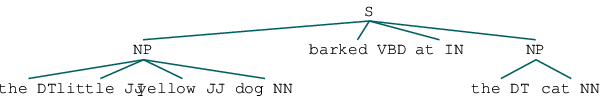

In [11]:
result

In [12]:
result.draw()

In [13]:
grammar = r"""
NP: {<DT|PP\$>?<JJ>*<NN>} # chunk determiner/possessive pronoun, adjectives and nouns - PP$ for possessive pronoun
{<NNP>+} # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"),
("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]
print(cp.parse(sentence))

parseTree = cp.parse(sentence)

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


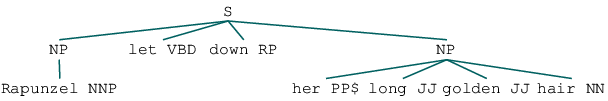

In [14]:
parseTree

In [15]:
nouns = [("money", "NN"), ("market", "NN"), ("fund", "NN")]
grammar = "NP: {<NN><NN>} # Chunk two consecutive nouns"
cp = nltk.RegexpParser(grammar)
print(cp.parse(nouns))
cs = cp.parse(nouns)
parseNnTree = cp.parse(nouns)

(S (NP money/NN market/NN) fund/NN)


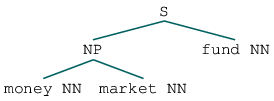

In [16]:
parseNnTree

In [17]:
def preprocess(document):
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
#     print(sentences)
    return(sentences)

In [18]:
#preporcess the text

prep = preprocess(article_text)

In [19]:
cp = nltk.RegexpParser('NP: {<DT>?<JJ>*<NN>}')

for s in prep:
    tree = cp.parse(s)
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            print(subtree)

(NP the/DT worldJenny/NN)
(NP community-based/JJ travel/NN)
(NP a/DT cornerstone/NN)
(NP tourism/NN)
(NP industry/NN)
(NP part/NN)
(NP community/NN)
(NP immersion/NN)
(NP cool/JJ mist/NN)
(NP shimmer/NN)
(NP liquid/NN)
(NP jade/NN)
(NP the/DT sun/NN)
(NP the/DT archipelago/NN)
(NP the/DT stuff/NN)
(NP idle/JJ reverie/NN)
(NP a/DT fresh/JJ burst/NN)
(NP paradise/NN)
(NP symphony/NN)
(NP nature.The/JJ protest/NN)
(NP the/DT French/JJ government/NN)
(NP random/JJ border/NN)
(NP place/NN)
(NP the/DT holiday/NN)
(NP season/NN)
(NP foreign/JJ resorts.In/NN)
(NP a/DT run-down/JJ building/NN)
(NP resident/NN)
(NP arden_nl/NN)
(NP a/DT photographer.Lufthansa/NN)
(NP flight/NN)
(NP unexpected/JJ encounter/NN)
(NP life/NN)
(NP forever/NN)
(NP reopening/NN)
(NP the/DT government/NN)
(NP present/JJ Roman/JJ culture/NN)
(NP part/NN)
(NP a/DT five-star/JJ luxury/NN)
(NP stay/NN)
(NP the/DT heart/NN)
(NP the/DT mystery/NN)
(NP metal/NN)
(NP structure/NN)
(NP remote/JJ part/NN)
(NP desert/NN)
(NP the/D

In [20]:
# working with NLTK corpora

cp = nltk.RegexpParser('NP: {<DT>?<JJ>*<NN>}')
brown = nltk.corpus.brown
for s in brown.tagged_sents():
    tree = cp.parse(s)
    for subtree in tree.subtrees():
        if subtree.label() == 'NP':
            print(subtree)
        

(NP investigation/NN)
(NP recent/JJ primary/NN)
(NP election/NN)
(NP evidence/NN)
(NP place/NN)
(NP jury/NN)
(NP term-end/NN)
(NP over-all/JJ charge/NN)
(NP election/NN)
(NP praise/NN)
(NP manner/NN)
(NP election/NN)
(NP term/NN)
(NP jury/NN)
(NP hard-fought/JJ primary/NN)
(NP relative/JJ handful/NN)
(NP jury/NN)
(NP widespread/JJ interest/NN)
(NP election/NN)
(NP number/NN)
(NP size/NN)
(NP this/DT city/NN)
(NP jury/NN)
(NP registration/NN)
(NP election/NN)
(NP end/NN)
(NP grand/JJ jury/NN)
(NP number/NN)
(NP interest/NN)
(NP jury/NN)
(NP efficiency/NN)
(NP cost/NN)
(NP administration/NN)
(NP jury/NN)
(NP result/NN)
(NP city/NN)
(NP city/NN)
(NP this/DT problem/NN)
(NP Implementation/NN)
(NP automobile/NN)
(NP title/NN)
(NP law/NN)
(NP outgoing/JJ jury/NN)
(NP effective/JJ date/NN)
(NP orderly/JJ implementation/NN)
(NP law/NN)
(NP grand/JJ jury/NN)
(NP swipe/NN)
(NP handling/NN)
(NP child/NN)
(NP welfare/NN)
(NP general/JJ assistance/NN)
(NP program/NN)
(NP jury/NN)
(NP welfare/NN)
(N

(NP close/NN)
(NP present/JJ school/NN)
(NP term/NN)
(NP degree/NN)
(NP degree/NN)
(NP A/NN)
(NP I/NN)
(NP degree/NN)
(NP addition/NN)
(NP college/NN)
(NP career/NN)
(NP captain/NN)
(NP basketball/NN)
(NP team/NN)
(NP football/NN)
(NP letterman/NN)
(NP teacher/NN)
(NP principal/NN)
(NP teacher/NN)
(NP athletic/JJ director/NN)
(NP instructor/NN)
(NP associate/JJ professor/NN)
(NP education/NN)
(NP border/NN)
(NP patrolman/NN)
(NP session/NN)
(NP recommendation/NN)
(NP State/NN)
(NP federal/JJ legislation/NN)
(NP racial/JJ discrimination/NN)
(NP employment/NN)
(NP report/NN)
(NP blue/JJ ribbon/NN)
(NP committee/NN)
(NP aid/NN)
(NP report/NN)
(NP year/NN)
(NP long/JJ study/NN)
(NP ADC/NN)
(NP program/NN)
(NP county/NN)
(NP welfare/NN)
(NP firm/NN)
(NP long/JJ range/NN)
(NP ADC/NN)
(NP case/NN)
(NP load/NN)
(NP report/NN)
(NP racial/JJ discrimination/NN)
(NP employment/NN)
(NP family/NN)
(NP breakdown/NN)
(NP desertion/NN)
(NP ADC/NN)
(NP dependency/NN)
(NP monthly/JJ cost/NN)
(NP ADC/NN)


(NP day/NN)
(NP chance/NN)
(NP resolution/NN)
(NP essential/JJ service/NN)
(NP community/NN)
(NP resolution/NN)
(NP source/NN)
(NP livelihood/NN)
(NP great/JJ revenue/NN)
(NP local/NN)
(NP government/NN)
(NP council/NN)
(NP governor/NN)
(NP factory/NN)
(NP department/NN)
(NP business/NN)
(NP volume/NN)
(NP basis/NN)
(NP essential/NN)
(NP community/NN)
(NP labor-management/NN)
(NP expert/NN)
(NP luncheon/NN)
(NP country/NN)
(NP welfare/NN)
(NP type/NN)
(NP government/NN)
(NP free/JJ enterprise/NN)
(NP system/NN)
(NP regrouping/NN)
(NP average/JJ voter/NN)
(NP pull/NN)
(NP right/JJ lever/NN)
(NP election/NN)
(NP day/NN)
(NP member/NN)
(NP young/JJ man/NN)
(NP machinist/NN)
(NP toolmaker/NN)
(NP trade/NN)
(NP law/NN)
(NP fellow/NN)
(NP office/NN)
(NP lawyer/NN)
(NP law/NN)
(NP track/NN)
(NP right/JJ track/NN)
(NP free/JJ enterprise/NN)
(NP track/NN)
(NP party/NN)
(NP government/NN)
(NP operation/NN)
(NP national/JJ victory/NN)
(NP original/JJ program/NN)
(NP vice/NN)
(NP president/NN)
(NP

(NP week/NN)
(NP assent/NN)
(NP ticket/NN)
(NP right/NN)
(NP successor/NN)
(NP candidate/NN)
(NP candidate/NN)
(NP speech/NN)
(NP report/NN)
(NP candidacy/NN)
(NP wave/NN)
(NP public/JJ resentment/NN)
(NP corruption/NN)
(NP government/NN)
(NP tangible/JJ feeling/NN)
(NP air/NN)
(NP revulsion/NN)
(NP politics/NN)
(NP taxi/NN)
(NP driver/NN)
(NP visitor/NN)
(NP airport/NN)
(NP state/NN)
(NP hand/NN)
(NP political/JJ scientist/NN)
(NP growth/NN)
(NP popular/JJ control/NN)
(NP political/JJ process/NN)
(NP secret/JJ conspiracy/NN)
(NP object/NN)
(NP Corruption/NN)
(NP recent/JJ development/NN)
(NP city/NN)
(NP state/NN)
(NP locale/NN)
(NP novel/NN)
(NP current/JJ spotlight/NN)
(NP subject/NN)
(NP succession/NN)
(NP public/NN)
(NP year/NN)
(NP Graft/NN)
(NP construction/NN)
(NP state/NN)
(NP election/NN)
(NP new/JJ attention/NN)
(NP ethical/JJ climate/NN)
(NP state/NN)
(NP reader/NN)
(NP impression/NN)
(NP petty/JJ chicanery/NN)
(NP norm/NN)
(NP public/JJ life/NN)
(NP Day/NN)
(NP day/NN)
(NP

(NP laboratory/NN)
(NP explosive/JJ device/NN)
(NP TNT/NN)
(NP nitroglycerine/NN)
(NP left/JJ front/NN)
(NP wheel/NN)
(NP bomb/NN)
(NP starter/NN)
(NP target/NN)
(NP telephone/NN)
(NP night/NN)
(NP fire/NN)
(NP department/NN)
(NP dissension/NN)
(NP fight/NN)
(NP fire/NN)
(NP association/NN)
(NP union/NN)
(NP outspoken/JJ critic/NN)
(NP present/JJ city/NN)
(NP administration/NN)
(NP battle/NN)
(NP city/NN)
(NP fire/NN)
(NP association/NN)
(NP reward/NN)
(NP information/NN)
(NP arrest/NN)
(NP person/NN)
(NP bombing/NN)
(NP association/NN)
(NP hour/NN)
(NP home/NN)
(NP secretary-treasurer/NN)
(NP local/NN)
(NP member/NN)
(NP executive/NN)
(NP committee/NN)
(NP association/NN)
(NP military/JJ pressure/NN)
(NP emergency/NN)
(NP national/JJ front/NN)
(NP government/NN)
(NP president/NN)
(NP agreement/NN)
(NP political/JJ bargaining/NN)
(NP threat/NN)
(NP army/NN)
(NP military/JJ junta/NN)
(NP overthrow/NN)
(NP army/NN)
(NP general/JJ staff/NN)
(NP deadline/NN)
(NP national/JJ coalition/NN)
(

(NP mood/NN)
(NP game/NN)
(NP time/NN)
(NP pretty/JJ wife/NN)
(NP addition/NN)
(NP family/NN)
(NP summer/NN)
(NP festive/JJ mood/NN)
(NP seven-hit/JJ pitching/NN)
(NP rookie/NN)
(NP nightfall/NN)
(NP company/NN)
(NP chairman/NN)
(NP board/NN)
(NP flight/NN)
(NP ramp/NN)
(NP minor/JJ damage/NN)
(NP wing/NN)
(NP plane/NN)
(NP A's/NN)
(NP expansion/NN)
(NP someplace/NN)
(NP straight/JJ victory/NN)
(NP 3-year-old/JJ filly/NN)
(NP race/NN)
(NP field/NN)
(NP top/NN)
(NP speed/NN)
(NP stretch/NN)
(NP length/NN)
(NP substantial/JJ lead/NN)
(NP wire/NN)
(NP place/NN)
(NP money/NN)
(NP head/NN)
(NP front/NN)
(NP bright/JJ sun/NN)
(NP brisk/JJ wind/NN)
(NP track/NN)
(NP fast/JJ condition/NN)
(NP time/NN)
(NP this/DT week/NN)
(NP well-prepared/JJ program/NN)
(NP race/NN)
(NP apprentice/NN)
(NP field/NN)
(NP result/NN)
(NP each/DT start/NN)
(NP speed/NN)
(NP reserve/NN)
(NP allowance/NN)
(NP department/NN)
(NP event/NN)
(NP meet/NN)
(NP record/NN)
(NP 600-yard/JJ run/NN)
(NP track/NN)
(NP meet/NN)


(NP figure/NN)
(NP golf/NN)
(NP record/NN)
(NP prize/NN)
(NP money/NN)
(NP night/NN)
(NP distinction/NN)
(NP duffer/NN)
(NP shot/NN)
(NP couple/NN)
(NP par-5/NN)
(NP hole/NN)
(NP human/NN)
(NP abandonment/NN)
(NP sport/NN)
(NP despair/NN)
(NP paragon/NN)
(NP perfection/NN)
(NP sacrilege/NN)
(NP hope/NN)
(NP spirit/NN)
(NP self-sacrifice/NN)
(NP yen/NN)
(NP form/NN)
(NP athletics/NN)
(NP golfer/NN)
(NP par/NN)
(NP hole/NN)
(NP round/NN)
(NP open/NN)
(NP intention/NN)
(NP final/JJ crusher/NN)
(NP 280-yard/NN)
(NP drive/NN)
(NP distance/NN)
(NP narrow/JJ fairway/NN)
(NP 508-yard/JJ hole/NN)
(NP shot/NN)
(NP ball/NN)
(NP majestic/JJ arc/NN)
(NP out-of-bounds/JJ slice/NN)
(NP opposite/JJ side/NN)
(NP dozen/NN)
(NP nice/JJ round/JJ figure/NN)
(NP clubhouse/NN)
(NP standpoint/NN)
(NP army/NN)
(NP heartening/JJ exhibition/NN)
(NP heyday/NN)
(NP open/NN)
(NP idol/NN)
(NP course/NN)
(NP secondary/JJ hero/NN)
(NP another/DT pro/NN)
(NP lunch/NN)
(NP way/NN)
(NP rock-strewn/JJ gully/NN)
(NP partne

(NP farewell/NN)
(NP supper/NN)
(NP hospital/NN)
(NP surgery/NN)
(NP grand/JJ march/NN)
(NP club/NN)
(NP party/NN)
(NP money/NN)
(NP center/NN)
(NP crabapple/NN)
(NP town/NN)
(NP rancho/NN)
(NP portable/JJ typewriter/NN)
(NP hand/NN)
(NP promotional/JJ copy/NN)
(NP writer/NN)
(NP whiz/NN)
(NP argument/NN)
(NP fallout/NN)
(NP drop/NN)
(NP beer/NN)
(NP stein/NN)
(NP different/JJ idea/NN)
(NP Comic/NN)
(NP time/NN)
(NP heart/NN)
(NP headline/NN)
(NP this/DT pair/NN)
(NP time/NN)
(NP another/DT scoop/NN)
(NP rare/JJ night/NN)
(NP club/NN)
(NP run/NN)
(NP week/NN)
(NP sellout/NN)
(NP severe/JJ pain/NN)
(NP injection/NN)
(NP nerve/NN)
(NP film/NN)
(NP studio/NN)
(NP exec/NN)
(NP honest/JJ man/NN)
(NP this/DT column/NN)
(NP staff/NN)
(NP Handsome/JJ bachelor/NN)
(NP favorite/JJ date/NN)
(NP glamor/NN)
(NP exec/NN)
(NP director/NN)
(NP fund/NN)
(NP raising/NN)
(NP group/NN)
(NP hospital/NN)
(NP such/JJ thing/NN)
(NP emergency/NN)
(NP telephone/NN)
(NP building/NN)
(NP fund/NN)
(NP drive/NN)
(N

(NP fire/NN)
(NP house/NN)
(NP road/NN)
(NP mile/NN)
(NP county/NN)
(NP school/NN)
(NP superintendent/NN)
(NP practice/NN)
(NP question/NN)
(NP proposal/NN)
(NP board/NN)
(NP member/NN)
(NP long-time/NN)
(NP critic/NN)
(NP superintendent/NN)
(NP meeting/NN)
(NP disagreement/NN)
(NP previous/JJ session/NN)
(NP meeting/NN)
(NP list/NN)
(NP memory/NN)
(NP conversation/NN)
(NP approval/NN)
(NP suggestion/NN)
(NP number/NN)
(NP board/NN)
(NP machine/NN)
(NP permanent/JJ record/NN)
(NP practice/NN)
(NP that/DT time/NN)
(NP board/NN)
(NP member/NN)
(NP superintendent/NN)
(NP number/NN)
(NP education/NN)
(NP machine/NN)
(NP front/NN)
(NP county/NN)
(NP public/NN)
(NP business/NN)
(NP order/NN)
(NP law/NN)
(NP school/NN)
(NP stroke/NN)
(NP automobile/NN)
(NP block/NN)
(NP municipal/JJ ambulance/NN)
(NP hospital/NN)
(NP right/JJ side/NN)
(NP condition/NN)
(NP front/NN)
(NP barber/NN)
(NP shop/NN)
(NP proprietor/NN)
(NP shop/NN)
(NP ambulance/NN)
(NP vice/NN)
(NP president/NN)
(NP snow/NN)
(NP cl

(NP crime/NN)
(NP jury/NN)
(NP verdict/NN)
(NP cloud/NN)
(NP verdict/NN)
(NP young/JJ neighbor/NN)
(NP doubt/NN)
(NP suspicion/NN)
(NP misfortune/NN)
(NP welfare/NN)
(NP farm/NN)
(NP grandfather/NN)
(NP house/NN)
(NP barn/NN)
(NP release/NN)
(NP arson/NN)
(NP area/NN)
(NP confession/NN)
(NP evidence/NN)
(NP trial/NN)
(NP Assistant/NN)
(NP arson/NN)
(NP Circuit/NN)
(NP date/NN)
(NP prison/NN)
(NP probation/NN)
(NP motion/NN)
(NP new/JJ trial/NN)
(NP verdict/NN)
(NP weight/NN)
(NP evidence/NN)
(NP trial/NN)
(NP procedure/NN)
(NP verdict/NN)
(NP deliberation/NN)
(NP jury/NN)
(NP motel/NN)
(NP request/NN)
(NP verdict/NN)
(NP jury/NN)
(NP foreman/NN)
(NP ballot/NN)
(NP morning/NN)
(NP day/NN)
(NP deliberation/NN)
(NP evidence/NN)
(NP confession/NN)
(NP jury/NN)
(NP definition/NN)
(NP difference/NN)
(NP second-degree/NN)
(NP murder/NN)
(NP manslaughter/NN)
(NP verdict/NN)
(NP court/NN)
(NP day/NN)
(NP hand/NN)
(NP verdict/NN)
(NP trial/NN)
(NP large/JJ courtroom/NN)
(NP week/NN)
(NP family/N

(NP first-place/NN)
(NP local/JJ competition/NN)
(NP regional/JJ conference/NN)
(NP pocket-size/NN)
(NP company/NN)
(NP selection/NN)
(NP barbecue/NN)
(NP cent/NN)
(NP dividend/NN)
(NP investment/NN)
(NP program/NN)
(NP practical/JJ experience/NN)
(NP business/NN)
(NP guidance/NN)
(NP sponsorship/NN)
(NP business/NN)
(NP stock/NN)
(NP product/NN)
(NP profit/NN)
(NP loss/NN)
(NP National/JJ competition/NN)
(NP culmination/NN)
(NP work/NN)
(NP school/NN)
(NP year/NN)
(NP fall/NN)
(NP summer/NN)
(NP vacation/NN)
(NP night/NN)
(NP week/NN)
(NP school/NN)
(NP year/NN)
(NP adult/NN)
(NP local/JJ business/NN)
(NP industry/NN)
(NP maintenance/NN)
(NP national/JJ organization/NN)
(NP company/NN)
(NP charter/NN)
(NP national/JJ champion/NN)
(NP company/NN)
(NP son/NN)
(NP delegation/NN)
(NP conference/NN)
(NP high/JJ school/NN)
(NP high/JJ school/NN)
(NP annual/JJ fair/NN)
(NP evening/NN)
(NP 4-H/NN)
(NP FFA/NN)
(NP program/NN)
(NP public/JJ dance/NN)
(NP variety/NN)
(NP show/NN)
(NP schedule/NN

(NP gangland/NN)
(NP mob/NN)
(NP labor/NN)
(NP racketeer/NN)
(NP gang/NN)
(NP Another/DT hoodlum/NN)
(NP janitor/NN)
(NP firm/NN)
(NP company/NN)
(NP interview/NN)
(NP payroll/NN)
(NP firm/NN)
(NP stevedore/NN)
(NP account/NN)
(NP pier/NN)
(NP payroll/NN)
(NP jury/NN)
(NP possible/JJ income/NN)
(NP tax/NN)
(NP government/NN)
(NP company/NN)
(NP number/NN)
(NP labor/NN)
(NP consultant/NN)
(NP scrutiny/NN)
(NP company/NN)
(NP company/NN)
(NP liquor/NN)
(NP director/NN)
(NP partner/NN)
(NP company/NN)
(NP teamster/NN)
(NP union/NN)
(NP slugger/NN)
(NP buddy/NN)
(NP cousin/NN)
(NP onetime/JJ gang/NN)
(NP chief/NN)
(NP operator/NN)
(NP deodorant/NN)
(NP firm/NN)
(NP company/NN)
(NP jury/NN)
(NP agreement/NN)
(NP fee/NN)
(NP cent/NN)
(NP pay/NN)
(NP month/NN)
(NP jury/NN)
(NP room/NN)
(NP liquor/NN)
(NP firm/NN)
(NP labor/NN)
(NP consultant/NN)
(NP work/NN)
(NP local/NN)
(NP union/NN)
(NP union/NN)
(NP union/NN)
(NP union/NN)
(NP Government/NN)
(NP liquor/NN)
(NP company/NN)
(NP year/NN)
(NP

(NP borrowing/NN)
(NP weekly/JJ offering/NN)
(NP average/NN)
(NP yield/NN)
(NP 2.325%/NN)
(NP rate/NN)
(NP week/NN)
(NP 2.295%/NN)
(NP Consumer/NN)
(NP reason/NN)
(NP outlook/NN)
(NP one-third/NN)
(NP resistance/NN)
(NP high/JJ interest/NN)
(NP cost/NN)
(NP advantage/NN)
(NP shelter/NN)
(NP market/NN)
(NP saturation/NN)
(NP poll/NN)
(NP conference/NN)
(NP own/JJ production/NN)
(NP volume/NN)
(NP percent/NN)
(NP percent/NN)
(NP this/DT year/NN)
(NP non-farm/NN)
(NP housing/NN)
(NP industry/NN)
(NP poor/JJ year/NN)
(NP percent/NN)
(NP discrepancy/NN)
(NP industry/NN)
(NP reason/NN)
(NP conference/NN)
(NP fellow/NN)
(NP Farm/NN)
(NP machinery/NN)
(NP dealer/NN)
(NP chair/NN)
(NP sharp/JJ pickup/NN)
(NP corn/NN)
(NP year/NN)
(NP competitor/NN)
(NP this/DT farm/NN)
(NP community/NN)
(NP business/NN)
(NP 50%/NN)
(NP year/NN)
(NP year/NN)
(NP 20%/NN)
(NP average/NN)
(NP business/NN)
(NP farm/NN)
(NP equipment/NN)
(NP rise/NN)
(NP large/JJ measure/NN)
(NP farm/NN)
(NP output/NN)
(NP program/NN

(NP motion-picture/NN)
(NP contract/NN)
(NP assignment/NN)
(NP wait/NN)
(NP time/NN)
(NP portrayal/NN)
(NP fine/JJ portrayal/NN)
(NP live/JJ television/NN)
(NP princess/NN)
(NP tribe/NN)
(NP honorary/JJ colonel/NN)
(NP skeet/NN)
(NP shooting/NN)
(NP trout/NN)
(NP dancing/NN)
(NP Southwestern/JJ archaeology/NN)
(NP board/NN)
(NP board/NN)
(NP state/NN)
(NP chairman/NN)
(NP oilman-rancher/NN)
(NP husband/NN)
(NP vivid/JJ art/NN)
(NP opera/NN)
(NP colony/NN)
(NP college/NN)
(NP male/JJ member/NN)
(NP class/NN)
(NP food/NN)
(NP day/NN)
(NP eye/NN)
(NP gravy/NN)
(NP public/JJ speech/NN)
(NP director/NN)
(NP SMU's/NN)
(NP food/NN)
(NP ordinary/JJ type/NN)
(NP women-trodden/JJ chef/NN)
(NP SMU's/NN)
(NP food/NN)
(NP wrangler/NN)
(NP week/NN)
(NP little/JJ wife/NN)
(NP burden/NN)
(NP mother/NN)
(NP charge/NN)
(NP Aj/NN)
(NP effort/NN)
(NP chow/NN)
(NP line/NN)
(NP SMU/NN)
(NP football/NN)
(NP table/NN)
(NP meat/NN)
(NP that/DT go-go-go/NN)
(NP mayonnaise/NN)
(NP physical/JJ duress/NN)
(NP pret

(NP that/DT service/NN)
(NP grace/NN)
(NP table/NN)
(NP bedtime/NN)
(NP surprise/NN)
(NP part/NN)
(NP two-year-old/NN)
(NP family/NN)
(NP prayer-time/NN)
(NP probation/NN)
(NP officer/NN)
(NP discussion/NN)
(NP supper/NN)
(NP program/NN)
(NP sexton/NN)
(NP church/NN)
(NP family/NN)
(NP worship/NN)
(NP service/NN)
(NP program/NN)
(NP outstanding/JJ family/NN)
(NP ballot/NN)
(NP service/NN)
(NP family/NN)
(NP project/NN)
(NP family/NN)
(NP week/NN)
(NP church/NN)
(NP church/NN)
(NP service/NN)
(NP father/NN)
(NP son/NN)
(NP dinner/NN)
(NP annual/JJ church/NN)
(NP picnic/NN)
(NP week/NN)
(NP resignation/NN)
(NP headmaster/NN)
(NP conductor/NN)
(NP musical/JJ director/NN)
(NP guest/NN)
(NP season/NN)
(NP guest/NN)
(NP season/NN)
(NP five-month/JJ visit/NN)
(NP return/NN)
(NP orchestra/NN)
(NP sale/NN)
(NP anniversary/NN)
(NP season/NN)
(NP box/NN)
(NP office/NN)
(NP Guest/NN)
(NP season/NN)
(NP orchestra/NN)
(NP conductor/NN)
(NP series/NN)
(NP night/NN)
(NP ballet/NN)
(NP company/NN)
(NP 

(NP biennial/JJ session/NN)
(NP session/NN)
(NP 5-day/JJ session/NN)
(NP pilgrimage/NN)
(NP wreath/NN)
(NP tomb/NN)
(NP past/JJ master/NN)
(NP marriage/NN)
(NP point/NN)
(NP job/NN)
(NP small/JJ firm/NN)
(NP work/NN)
(NP evening/NN)
(NP frame/NN)
(NP mind/NN)
(NP time/NN)
(NP wife/NN)
(NP lack/NN)
(NP interest/NN)
(NP attention/NN)
(NP house/NN)
(NP family/NN)
(NP turn/NN)
(NP definite/JJ plan/NN)
(NP mind/NN)
(NP judge/NN)
(NP judge/NN)
(NP young/JJ woman/NN)
(NP possibility/NN)
(NP aid/NN)
(NP lawyer/NN)
(NP UGF/NN)
(NP area/NN)
(NP this/DT community/NN)
(NP case/NN)
(NP work/NN)
(NP service/NN)
(NP wide/JJ variety/NN)
(NP family/NN)
(NP marriage/NN)
(NP series/NN)
(NP agency/NN)
(NP year/NN)
(NP effort/NN)
(NP rise/NN)
(NP possibility/NN)
(NP divorce/NN)
(NP new/JJ appreciation/NN)
(NP promotion/NN)
(NP firm/NN)
(NP credit/NN)
(NP promotion/NN)
(NP new/JJ outlook/NN)
(NP life/NN)
(NP husband/NN)
(NP bed-time/NN)
(NP session/NN)
(NP family/NN)
(NP rough-housing/NN)
(NP happy/JJ famil

(NP substitute/JJ mechanism/NN)
(NP control/NN)
(NP fictitious/JJ impersonal/JJ market/NN)
(NP method/NN)
(NP public/JJ interest/NN)
(NP secret/JJ conspiracy/NN)
(NP vehicle/NN)
(NP such/JJ control/NN)
(NP argument/NN)
(NP labor/NN)
(NP union/NN)
(NP trade/NN)
(NP new/JJ reform/NN)
(NP trade/NN)
(NP collective/JJ bargaining/NN)
(NP acceptance/NN)
(NP collective/JJ bargaining/NN)
(NP national/JJ policy/NN)
(NP writing/NN)
(NP collective/JJ bargaining/NN)
(NP principle/NN)
(NP principle/NN)
(NP basic/JJ purpose/NN)
(NP effective/JJ collective-bargaining/NN)
(NP system/NN)
(NP removal/NN)
(NP competition/NN)
(NP union/NN)
(NP this/DT function/NN)
(NP collective/JJ bargaining/NN)
(NP gigantic/JJ fraud/NN)
(NP reasoning/NN)
(NP ambition/NN)
(NP monopoly/NN)
(NP power/NN)
(NP supply/NN)
(NP price/NN)
(NP labor/NN)
(NP legal/JJ profession/NN)
(NP problem/NN)
(NP market/NN)
(NP place/NN)
(NP wheat/NN)
(NP corn/NN)
(NP way/NN)
(NP agricultural/JJ subsidy/NN)
(NP complete/JJ antagonism/NN)
(NP s

(NP man/NN)
(NP muscle/NN)
(NP home/NN)
(NP run/NN)
(NP feat/NN)
(NP sublime/NN)
(NP muscular/JJ teammate/NN)
(NP home/NN)
(NP double-header/NN)
(NP performance/NN)
(NP awe/NN)
(NP straight/JJ fly/NN)
(NP center/NN)
(NP field/NN)
(NP teammate/NN)
(NP team/NN)
(NP home/NN)
(NP total/NN)
(NP achievement/NN)
(NP year/NN)
(NP home/NN)
(NP sublime/NN)
(NP year/NN)
(NP plate/NN)
(NP unprecedented/JJ style/NN)
(NP consecutive/JJ grand-slam/NN)
(NP home/NN)
(NP bat/NN)
(NP big/JJ leaguer/NN)
(NP home/NN)
(NP game/NN)
(NP major-league/NN)
(NP record/NN)
(NP home/NN)
(NP catcher/NN)
(NP record/NN)
(NP home/NN)
(NP bat/NN)
(NP pinch-hitter/NN)
(NP strike/NN)
(NP zone/NN)
(NP fact/NN)
(NP knock-down/JJ pitch/NN)
(NP thinning/NN)
(NP talent/NN)
(NP expansion/NN)
(NP season/NN)
(NP bureau/NN)
(NP baseball/NN)
(NP home-run/NN)
(NP division/NN)
(NP peril/NN)
(NP making/NN)
(NP endurance/NN)
(NP jeopardy/NN)
(NP course/NN)
(NP remarkable/JJ mark/NN)
(NP home/NN)
(NP incorrigible/JJ epicure/NN)
(NP incr

(NP stew/NN)
(NP hog/NN)
(NP voter/NN)
(NP result/NN)
(NP restaurant/NN)
(NP new/JJ wing/NN)
(NP food/NN)
(NP move/NN)
(NP menu/NN)
(NP drab/JJ all-American/JJ course/NN)
(NP eye/NN)
(NP soft-shell/NN)
(NP grapefruit/NN)
(NP plain/JJ old/JJ bean/NN)
(NP soup/NN)
(NP turn/NN)
(NP century/NN)
(NP insistence/NN)
(NP citizenry/NN)
(NP stomach/NN)
(NP right/JJ place/NN)
(NP stroke/NN)
(NP week/NN)
(NP world/NN)
(NP toll-road/NN)
(NP operation/NN)
(NP Long-term/NN)
(NP trend/NN)
(NP traffic/NN)
(NP toll/NN)
(NP Result/NN)
(NP prospect/NN)
(NP full/JJ payoff/NN)
(NP income/NN)
(NP toll-road/NN)
(NP Traffic/NN)
(NP traffic/NN)
(NP toll/NN)
(NP result/NN)
(NP new/JJ outlook/NN)
(NP toll-road/NN)
(NP new/JJ hope/NN)
(NP Another/DT result/NN)
(NP price/NN)
(NP peak/NN)
(NP average/NN)
(NP balance/NN)
(NP bit/NN)
(NP three-month/JJ period/NN)
(NP toll-road/NN)
(NP group/NN)
(NP this/DT trend/NN)
(NP price/NN)
(NP price/NN)
(NP element/NN)
(NP more-than-ordinary/JJ risk/NN)
(NP toll-road/NN)
(NP ev

(NP science/NN)
(NP business/NN)
(NP literature/NN)
(NP repository/NN)
(NP art/NN)
(NP music/NN)
(NP reference/NN)
(NP coordinator/NN)
(NP headquarters/NN)
(NP consultant/NN)
(NP local/JJ librarian/NN)
(NP local/JJ reference/NN)
(NP service/NN)
(NP This/DT kind/NN)
(NP cooperation/NN)
(NP course/NN)
(NP mail/NN)
(NP quarter-century/NN)
(NP system/NN)
(NP this/DT process/NN)
(NP comprehensive/JJ basis/NN)
(NP new/JJ plan/NN)
(NP tax/NN)
(NP system/NN)
(NP system/NN)
(NP bulk/NN)
(NP individual/JJ library/NN)
(NP system/NN)
(NP money/NN)
(NP economy/NN)
(NP bookkeeping/NN)
(NP clerical/JJ detail/NN)
(NP result/NN)
(NP central/JJ billing/NN)
(NP resource/NN)
(NP system/NN)
(NP community/NN)
(NP headquarters/NN)
(NP film/NN)
(NP library/NN)
(NP documentary/NN)
(NP art/NN)
(NP member/NN)
(NP recent/JJ film/NN)
(NP catalogue/NN)
(NP each/DT library/NN)
(NP collection/NN)
(NP charge/NN)
(NP This/DT catalogue/NN)
(NP age/NN)
(NP audio-visual/JJ consultant/NN)
(NP member/NN)
(NP effective/JJ us

(NP work/NN)
(NP anarchy/NN)
(NP sense/NN)
(NP solid/JJ territory/NN)
(NP chaos/NN)
(NP independence/NN)
(NP idea/NN)
(NP political/JJ expediency/NN)
(NP wisdom/NN)
(NP mandate/NN)
(NP political/JJ realism/NN)
(NP realism/NN)
(NP feeling/NN)
(NP truth/NN)
(NP time/NN)
(NP courage/NN)
(NP magnitude/NN)
(NP failure/NN)
(NP new/JJ approach/NN)
(NP UN/NN)
(NP certain/JJ defeat/NN)
(NP recent/JJ editorial/NN)
(NP labor-management/NN)
(NP agreement/NN)
(NP complete/JJ information/NN)
(NP editorial/NN)
(NP news/NN)
(NP association/NN)
(NP dispatch/NN)
(NP agreement/NN)
(NP pay/NN)
(NP week/NN)
(NP reduction/NN)
(NP number/NN)
(NP cent/NN)
(NP year/NN)
(NP comment/NN)
(NP ultimate/JJ form/NN)
(NP sympathy/NN)
(NP railroad/NN)
(NP agreement/NN)
(NP statement/NN)
(NP railroad/NN)
(NP benefit/NN)
(NP job/NN)
(NP life/NN)
(NP Additional/JJ information/NN)
(NP railroad/NN)
(NP supply/NN)
(NP need/NN)
(NP attrition/NN)
(NP job/NN)
(NP reduction/NN)
(NP provision/NN)
(NP situation/NN)
(NP regard/NN)


(NP statement/NN)
(NP pro-Western/JJ government/NN)
(NP guerrilla/NN)
(NP announcement/NN)
(NP visit/NN)
(NP efficient/JJ mobilization/NN)
(NP good/JJ reason/NN)
(NP inspection/NN)
(NP trip/NN)
(NP this/DT time/NN)
(NP great/JJ flood/NN)
(NP new/JJ crisis/NN)
(NP rice/NN)
(NP surplus/NN)
(NP year/NN)
(NP grain/NN)
(NP harvest/NN)
(NP monsoon/NN)
(NP sending/NN)
(NP struggle/NN)
(NP war/NN)
(NP minimum/NN)
(NP outset/NN)
(NP war/NN)
(NP war/NN)
(NP view/NN)
(NP fact/NN)
(NP additional/JJ technical/JJ help/NN)
(NP aid/NN)
(NP rate/NN)
(NP assistance/NN)
(NP visit/NN)
(NP special/JJ military/JJ adviser/NN)
(NP level-headed/JJ officer/NN)
(NP propaganda/NN)
(NP pressure/NN)
(NP Asian/JJ morass/NN)
(NP lawyer/NN)
(NP man/NN)
(NP long/JJ service/NN)
(NP government/NN)
(NP rich/JJ background/NN)
(NP experience/NN)
(NP address/NN)
(NP government/NN)
(NP government/NN)
(NP influence/NN)
(NP problem/NN)
(NP temporary/JJ successor/NN)
(NP crisis/NN)
(NP institution/NN)
(NP course/NN)
(NP decision

(NP child/NN)
(NP little/JJ demonstration/NN)
(NP little/JJ guidance/NN)
(NP little/JJ demonstration/NN)
(NP interest/NN)
(NP old/JJ art/NN)
(NP embroidery/NN)
(NP incoming/JJ trend/NN)
(NP one-color/NN)
(NP look/NN)
(NP rug/NN)
(NP point/NN)
(NP room/NN)
(NP scheme/NN)
(NP embroidery/NN)
(NP fact/NN)
(NP rug/NN)
(NP crewel/NN)
(NP embroidery/NN)
(NP that/DT look/NN)
(NP pattern/NN)
(NP sauterne/JJ background/NN)
(NP design/NN)
(NP upholstery/NN)
(NP Jacobean/JJ period/NN)
(NP Traditional/JJ crewel/NN)
(NP embroidery/NN)
(NP this/DT fall/NN)
(NP this/DT country/NN)
(NP work/NN)
(NP hand/NN)
(NP design/NN)
(NP color/NN)
(NP seat/NN)
(NP series/NN)
(NP room/NN)
(NP salad/NN)
(NP another/DT set/NN)
(NP pineapple/NN)
(NP naturalistic/JJ color/NN)
(NP fabulous/JJ room/NN)
(NP collection/NN)
(NP furniture/NN)
(NP fabric/NN)
(NP wall/NN)
(NP Chinese-inspired/JJ design/NN)
(NP period/NN)
(NP work/NN)
(NP hand/NN)
(NP limitation/NN)
(NP human/JJ conception/NN)
(NP wall/NN)
(NP another/DT aspect

(NP public/NN)
(NP result/NN)
(NP work/NN)
(NP joint/JJ committee/NN)
(NP minister/NN)
(NP authority/NN)
(NP general/JJ director/NN)
(NP project/NN)
(NP chairman/NN)
(NP panel/NN)
(NP hot/JJ summer/NN)
(NP light/JJ shoe/NN)
(NP weightlessness/NN)
(NP Softness/NN)
(NP gamut/NN)
(NP toe/NN)
(NP shape/NN)
(NP emphasis/NN)
(NP long/JJ legged/JJ silhouette/NN)
(NP Wine/NN)
(NP glass/NN)
(NP suggestion/NN)
(NP heel/NN)
(NP summer/NN)
(NP shade/NN)
(NP pastel/NN)
(NP wardrobe/NN)
(NP color/NN)
(NP tintable/JJ group/NN)
(NP this/DT year/NN)
(NP crisp/JJ basket/NN)
(NP natural/JJ honey/NN)
(NP lustre/NN)
(NP finish/NN)
(NP whole/JJ range/NN)
(NP casual/JJ field/NN)
(NP wedge/NN)
(NP cork/NN)
(NP wood/NN)
(NP variety/NN)
(NP comfort/NN)
(NP foam/NN)
(NP cushioning/NN)
(NP citrus/NN)
(NP clothing/NN)
(NP lemon/NN)
(NP nautical/JJ vein/NN)
(NP Contrast/NN)
(NP trim/NN)
(NP color/NN)
(NP white/JJ crush/NN)
(NP toe/NN)
(NP heel/NN)
(NP taffy/NN)
(NP summer/NN)
(NP comfort/NN)
(NP pair/NN)
(NP dressy

(NP behalf/NN)
(NP husband/NN)
(NP famous/JJ novel/NN)
(NP day/NN)
(NP man/NN)
(NP island/NN)
(NP man/NN)
(NP piece/NN)
(NP continent/NN)
(NP part/NN)
(NP generosity/NN)
(NP president/NN)
(NP pastor/NN)
(NP regional/JJ director/NN)
(NP committee/NN)
(NP fund/NN)
(NP divine/JJ humanity/NN)
(NP man/NN)
(NP love/NN)
(NP service/NN)
(NP brotherhood/NN)
(NP reality/NN)
(NP sophomore/NN)
(NP language/NN)
(NP teacher/NN)
(NP course/NN)
(NP this/DT desire/NN)
(NP education/NN)
(NP article/NN)
(NP person/NN)
(NP high/JJ school/NN)
(NP week/NN)
(NP paper/NN)
(NP grade/NN)
(NP situation/NN)
(NP choice/NN)
(NP language/NN)
(NP country/NN)
(NP small/JJ city/NN)
(NP school/NN)
(NP willing/JJ girl/NN)
(NP Chinese/JJ language/NN)
(NP answer/NN)
(NP height/NN)
(NP snowstorm/NN)
(NP medical/JJ attention/NN)
(NP emergency/NN)
(NP way/NN)
(NP time/NN)
(NP desperation/NN)
(NP undivided/JJ attention/NN)
(NP comfort/NN)
(NP service/NN)
(NP concern/NN)
(NP rescue/NN)
(NP squad/NN)
(NP fine/JJ work/NN)
(NP wea

(NP world/NN)
(NP freedom/NN)
(NP world/NN)
(NP separate/JJ political/JJ entity/NN)
(NP high/JJ time/NN)
(NP that/DT document/NN)
(NP right/NN)
(NP self-determination/NN)
(NP essential/JJ principle/NN)
(NP freedom/NN)
(NP yoke/NN)
(NP right/NN)
(NP self-determination/NN)
(NP County/NN)
(NP editorial/NN)
(NP fact/NN)
(NP program/NN)
(NP county/NN)
(NP local/JJ tax/NN)
(NP right/NN)
(NP clear/JJ idea/NN)
(NP program/NN)
(NP bill/NN)
(NP careful/JJ scrutiny/NN)
(NP procedure/NN)
(NP money/NN)
(NP county/NN)
(NP taxation/NN)
(NP proposal/NN)
(NP board/NN)
(NP county/NN)
(NP college/NN)
(NP annual/JJ budget/NN)
(NP college/NN)
(NP board/NN)
(NP school/NN)
(NP estimate/NN)
(NP This/DT board/NN)
(NP college/NN)
(NP director/NN)
(NP board/NN)
(NP money/NN)
(NP college/NN)
(NP board/NN)
(NP manner/NN)
(NP amount/NN)
(NP amount/NN)
(NP manner/NN)
(NP approval/NN)
(NP board/NN)
(NP school/NN)
(NP estimate/NN)
(NP amount/NN)
(NP money/NN)
(NP college/NN)
(NP college/NN)
(NP consent/NN)
(NP officia

(NP week/NN)
(NP cent/NN)
(NP removal/NN)
(NP weekly/JJ loss/NN)
(NP each/DT week/NN)
(NP hard/JJ truth/NN)
(NP closing/NN)
(NP interference/NN)
(NP use/NN)
(NP victory/NN)
(NP blow/NN)
(NP gallant/JJ half-city/NN)
(NP Another/DT piece/NN)
(NP evidence/NN)
(NP dispatch/NN)
(NP president/NN)
(NP appeal/NN)
(NP this/DT week/NN)
(NP factory/NN)
(NP front-line/NN)
(NP work/NN)
(NP resilience/NN)
(NP labor/NN)
(NP struggle/NN)
(NP handwriting/NN)
(NP wall/NN)
(NP hope/NN)
(NP compromise/NN)
(NP wall/NN)
(NP city/NN)
(NP boundary/NN)
(NP military/JJ escort/NN)
(NP border/NN)
(NP compromise/NN)
(NP hand/NN)
(NP p./NN)
(NP compromise/NN)
(NP glow/NN)
(NP triumph/NN)
(NP city/NN)
(NP graveyard/NN)
(NP monument/NN)
(NP intransigence/NN)
(NP removal/NN)
(NP body/NN)
(NP mausoleum/NN)
(NP wall/NN)
(NP history/NN)
(NP fact/NN)
(NP mild/JJ chastisement/NN)
(NP British/JJ writer/NN)
(NP book/NN)
(NP turmoil/NN)
(NP body/NN)
(NP mob/NN)
(NP body/NN)
(NP head/NN)
(NP pole/NN)
(NP rest/NN)
(NP body/NN)


(NP import/NN)
(NP forthcoming/NN)
(NP musical/JJ field/NN)
(NP rule/NN)
(NP Critic/NN)
(NP difference/NN)
(NP bare/JJ frame/NN)
(NP plot/NN)
(NP own/JJ world/NN)
(NP world/NN)
(NP book/NN)
(NP life/NN)
(NP contribution/NN)
(NP stage/NN)
(NP technique/NN)
(NP frequent/JJ excuse/NN)
(NP prevalence/NN)
(NP production/NN)
(NP expense/NN)
(NP that/DT explanation/NN)
(NP production/NN)
(NP week/NN)
(NP work/NN)
(NP real/JJ trouble/NN)
(NP imagination/NN)
(NP subway/NN)
(NP cab/NN)
(NP That/DT exchange/NN)
(NP week/NN)
(NP dozen/NN)
(NP American/JJ inpost/NN)
(NP belly/NN)
(NP dancing/NN)
(NP popularity/NN)
(NP result/NN)
(NP closing/NN)
(NP burlesque/NN)
(NP atmosphere/NN)
(NP neighborhood/NN)
(NP bit/NN)
(NP epidermis/NN)
(NP belly/NN)
(NP papier-mache/NN)
(NP palm/NN)
(NP patronage/NN)
(NP audience/NN)
(NP floor/NN)
(NP odd/JJ uptown/JJ sex/NN)
(NP maniac/NN)
(NP overeager/JJ Greek/JJ sailor/NN)
(NP calm/JJ absorption/NN)
(NP time/NN)
(NP grandfather/NN)
(NP lute/NN)
(NP darbuka/NN)
(NP s

(NP longing/NN)
(NP junior-grade/JJ castle/NN)
(NP manor/NN)
(NP house/NN)
(NP modest/JJ little/JJ place/NN)
(NP pageant/NN)
(NP course/NN)
(NP thing/NN)
(NP horror/NN)
(NP name/NN)
(NP wasteland/NN)
(NP way/NN)
(NP air/NN)
(NP splendor/NN)
(NP stained-glass/NN)
(NP paneling/NN)
(NP political/JJ platform/NN)
(NP dungeon/NN)
(NP lunch/NN)
(NP answer/NN)
(NP spaciousness/NN)
(NP example/NN)
(NP space/NN)
(NP extra/JJ television/NN)
(NP table-tennis/NN)
(NP wonder/NN)
(NP mendacious/JJ trouble/NN)
(NP that/DT preposterous/JJ manse/NN)
(NP immense/JJ sum/NN)
(NP money/NN)
(NP American/JJ gold/NN)
(NP lot/NN)
(NP glorious/JJ wife/NN)
(NP money/NN)
(NP vegetable/NN)
(NP patch/NN)
(NP flyer/NN)
(NP sale/NN)
(NP surplus/NN)
(NP army/NN)
(NP fact/NN)
(NP county/NN)
(NP proper/JJ way/NN)
(NP life/NN)
(NP earth/NN)
(NP rural/JJ living/NN)
(NP this/DT mutual/JJ education/NN)
(NP inevitable/JJ havoc/NN)
(NP Oneupmanship/NN)
(NP total/JJ war/NN)
(NP nourishment/NN)
(NP family/NN)
(NP brigadier/NN)
(

(NP drawback/NN)
(NP enjoyment/NN)
(NP case/NN)
(NP work/NN)
(NP unrelieved/JJ fashion/NN)
(NP large-scale/NN)
(NP treatment/NN)
(NP attractive/JJ tone/NN)
(NP sweet/JJ vibrato/NN)
(NP directness/NN)
(NP drive/NN)
(NP playing/NN)
(NP work/NN)
(NP handsome/JJ performance/NN)
(NP performance/NN)
(NP title/NN)
(NP nickname/NN)
(NP wife/NN)
(NP composer/NN)
(NP member/NN)
(NP Ravel-like/JJ style/NN)
(NP wornout/JJ idiom/NN)
(NP conjugal/JJ felicity/NN)
(NP violinist/NN)
(NP virtuoso/NN)
(NP sleeve/NN)
(NP attitude/NN)
(NP lyric/JJ phrase/NN)
(NP program/NN)
(NP program/NN)
(NP night/NN)
(NP recital/NN)
(NP natural/JJ affinity/NN)
(NP keyboard/NN)
(NP debut/NN)
(NP authority/NN)
(NP inner/JJ assurance/NN)
(NP audience/NN)
(NP control/NN)
(NP tone/NN)
(NP sound/NN)
(NP considerable/JJ technical/JJ virtuosity/NN)
(NP feeling/NN)
(NP music/NN)
(NP romantic/JJ tradition/NN)
(NP good/JJ deal/NN)
(NP pleasure/NN)
(NP style/NN)
(NP touch/NN)
(NP grand/JJ manner/NN)
(NP piece/NN)
(NP program/NN)
(N

(NP note/NN)
(NP initial/JJ article/NN)
(NP P's/NN)
(NP slumber/NN)
(NP hairshirt/NN)
(NP asceticism/NN)
(NP Phrase/NN)
(NP metaphor/NN)
(NP malapropism/NN)
(NP gobbledygook/NN)
(NP use/NN)
(NP burlesque/JJ paean/NN)
(NP motion-picture/NN)
(NP ballyhooey/NN)
(NP accurate/JJ take-off/NN)
(NP radio-TV/NN)
(NP nightmare/NN)
(NP semi-serious/JJ literary/JJ document/NN)
(NP little-known/JJ comment/NN)
(NP period/NN)
(NP author/NN)
(NP letter/NN)
(NP friend/NN)
(NP reader/NN)
(NP painting/NN)
(NP gazer/NN)
(NP number/NN)
(NP top/NN)
(NP fashion/NN)
(NP remark/NN)
(NP lady/NN)
(NP course/NN)
(NP literary/JJ conversation/NN)
(NP epigrammatic/JJ utterance/NN)
(NP quotation/NN)
(NP place/NN)
(NP wrong/NN)
(NP tribute/NN)
(NP midsummer/NN)
(NP sash/NN)
(NP window/NN)
(NP bed/NN)
(NP midnight/NN)
(NP sleep/NN)
(NP bed/NN)
(NP bat/NN)
(NP wife/NN)
(NP relief/NN)
(NP human/JJ being/NN)
(NP sense/NN)
(NP surrealist/JJ painter/NN)
(NP startling/JJ fancy/NN)
(NP picture/NN)
(NP window/NN)
(NP abdomen/N

(NP new/JJ work/NN)
(NP program/NN)
(NP hearing/NN)
(NP year/NN)
(NP salute/NN)
(NP automobile/NN)
(NP industry/NN)
(NP program/NN)
(NP music/NN)
(NP opera/NN)
(NP course/NN)
(NP opera/NN)
(NP Snow/NN)
(NP force/NN)
(NP night/NN)
(NP performance/NN)
(NP work/NN)
(NP plot/NN)
(NP orchestra/NN)
(NP opera/NN)
(NP juicy/JJ music/NN)
(NP spy/NN)
(NP part/NN)
(NP time/NN)
(NP company/NN)
(NP temperament/NN)
(NP stage/NN)
(NP presence/NN)
(NP rousing/JJ villain/NN)
(NP character/NN)
(NP strong/JJ tone/NN)
(NP real/JJ sense/NN)
(NP phrase/NN)
(NP kind/NN)
(NP legato/NN)
(NP singing/NN)
(NP dimension/NN)
(NP smoothness/NN)
(NP oily/JJ character/NN)
(NP cast/NN)
(NP respect/NN)
(NP this/DT season/NN)
(NP good/JJ role/NN)
(NP force/NN)
(NP dramatic/JJ color/NN)
(NP passion/NN)
(NP consummate/JJ actor/NN)
(NP Part/NN)
(NP this/DT characterization/NN)
(NP course/NN)
(NP singing/NN)
(NP voice/NN)
(NP focus/NN)
(NP quality/NN)
(NP title/NN)
(NP role/NN)
(NP this/DT season/NN)
(NP vigorous/JJ performa

(NP pianist/NN)
(NP night/NN)
(NP this/DT challenging/JJ concerto/NN)
(NP hazard/NN)
(NP performance/NN)
(NP introspective/JJ slow/JJ movement/NN)
(NP beautiful/JJ transition/NN)
(NP movement/NN)
(NP filigree/NN)
(NP movement/NN)
(NP slow/JJ movement/NN)
(NP quality/NN)
(NP conductor/NN)
(NP sensitive/JJ accompanist/NN)
(NP idea/NN)
(NP orchestra/NN)
(NP sense/NN)
(NP poetic/JJ mystery/NN)
(NP collaboration/NN)
(NP cycle/NN)
(NP orchestra/NN)
(NP mettle/NN)
(NP plenty/NN)
(NP vigor/NN)
(NP performance/NN)
(NP ensemble/NN)
(NP playing/NN)
(NP tension/NN)
(NP soloist/NN)
(NP era/NN)
(NP musical/NN)
(NP individual/JJ song/NN)
(NP over-all/JJ development/NN)
(NP show/NN)
(NP song/NN)
(NP matter/NN)
(NP function/NN)
(NP reason/NN)
(NP song/NN)
(NP merit/NN)
(NP classic/JJ case/NN)
(NP score/NN)
(NP version/NN)
(NP entire/JJ show/NN)
(NP successful/JJ version/NN)
(NP another/DT song/NN)
(NP failure/NN)
(NP good/JJ song/NN)
(NP fate/NN)
(NP interment/NN)
(NP obscurity/NN)
(NP failure/NN)
(NP 

(NP bounce/NN)
(NP this/DT side/NN)
(NP composer/NN)
(NP category/NN)
(NP tune/NN)
(NP rousing/JJ woodwind/NN)
(NP brass/NN)
(NP effect/NN)
(NP welcome/JJ breath/NN)
(NP fresh/JJ air/NN)
(NP form/NN)
(NP great/JJ out-of-doors/NN)
(NP change/NN)
(NP this/DT healthy/JJ change/NN)
(NP diet/NN)
(NP woman/NN)
(NP artificial/JJ insemination/NN)
(NP husband/NN)
(NP unlikely/JJ heroine/NN)
(NP new/JJ British/JJ import/NN)
(NP objective/JJ viewer/NN)
(NP situation/NN)
(NP extensive/JJ discussion/NN)
(NP problem/NN)
(NP low-budget/NN)
(NP form/NN)
(NP subject/NN)
(NP matter/NN)
(NP censorial/JJ wrath/NN)
(NP central/JJ role/NN)
(NP husky-voiced/JJ sincerity/NN)
(NP longsuffering/JJ heroine/NN)
(NP explanation/NN)
(NP conduct/NN)
(NP attempt/NN)
(NP marriage/NN)
(NP neurotic/JJ husband/NN)
(NP result/NN)
(NP automobile/NN)
(NP accident/NN)
(NP husband/NN)
(NP jealous/JJ type/NN)
(NP course/NN)
(NP divorce/NN)
(NP action/NN)
(NP actor/NN)
(NP role/NN)
(NP lurid/JJ direction/NN)
(NP unsympathetic/J

(NP stage/NN)
(NP spacious/JJ set/NN)
(NP park/NN)
(NP background/NN)
(NP lighthearted/JJ mood/NN)
(NP performance/NN)
(NP verve/NN)
(NP pace/NN)
(NP obvious/JJ business/NN)
(NP elegance/NN)
(NP consistency/NN)
(NP style/NN)
(NP night/NN)
(NP pity/NN)
(NP demurrer/NN)
(NP course/NN)
(NP style/NN)
(NP assurance/NN)
(NP regal/JJ bearing/NN)
(NP voice/NN)
(NP shade/NN)
(NP beautiful/JJ instrument/NN)
(NP service/NN)
(NP musical/JJ way/NN)
(NP effect/NN)
(NP ease/NN)
(NP precision/NN)
(NP mannerism/NN)
(NP old/JJ confidence/NN)
(NP moving/JJ musical/JJ expression/NN)
(NP classic/JJ sin/NN)
(NP artistic/JJ pride/NN)
(NP that/DT subtle/JJ vanity/NN)
(NP great/JJ artist/NN)
(NP music/NN)
(NP personal/JJ dramatic/JJ touch/NN)
(NP night/NN)
(NP extra/JJ pause/NN)
(NP gasp/NN)
(NP sigh/NN)
(NP extra/JJ little/JJ twist/NN)
(NP word/NN)
(NP note/NN)
(NP interest/NN)
(NP effect/NN)
(NP result/NN)
(NP beautiful/JJ painting/NN)
(NP point/NN)
(NP garishness/NN)
(NP kind/NN)
(NP poetic/JJ absorption/NN

(NP appestat/NN)
(NP appetite/NN)
(NP weight/NN)
(NP hypothalamus/NN)
(NP temperature/NN)
(NP sleep/NN)
(NP water-balance/NN)
(NP Physical/JJ exercise/NN)
(NP appestat/NN)
(NP cold/JJ weather/NN)
(NP alcohol/NN)
(NP appestat/NN)
(NP appetite/NN)
(NP original/JJ reason/NN)
(NP cocktail/NN)
(NP liquor/NN)
(NP high/JJ caloric/JJ value/NN)
(NP oz./NN)
(NP heavy/JJ drinker/NN)
(NP encephalitis/NN)
(NP pituitary/NN)
(NP tumor/NN)
(NP appestat/NN)
(NP sense/NN)
(NP satiety/NN)
(NP result/NN)
(NP psychological/JJ compulsion/NN)
(NP frustration/NN)
(NP depression/NN)
(NP insecurity/NN)
(NP desire/NN)
(NP nagging/NN)
(NP undue/JJ emphasis/NN)
(NP food/NN)
(NP punishment/NN)
(NP result/NN)
(NP child/NN)
(NP feeling/NN)
(NP food/NN)
(NP purpose/NN)
(NP life/NN)
(NP Food/NN)
(NP sedative/NN)
(NP temporary/JJ emotional/JJ solace/NN)
(NP alcohol/NN)
(NP common/JJ experience/NN)
(NP wife/NN)
(NP husband/NN)
(NP another/DT woman/NN)
(NP cupboard/NN)
(NP chocolate/NN)
(NP cake/NN)
(NP matter/NN)
(NP bor

(NP hand/NN)
(NP Christian/JJ faith/NN)
(NP that/DT death/NN)
(NP natural/JJ termination/NN)
(NP temporal/JJ existence/NN)
(NP sin/NN)
(NP sting/NN)
(NP law/NN)
(NP this/DT aspect/NN)
(NP death/NN)
(NP punishment/NN)
(NP idea/NN)
(NP death/NN)
(NP natural/JJ termination/NN)
(NP conclusion/NN)
(NP temporal/JJ existence/NN)
(NP form/NN)
(NP punishment/NN)
(NP state/NN)
(NP man/NN)
(NP will/NN)
(NP conclusion/NN)
(NP death/NN)
(NP share/NN)
(NP attention/NN)
(NP theologian/NN)
(NP sin/NN)
(NP share/NN)
(NP gift/NN)
(NP life/NN)
(NP means/NN)
(NP rescue/NN)
(NP existence/NN)
(NP interpretation/NN)
(NP death/NN)
(NP Christian/JJ view/NN)
(NP creation/NN)
(NP salvation/NN)
(NP salvation/NN)
(NP time/NN)
(NP history/NN)
(NP salvation/NN)
(NP history/NN)
(NP salvation/NN)
(NP history/NN)
(NP interpretation/NN)
(NP death/NN)
(NP drastic/JJ revision/NN)
(NP Christian/JJ understanding/NN)
(NP work/NN)
(NP encouragement/NN)
(NP revisionist/NN)
(NP thinking/NN)
(NP fraternity/NN)
(NP constitutional

(NP tour/NN)
(NP church/NN)
(NP social/JJ time/NN)
(NP opportunity/NN)
(NP church/NN)
(NP pastor/NN)
(NP variety/NN)
(NP order/NN)
(NP interest/NN)
(NP part/NN)
(NP class/NN)
(NP number/NN)
(NP night/NN)
(NP week/NN)
(NP opportunity/NN)
(NP process/NN)
(NP dramatization/NN)
(NP example/NN)
(NP church/NN)
(NP symbolism/NN)
(NP motion/NN)
(NP denominational/JJ headquarters/NN)
(NP class/NN)
(NP session/NN)
(NP box/NN)
(NP textbook/NN)
(NP each/DT week/NN)
(NP class/NN)
(NP study/NN)
(NP true-false/JJ check/NN)
(NP sheet/NN)
(NP each/DT member/NN)
(NP statement/NN)
(NP series/NN)
(NP catechism/NN)
(NP class/NN)
(NP extra/JJ period/NN)
(NP study/NN)
(NP each/DT week/NN)
(NP each/DT new/JJ member/NN)
(NP conviction/NN)
(NP fellowship/NN)
(NP preparatory/JJ training/NN)
(NP transfer/NN)
(NP membership/NN)
(NP danger/NN)
(NP admission/NN)
(NP membership/NN)
(NP exception/NN)
(NP rule/NN)
(NP experience/NN)
(NP membership/NN)
(NP training/NN)
(NP recent/JJ development/NN)
(NP opportunity/NN)
(

(NP trend/NN)
(NP recognition/NN)
(NP practical/JJ validity/NN)
(NP this/DT constitutional/JJ enactment/NN)
(NP Muslim/JJ state/NN)
(NP army/NN)
(NP wave/NN)
(NP mass/NN)
(NP impatience/NN)
(NP part/NN)
(NP inability/NN)
(NP way/NN)
(NP meaning/NN)
(NP modern/JJ political/JJ situation/NN)
(NP point/NN)
(NP Islamic/JJ state/NN)
(NP society/NN)
(NP sacred/JJ law/NN)
(NP nature/NN)
(NP state/NN)
(NP society/NN)
(NP current/JJ regime/NN)
(NP nation/NN)
(NP new/JJ regime/NN)
(NP predecessor/NN)
(NP great/JJ loss/NN)
(NP prestige/NN)
(NP crisis/NN)
(NP crisis/NN)
(NP campaign/NN)
(NP infusion/NN)
(NP purpose/NN)
(NP national/JJ unity/NN)
(NP secular/JJ majority/NN)
(NP relative/JJ prosperity/NN)
(NP reduction/NN)
(NP this/DT country/NN)
(NP delineation/NN)
(NP line/NN)
(NP presidential/JJ campaign/NN)
(NP impressive/JJ Roman/JJ Catholic/JJ defense/NN)
(NP practical/JJ autonomy/NN)
(NP church/NN)
(NP state/NN)
(NP failure/NN)
(NP that/DT time/NN)
(NP ring/NN)
(NP good/JJ sense/NN)
(NP theolog

(NP use/NN)
(NP uranium/NN)
(NP uranium/NN)
(NP world/NN)
(NP thinking/NN)
(NP this/DT new/JJ uranium/NN)
(NP weapon/NN)
(NP hydrogen/NN)
(NP bomb/NN)
(NP Hydrogen/NN)
(NP uranium/NN)
(NP hydrogen/NN)
(NP water/NN)
(NP water/NN)
(NP Af/NN)
(NP H/NN)
(NP hydrogen/NN)
(NP hydrogen/NN)
(NP wood/NN)
(NP hydrogen/NN)
(NP magic/JJ gesture/NN)
(NP power/NN)
(NP hydrogen/NN)
(NP body/NN)
(NP force/NN)
(NP kind/NN)
(NP experiment/NN)
(NP secret/NN)
(NP explosion/NN)
(NP hydrogen/NN)
(NP hydrogen/NN)
(NP ocean/NN)
(NP Salt/NN)
(NP water/NN)
(NP Af/NN)
(NP hydrogen/NN)
(NP size/NN)
(NP ocean/NN)
(NP magnitude/NN)
(NP destructive/JJ power/NN)
(NP course/NN)
(NP optimistic/JJ side/NN)
(NP picture/NN)
(NP secret/NN)
(NP this/DT power/NN)
(NP body/NN)
(NP electricity/NN)
(NP power/NN)
(NP body/NN)
(NP this/DT secret/NN)
(NP power/NN)
(NP wonderful/JJ public/JJ utility/NN)
(NP company/NN)
(NP hydrogen/NN)
(NP world/NN)
(NP ocean/NN)
(NP supply/NN)
(NP power/NN)
(NP power/NN)
(NP world/NN)
(NP adequate

(NP day/NN)
(NP fearful/JJ thing/NN)
(NP magazine/NN)
(NP name/NN)
(NP this/DT issue/NN)
(NP anniversary/NN)
(NP primary/JJ purpose/NN)
(NP That/DT purpose/NN)
(NP product/NN)
(NP pain/NN)
(NP sorrow/NN)
(NP message/NN)
(NP hope/NN)
(NP gratitude/NN)
(NP gift/NN)
(NP life/NN)
(NP love/NN)
(NP joy/NN)
(NP paper/NN)
(NP This/DT month/NN)
(NP world/NN)
(NP field/NN)
(NP small/JJ magazine/NN)
(NP advertising/NN)
(NP newsstand/NN)
(NP sale/NN)
(NP following/NN)
(NP explanation/NN)
(NP channel/NN)
(NP force/NN)
(NP universe/NN)
(NP goodness/NN)
(NP power/NN)
(NP wind/NN)
(NP blade/NN)
(NP grass/NN)
(NP whisper/NN)
(NP heart/NN)
(NP wistful/JJ yearning/NN)
(NP world/NN)
(NP justice/NN)
(NP peace/NN)
(NP tide/NN)
(NP materialism/NN)
(NP post-war/JJ world/NN)
(NP businessman/NN)
(NP minister/NN)
(NP place/NN)
(NP small/JJ magazine/NN)
(NP creed/NN)
(NP color/NN)
(NP witness/NN)
(NP power/NN)
(NP faith/NN)
(NP businessman/NN)
(NP minister/NN)
(NP experience/NN)
(NP faith/NN)
(NP idea/NN)
(NP typ

(NP post-attack/JJ reconnaissance/NN)
(NP dark/NN)
(NP day/NN)
(NP 30-minute/JJ time/NN)
(NP flight/NN)
(NP missile/NN)
(NP overseas/JJ target/NN)
(NP target/NN)
(NP position/NN)
(NP missile/NN)
(NP air/NN)
(NP way/NN)
(NP probability/NN)
(NP missile/NN)
(NP target/NN)
(NP Pre-attack/JJ reconnaissance/NN)
(NP post-attack/JJ reconnaissance/NN)
(NP war/NN)
(NP aircraft/NN)
(NP that/DT post-attack/JJ reconnaissance/NN)
(NP infrared/JJ photography/NN)
(NP night/NN)
(NP aircraft/NN)
(NP need/NN)
(NP missile/NN)
(NP way/NN)
(NP chance/NN)
(NP target/NN)
(NP large/JJ aircraft/NN)
(NP B-52/NN)
(NP B-70/NN)
(NP kiloton/NN)
(NP nuclear/JJ explosive/JJ power/NN)
(NP psi/NN)
(NP overpressure/NN)
(NP another/DT way/NN)
(NP missile/NN)
(NP site/NN)
(NP one-kiloton/NN)
(NP warhead/NN)
(NP size/NN)
(NP target/NN)
(NP lack/NN)
(NP extreme/JJ accuracy/NN)
(NP use/NN)
(NP large/JJ yield/NN)
(NP side-looking/JJ radar/NN)
(NP such/JJ high/JJ resolution/NN)
(NP radar/NN)
(NP picture/NN)
(NP accuracy/NN)
(NP

(NP square/NN)
(NP angle/NN)
(NP Af/NN)
(NP long/JJ side/NN)
(NP side/NN)
(NP material/NN)
(NP 1/2''/NN)
(NP spacing/NN)
(NP left-hand/NN)
(NP piece/NN)
(NP B/NN)
(NP assembly/NN)
(NP mark/NN)
(NP location/NN)
(NP B/NN)
(NP B/NN)
(NP A/NN)
(NP 1''/NN)
(NP end/NN)
(NP long/JJ piece/NN)
(NP this/DT assembly/NN)
(NP place/NN)
(NP Af/NN)
(NP bar/NN)
(NP 1/2''/NN)
(NP 10''/NN)
(NP 12''/NN)
(NP Af/NN)
(NP bar/NN)
(NP intermediate/JJ temporary/JJ Af/NN)
(NP upper/JJ 12''/NN)
(NP bar/NN)
(NP A/NN)
(NP bar/NN)
(NP frame/NN)
(NP 1/2''/NN)
(NP this/DT edge/NN)
(NP Af/NN)
(NP bar/NN)
(NP place/NN)
(NP bar/NN)
(NP Af/NN)
(NP B/NN)
(NP this/DT assembly/NN)
(NP Placement/NN)
(NP 1/8''/NN)
(NP edge/NN)
(NP A/NN)
(NP size/NN)
(NP A/NN)
(NP frame/NN)
(NP 12''/NN)
(NP A/NN)
(NP B/NN)
(NP proper/JJ order/NN)
(NP file/NN)
(NP solder/NN)
(NP upper/JJ piece/NN)
(NP A/NN)
(NP electrical/JJ contact/NN)
(NP lock/NN)
(NP frame/NN)
(NP Af/NN)
(NP roundhead/NN)
(NP steel/NN)
(NP Af/NN)
(NP bar/NN)
(NP frame/NN)
(N

(NP time/NN)
(NP filly/NN)
(NP family/NN)
(NP resemblance/NN)
(NP beautiful/JJ filly/NN)
(NP large/JJ colt/NN)
(NP time/NN)
(NP stable/NN)
(NP this/DT string/NN)
(NP near/JJ future/NN)
(NP mile/NN)
(NP quarter/NN)
(NP start/NN)
(NP class/NN)
(NP This/DT filly/NN)
(NP front/NN)
(NP real/JJ storm/NN)
(NP master/NN)
(NP that/DT time/NN)
(NP steady/JJ improvement/NN)
(NP Rain/NN)
(NP note/NN)
(NP light/JJ bay/NN)
(NP filly/NN)
(NP trot/NN)
(NP half-mile/NN)
(NP time/NN)
(NP date/NN)
(NP problem/NN)
(NP child/NN)
(NP while/NN)
(NP fine-looking/JJ filly/NN)
(NP good/JJ disposition/NN)
(NP good/JJ gait/NN)
(NP date/NN)
(NP moisture/NN)
(NP workout/NN)
(NP week/NN)
(NP total/NN)
(NP average/NN)
(NP rainfall/NN)
(NP season/NN)
(NP attention/NN)
(NP track/NN)
(NP bit/NN)
(NP week/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP this/DT gait/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP p/NN)
(NP date/NN)
(NP clever/JJ green/JJ trotter/

(NP ruler/NN)
(NP settlement/NN)
(NP capital/NN)
(NP section/NN)
(NP name/NN)
(NP this/DT time/NN)
(NP emperor/NN)
(NP vestige/NN)
(NP ancient/JJ Roman/JJ power/NN)
(NP city/NN)
(NP capital/NN)
(NP name/NN)
(NP Moslem/JJ art/NN)
(NP fascinating/JJ museum/NN)
(NP seaside/NN)
(NP resort/NN)
(NP development/NN)
(NP short/JJ distance/NN)
(NP center/NN)
(NP town/NN)
(NP year/NN)
(NP jet/NN)
(NP old/JJ section/NN)
(NP tour/NN)
(NP office/NN)
(NP driveway/NN)
(NP park/NN)
(NP city/NN)
(NP center/NN)
(NP bus/NN)
(NP stop/NN)
(NP sign/NN)
(NP T/NN)
(NP center/NN)
(NP water/NN)
(NP entrance/NN)
(NP bus/NN)
(NP ocean/NN)
(NP anchor/NN)
(NP entrance/NN)
(NP brown/JJ sweep/NN)
(NP water/NN)
(NP bridge/NN)
(NP side/NN)
(NP entrance/NN)
(NP bridge/NN)
(NP bus/NN)
(NP hill/NN)
(NP spice/NN)
(NP bazaar/NN)
(NP excellent/JJ restaurant/NN)
(NP top/NN)
(NP hill/NN)
(NP way/NN)
(NP park/NN)
(NP street/NN)
(NP moment/NN)
(NP entrance/NN)
(NP site/NN)
(NP pagan/NN)
(NP church/NN)
(NP trip/NN)
(NP structure/N

(NP six-gallon/JJ gas/NN)
(NP well/NN)
(NP room/NN)
(NP 25-gallon/JJ long-cruise/NN)
(NP gas/NN)
(NP tank/NN)
(NP couple/NN)
(NP time/NN)
(NP total/NN)
(NP cost/NN)
(NP hull/NN)
(NP bottom/NN)
(NP sink/NN)
(NP head/NN)
(NP hardware/NN)
(NP boat/NN)
(NP time/NN)
(NP trailer/NN)
(NP boat/NN)
(NP This/DT piece/NN)
(NP equipment/NN)
(NP framing/NN)
(NP one-inch/JJ mahogany/NN)
(NP state/NN)
(NP 13/16-inch/JJ thickness/NN)
(NP lumber/NN)
(NP size/NN)
(NP table/NN)
(NP saw/NN)
(NP flathead/NN)
(NP bronze/NN)
(NP silicon/NN)
(NP bronze/NN)
(NP assembly/NN)
(NP resorcinol/NN)
(NP glue/NN)
(NP Construction/NN)
(NP thorough/JJ study/NN)
(NP transom/NN)
(NP level/JJ floor/NN)
(NP each/DT outline/NN)
(NP different-color/JJ chalk/NN)
(NP top/NN)
(NP this/DT way/NN)
(NP transom/NN)
(NP frame/NN)
(NP keelson/NN)
(NP half-inch/NN)
(NP plywood/NN)
(NP transom/NN)
(NP glue/NN)
(NP type/NN)
(NP 3/8-inch/NN)
(NP plywood/NN)
(NP each/DT side/NN)
(NP each/DT joint/NN)
(NP keelson/NN)
(NP work/NN)
(NP limber

(NP traffic/NN)
(NP bridge/NN)
(NP brother/NN)
(NP experienced/JJ bridge/NN)
(NP competition/NN)
(NP bridge/NN)
(NP dozen/NN)
(NP bridge/NN)
(NP master/NN)
(NP piece/NN)
(NP dual/JJ lane/NN)
(NP span/NN)
(NP monument/NN)
(NP bridge/NN)
(NP concrete/NN)
(NP floor/NN)
(NP walk-way/NN)
(NP upper/JJ side/NN)
(NP order/NN)
(NP modern/JJ traffic/NN)
(NP war/NN)
(NP constant/JJ use/NN)
(NP wagon/NN)
(NP railhead/NN)
(NP interior/NN)
(NP rain/NN)
(NP inclement/JJ weather/NN)
(NP stay/NN)
(NP raid/NN)
(NP long/JJ series/NN)
(NP bridge/NN)
(NP long/JJ bridge/NN)
(NP great/JJ drove/NN)
(NP bridge/NN)
(NP minister/NN)
(NP structure/NN)
(NP that/DT way/NN)
(NP retreat/NN)
(NP torch/NN)
(NP drove/NN)
(NP livestock/NN)
(NP valley/NN)
(NP army/NN)
(NP bridge/NN)
(NP hay/NN)
(NP straw/NN)
(NP reason/NN)
(NP pressure/NN)
(NP force/NN)
(NP occasion/NN)
(NP reason/NN)
(NP purpose/NN)
(NP this/DT historic/JJ old/JJ structure/NN)
(NP group/NN)
(NP week-long/JJ series/NN)
(NP centennial/NN)
(NP land/NN)
(NP 

(NP Topography/NN)
(NP elevation/NN)
(NP ground/NN)
(NP degree/NN)
(NP direction/NN)
(NP drainage/NN)
(NP rock/NN)
(NP topsoil/NN)
(NP quality/NN)
(NP subsoil/NN)
(NP camp/NN)
(NP topography/NN)
(NP useful/JJ area/NN)
(NP earth/NN)
(NP moving/NN)
(NP addition/NN)
(NP recreation/NN)
(NP water/NN)
(NP sanitation/NN)
(NP irrigation/NN)
(NP quantity/NN)
(NP quality/NN)
(NP water/NN)
(NP big/JJ factor/NN)
(NP site/NN)
(NP selection/NN)
(NP area/NN)
(NP well/NN)
(NP municipal/JJ water/NN)
(NP cost/NN)
(NP water/NN)
(NP use/NN)
(NP plant/NN)
(NP growth/NN)
(NP thorough/JJ checking/NN)
(NP size/NN)
(NP interest/NN)
(NP amount/NN)
(NP shade/NN)
(NP maintenance/NN)
(NP fire/NN)
(NP wind/NN)
(NP throw/NN)
(NP area/NN)
(NP removal/NN)
(NP clean-up/NN)
(NP value/NN)
(NP brush/NN)
(NP extent/NN)
(NP location/NN)
(NP wind/NN)
(NP rain/NN)
(NP sun/NN)
(NP temperature/NN)
(NP use/NN)
(NP area/NN)
(NP recreation/NN)
(NP use/NN)
(NP direction/NN)
(NP velocity/NN)
(NP season/NN)
(NP recreation/NN)
(NP use

(NP athlete/NN)
(NP human/JJ being/NN)
(NP margin/NN)
(NP safety/NN)
(NP activity/NN)
(NP early/JJ training/NN)
(NP school/NN)
(NP psychological/JJ development/NN)
(NP this/DT essential/JJ early/JJ training/NN)
(NP taxpayer/NN)
(NP vast/JJ size/NN)
(NP annual/JJ defense/NN)
(NP budget/NN)
(NP large/JJ portion/NN)
(NP military/JJ electronics/NN)
(NP defense/NN)
(NP effort/NN)
(NP commerce/NN)
(NP industry/NN)
(NP host/NN)
(NP electronics/NN)
(NP implication/NN)
(NP health/NN)
(NP vitality/NN)
(NP electronic/JJ industry/NN)
(NP potential/NN)
(NP human/JJ betterment/NN)
(NP prospect/NN)
(NP author/NN)
(NP field/NN)
(NP medical/JJ electronics/NN)
(NP this/DT area/NN)
(NP application/NN)
(NP electronic/JJ equipment/NN)
(NP electronics/NN)
(NP bio-medicine/NN)
(NP previous/JJ medical/JJ discovery/NN)
(NP term/NN)
(NP bio-medicine/NN)
(NP close/JJ interrelation/NN)
(NP biology/NN)
(NP medical/JJ research/NN)
(NP Electronics/NN)
(NP medicine/NN)
(NP form/NN)
(NP such/JJ familiar/JJ equipment/N

(NP boyhood/NN)
(NP minimal/JJ chance/NN)
(NP greatness/NN)
(NP span/NN)
(NP life/NN)
(NP small/JJ Danish/JJ town/NN)
(NP island/NN)
(NP south-central/JJ part/NN)
(NP father/NN)
(NP village/NN)
(NP apothecary/NN)
(NP slender/JJ income/NN)
(NP family/NN)
(NP town/NN)
(NP school/NN)
(NP year/NN)
(NP home/NN)
(NP friendly/JJ wigmaker/NN)
(NP instruction/NN)
(NP wife/NN)
(NP instruction/NN)
(NP wigmaker/NN)
(NP arithmetic/NN)
(NP reading/NN)
(NP informal/JJ curriculum/NN)
(NP circle/NN)
(NP pastor/NN)
(NP simple/JJ teaching/NN)
(NP town/NN)
(NP surveyor/NN)
(NP mathematics/NN)
(NP university/NN)
(NP student/NN)
(NP mayor/NN)
(NP town/NN)
(NP book/NN)
(NP village/NN)
(NP father/NN)
(NP apothecary/NN)
(NP shop/NN)
(NP interest/NN)
(NP medicine/NN)
(NP science/NN)
(NP love/NN)
(NP literature/NN)
(NP history/NN)
(NP entire/JJ life/NN)
(NP spring/NN)
(NP university/NN)
(NP autumn/NN)
(NP session/NN)
(NP medicine/NN)
(NP physics/NN)
(NP astronomy/NN)
(NP brother/NN)
(NP law/NN)
(NP joint/JJ purs

(NP higher-quality/NN)
(NP product/NN)
(NP premium/NN)
(NP price/NN)
(NP word/NN)
(NP Salesmanship/NN)
(NP different/JJ brand/NN)
(NP salesmanship/NN)
(NP caliber/NN)
(NP force/NN)
(NP relation/NN)
(NP effective/JJ marketing/NN)
(NP distribution/NN)
(NP competitive/JJ pressure/NN)
(NP fact/NN)
(NP manufacturer/NN)
(NP initiative/NN)
(NP use/NN)
(NP bulk/NN)
(NP handling/NN)
(NP branch/NN)
(NP Selective/JJ selling/NN)
(NP number/NN)
(NP distribution/NN)
(NP chain/NN)
(NP program/NN)
(NP imagination/NN)
(NP number/NN)
(NP high-quality/NN)
(NP number/NN)
(NP trade/NN)
(NP attention/NN)
(NP return/NN)
(NP benefit/NN)
(NP company/NN)
(NP country/NN)
(NP high-quality/NN)
(NP force/NN)
(NP president/NN)
(NP each/DT major/JJ account/NN)
(NP result/NN)
(NP distribution/NN)
(NP customer/NN)
(NP Distribution/NN)
(NP each/DT element/NN)
(NP job/NN)
(NP point/NN)
(NP view/NN)
(NP cost/NN)
(NP promotion/NN)
(NP real/JJ problem/NN)
(NP pre-selling/NN)
(NP private/JJ label/NN)
(NP competition/NN)
(NP 

(NP separate/JJ faculty/NN)
(NP degree/NN)
(NP course/NN)
(NP degree/NN)
(NP course/NN)
(NP solution/NN)
(NP aquisition/NN)
(NP education/NN)
(NP poor/JJ substitute/NN)
(NP sort/NN)
(NP academic/JJ ring-around-a-rosy/NN)
(NP question/NN)
(NP accreditation/NN)
(NP art/NN)
(NP independent/JJ art/NN)
(NP university/NN)
(NP college/NN)
(NP separate/JJ investigation/NN)
(NP accreditation/NN)
(NP custom/NN)
(NP blanket/NN)
(NP accreditation/NN)
(NP body/NN)
(NP department/NN)
(NP habit/NN)
(NP interior/JJ design/NN)
(NP economics/NN)
(NP department/NN)
(NP interior/JJ design/NN)
(NP low/JJ repute/NN)
(NP university/NN)
(NP interior/JJ design/NN)
(NP spite/NN)
(NP subject/NN)
(NP mitigation/NN)
(NP art/NN)
(NP separate/JJ accreditation/NN)
(NP art/NN)
(NP accreditation/NN)
(NP group/NN)
(NP Independent/JJ art/NN)
(NP academic/JJ accreditation/NN)
(NP appropriate/JJ regional/JJ group/NN)
(NP benefit/NN)
(NP service/NN)
(NP program/NN)
(NP giveaway/NN)
(NP program/NN)
(NP goal/NN)
(NP employee/

(NP this/DT score/NN)
(NP design/NN)
(NP field/NN)
(NP problem/NN)
(NP final/JJ page/NN)
(NP dual-channel/JJ advancement/NN)
(NP exclusive/JJ plan/NN)
(NP point/NN)
(NP career/NN)
(NP managerial/JJ path/NN)
(NP management/NN)
(NP path/NN)
(NP door/NN)
(NP technical/JJ path/NN)
(NP number/NN)
(NP number/NN)
(NP operation/NN)
(NP successful/JJ managerial/JJ experience/NN)
(NP managerial/JJ position/NN)
(NP recognition/NN)
(NP technical/JJ expert/NN)
(NP GE/NN)
(NP manager/NN)
(NP turbine/NN)
(NP designer/NN)
(NP pioneer/NN)
(NP television/NN)
(NP design/NN)
(NP long-time/NN)
(NP vp/NN)
(NP gm/NN)
(NP own/JJ choice/NN)
(NP individual/JJ consultant/NN)
(NP expert/NN)
(NP switchgear/NN)
(NP design/NN)
(NP long/JJ period/NN)
(NP vp/NN)
(NP gm/NN)
(NP retirement/NN)
(NP vice-president/NN)
(NP engineer/NN)
(NP GE/NN)
(NP plan/NN)
(NP number/NN)
(NP compensation/NN)
(NP similar/JJ system/NN)
(NP competence/NN)
(NP technical/JJ side/NN)
(NP engineer/NN)
(NP scientist/NN)
(NP case/NN)
(NP advisor

(NP builder/NN)
(NP total/NN)
(NP cost/NN)
(NP oil/NN)
(NP distribution/NN)
(NP system/NN)
(NP gas/NN)
(NP sound/JJ approach/NN)
(NP gas/NN)
(NP competition/NN)
(NP builder/NN)
(NP gas/NN)
(NP system/NN)
(NP understatement/NN)
(NP job/NN)
(NP property/NN)
(NP street/NN)
(NP acre/NN)
(NP new/JJ development/NN)
(NP scratch/NN)
(NP franchise/NN)
(NP system/NN)
(NP patent/NN)
(NP stage/NN)
(NP oil/NN)
(NP idea/NN)
(NP facility/NN)
(NP new/JJ home/NN)
(NP storage/NN)
(NP piping/NN)
(NP renewal/NN)
(NP strong/JJ oil/NN)
(NP company/NN)
(NP way/NN)
(NP system/NN)
(NP oil/NN)
(NP company/NN)
(NP builder/NN)
(NP This/DT whole/JJ development/NN)
(NP interest/NN)
(NP idea/NN)
(NP time/NN)
(NP visit/NN)
(NP site/NN)
(NP big/JJ mechanical/JJ ditcher/NN)
(NP town/NN)
(NP inspector/NN)
(NP visit/NN)
(NP oilheating/NN)
(NP industry/NN)
(NP revival/NN)
(NP research/NN)
(NP development/NN)
(NP primary/JJ ingredient/NN)
(NP imagination/NN)
(NP good/JJ mark/NN)
(NP year/NN)
(NP this/DT time/NN)
(NP week/N

(NP house/NN)
(NP work/NN)
(NP work/NN)
(NP pound-foolish/JJ chisel/NN)
(NP builder/NN)
(NP Green/JJ lumber/NN)
(NP wet/JJ plaster/NN)
(NP lumber/NN)
(NP water/NN)
(NP gypsum/NN)
(NP production/NN)
(NP drywall/NN)
(NP green/JJ lumber/NN)
(NP anachronism/NN)
(NP green/JJ stud/NN)
(NP carpenter/NN)
(NP drywall/NN)
(NP finisher/NN)
(NP green/JJ stud/NN)
(NP dry/JJ stud/NN)
(NP time/NN)
(NP common/JJ happenstance/NN)
(NP time/NN)
(NP that/DT wanting-to-be-alone/JJ feeling/NN)
(NP visit/NN)
(NP guide/NN)
(NP excellent/JJ way/NN)
(NP home/NN)
(NP course/NN)
(NP will/NN)
(NP market/NN)
(NP champagne/NN)
(NP traditional/JJ capital/NN)
(NP champagne/NN)
(NP country/NN)
(NP ambrosial/JJ taste/NN)
(NP sidewalk/NN)
(NP cafe/NN)
(NP history/NN)
(NP fancy/NN)
(NP quest/NN)
(NP ancient/JJ town/NN)
(NP heel/NN)
(NP boot/NN)
(NP home/NN)
(NP time/NN)
(NP Time/NN)
(NP stone/NN)
(NP steep/JJ mountain/NN)
(NP story-book/NN)
(NP sea/NN)
(NP way/NN)
(NP day/NN)
(NP village/NN)
(NP too-simple-to-be-true/JJ w

(NP minimum/NN)
(NP tape/NN)
(NP wide/JJ professional/JJ use/NN)
(NP psychiatric/JJ interview/NN)
(NP full/JJ range/NN)
(NP emotion/NN)
(NP meaning/NN)
(NP therapist/NN)
(NP battery/NN)
(NP this/DT high-powered/JJ battery/NN)
(NP linguistics/NN)
(NP that/DT minimum/NN)
(NP new/JJ level/NN)
(NP systematic/JJ analysis/NN)
(NP new/JJ set/NN)
(NP therapist/NN)
(NP Linguistic/JJ charting/NN)
(NP interview/NN)
(NP voice/NN)
(NP communication/NN)
(NP dialogue/NN)
(NP note/NN)
(NP disapproval/NN)
(NP ambivalence/NN)
(NP ambiguity/NN)
(NP annoyance/NN)
(NP resentment/NN)
(NP disinclination/NN)
(NP fade-in/JJ beginning/NN)
(NP Interpretation/NN)
(NP role/NN)
(NP therapist/NN)
(NP orientation/NN)
(NP socio-economic/JJ background/NN)
(NP danger/NN)
(NP relationship/NN)
(NP linguist/NN)
(NP voice/NN)
(NP therapist/NN)
(NP light/NN)
(NP therapist/NN)
(NP patient/NN)
(NP interview/NN)
(NP example/NN)
(NP transcript/NN)
(NP book/NN)
(NP level/JJ tone/NN)
(NP example/NN)
(NP disapproval/NN)
(NP surpris

(NP supplementary/JJ manure/NN)
(NP dairy/NN)
(NP poultry/NN)
(NP compost/NN)
(NP year/NN)
(NP compost/NN)
(NP shredder/NN)
(NP manure/NN)
(NP spreader/NN)
(NP patient/JJ application/NN)
(NP compost/NN)
(NP leaf/NN)
(NP structure/NN)
(NP soil/NN)
(NP water-holding/JJ capacity/NN)
(NP method/NN)
(NP soil/NN)
(NP reality/NN)
(NP soil/NN)
(NP treatment/NN)
(NP soil/NN)
(NP vegetable/NN)
(NP handful/NN)
(NP rich/JJ dark/JJ earth/NN)
(NP sweet/JJ smell/NN)
(NP good/JJ crumbly/JJ consistency/NN)
(NP nearby/JJ driveway/NN)
(NP This/DT soil/NN)
(NP road/NN)
(NP time/NN)
(NP this/DT enrichment/NN)
(NP program/NN)
(NP chemical/NN)
(NP garden/NN)
(NP cabbage/NN)
(NP squash/NN)
(NP winter/NN)
(NP root/NN)
(NP cellar/NN)
(NP winter/NN)
(NP cabbage/NN)
(NP squash/NN)
(NP corn/NN)
(NP rotenone/NN)
(NP insect/NN)
(NP damage/NN)
(NP use/NN)
(NP compost/NN)
(NP leaf/NN)
(NP mulch/NN)
(NP future/NN)
(NP new/JJ project/NN)
(NP use/NN)
(NP nutrition/NN)
(NP study/NN)
(NP soil/NN)
(NP treatment/NN)
(NP soil

(NP end/NN)
(NP time/NN)
(NP cloud/NN)
(NP bank/NN)
(NP feature/NN)
(NP winter/NN)
(NP landscape/NN)
(NP noon/NN)
(NP time/NN)
(NP bit/NN)
(NP hot/JJ broth/NN)
(NP trip/NN)
(NP Day/NN)
(NP day/NN)
(NP one-man/JJ air/NN)
(NP mail/NN)
(NP route/NN)
(NP road/NN)
(NP stubby/JJ plane/NN)
(NP link/NN)
(NP rest/NN)
(NP country/NN)
(NP flyer/NN)
(NP share/NN)
(NP ever-present/JJ wind/NN)
(NP puny/JJ man-made/JJ thing/NN)
(NP airplane/NN)
(NP pilot/NN)
(NP ship/NN)
(NP engine/NN)
(NP tail/NN)
(NP nod/NN)
(NP head/NN)
(NP icy/JJ slipstream/NN)
(NP snow/NN)
(NP plane/NN)
(NP afternoon/NN)
(NP powdery/JJ snowstorm/NN)
(NP field/NN)
(NP retirement/NN)
(NP blue/NN)
(NP talk/NN)
(NP pension/NN)
(NP Compulsory/JJ retirement/NN)
(NP horizon/NN)
(NP far/JJ future/NN)
(NP day/NN)
(NP hazy/JJ sort/NN)
(NP way/NN)
(NP fellow/NN)
(NP old/JJ school/NN)
(NP good/JJ penman/NN)
(NP stickler/NN)
(NP job/NN)
(NP penny/NN)
(NP dictionary/NN)
(NP word/NN)
(NP work/NN)
(NP special/JJ credit/NN)
(NP way/NN)
(NP way/N

(NP strength/NN)
(NP ability/NN)
(NP bacon/NN)
(NP dependent/JJ wife/NN)
(NP judgment/NN)
(NP marriage/NN)
(NP bed/NN)
(NP man/NN)
(NP roost/NN)
(NP manner/NN)
(NP wife/NN)
(NP domestic/JJ sphere/NN)
(NP sexual/JJ sphere/NN)
(NP Grandma/NN)
(NP gynecologist/NN)
(NP attitude/NN)
(NP period/NN)
(NP history/NN)
(NP point/NN)
(NP woman/NN)
(NP suffrage/NN)
(NP marketplace/NN)
(NP era/NN)
(NP flapper/NN)
(NP bathtub/NN)
(NP gin/NN)
(NP trend/NN)
(NP female/JJ sexual/JJ aggressiveness/NN)
(NP postwar/JJ rush/NN)
(NP husband/NN)
(NP city/NN)
(NP modern/JJ wife/NN)
(NP male/NN)
(NP undisputed/JJ sway/NN)
(NP child-rearing/NN)
(NP money-handling/NN)
(NP home/NN)
(NP maintenance/NN)
(NP this/DT taste/NN)
(NP authority/NN)
(NP independence/NN)
(NP darkness/NN)
(NP checkbook/NN)
(NP car/NN)
(NP family/NN)
(NP sex/NN)
(NP woman/NN)
(NP family/NN)
(NP sexual/JJ relationship/NN)
(NP additional/JJ factor/NN)
(NP recent/JJ discovery/NN)
(NP female/JJ desire/NN)
(NP response/NN)
(NP Marriage/NN)
(NP mag

(NP course/NN)
(NP element/NN)
(NP concentration/NN)
(NP study/NN)
(NP guidance/NN)
(NP power/NN)
(NP intensity/NN)
(NP medium/NN)
(NP imagery/NN)
(NP symbolic/JJ form/NN)
(NP face/NN)
(NP value/NN)
(NP medium/NN)
(NP meaning/NN)
(NP communication/NN)
(NP entity/NN)
(NP side/NN)
(NP place/NN)
(NP form/NN)
(NP clairvoyant/JJ symbolism/NN)
(NP image/NN)
(NP prisoner/NN)
(NP actual/JJ jail/NN)
(NP state/NN)
(NP spiritual/JJ confinement/NN)
(NP this/DT connection/NN)
(NP voice/NN)
(NP slope/NN)
(NP name/NN)
(NP instance/NN)
(NP medium/NN)
(NP line/NN)
(NP name/NN)
(NP sitter/NN)
(NP life/NN)
(NP livestock/NN)
(NP Livestock/NN)
(NP day/NN)
(NP slight/JJ change/NN)
(NP work/NN)
(NP schedule/NN)
(NP production/NN)
(NP livestock/NN)
(NP farmer/NN)
(NP farm/NN)
(NP season/NN)
(NP worker/NN)
(NP farm/NN)
(NP farm/NN)
(NP work/NN)
(NP another/DT locality/NN)
(NP short/JJ notice/NN)
(NP move/NN)
(NP loss/NN)
(NP capital/NN)
(NP Hard/JJ physical/JJ labor/NN)
(NP part/NN)
(NP life/NN)
(NP farmer/NN)

(NP contrast/NN)
(NP hunger/NN)
(NP fact/NN)
(NP trial/NN)
(NP beginning/NN)
(NP new/JJ course/NN)
(NP liquidation/NN)
(NP tightening/NN)
(NP dictatorship/NN)
(NP initiation/NN)
(NP militant/JJ anti-Communism/NN)
(NP vanguard/NN)
(NP trial/NN)
(NP political/JJ act/NN)
(NP new/JJ course/NN)
(NP beginning/NN)
(NP case/NN)
(NP past/NN)
(NP future/NN)
(NP conclusion/NN)
(NP phase/NN)
(NP process/NN)
(NP tragic/JJ recollection/NN)
(NP recollection/NN)
(NP politics/NN)
(NP need/NN)
(NP justification/NN)
(NP message/NN)
(NP individual/NN)
(NP dock/NN)
(NP this/DT historical/JJ trial/NN)
(NP regime/NN)
(NP anti-Semitism/NN)
(NP history/NN)
(NP platform/NN)
(NP murder/NN)
(NP anti-semite/NN)
(NP verdict/NN)
(NP anti-Semitism/NN)
(NP individual/NN)
(NP dock/NN)
(NP attempt/NN)
(NP fiend/NN)
(NP root/NN)
(NP confusion/NN)
(NP case/NN)
(NP course/NN)
(NP private/JJ definition/NN)
(NP anti-Semitism/NN)
(NP event/NN)
(NP wrong/JJ man/NN)
(NP kind/NN)
(NP case/NN)
(NP indictment/NN)
(NP case/NN)
(NP 

(NP trade/NN)
(NP This/DT traffic/NN)
(NP small/JJ account/NN)
(NP progress/NN)
(NP route/NN)
(NP trade/NN)
(NP route/NN)
(NP crop/NN)
(NP northerly/JJ American/JJ outpost/NN)
(NP three-month/JJ journey/NN)
(NP winter/NN)
(NP labor/NN)
(NP ice/NN)
(NP river/NN)
(NP wheat/NN)
(NP oats/NN)
(NP barley/NN)
(NP river/NN)
(NP This/DT epic/JJ effort/NN)
(NP seed/NN)
(NP colony/NN)
(NP supply/NN)
(NP seed/NN)
(NP food/NN)
(NP seed/NN)
(NP food/NN)
(NP colony/NN)
(NP year/NN)
(NP Activity/NN)
(NP presence/NN)
(NP colony/NN)
(NP post/NN)
(NP post/NN)
(NP infantry/NN)
(NP mouth/NN)
(NP head/NN)
(NP navigation/NN)
(NP construction/NN)
(NP completion/NN)
(NP honor/NN)
(NP commander/NN)
(NP livestock/NN)
(NP fur/NN)
(NP trader/NN)
(NP merchant/NN)
(NP post/NN)
(NP center/NN)
(NP fall/NN)
(NP 700-mile/JJ return/JJ journey/NN)
(NP distressing/JJ condition/NN)
(NP military/JJ reservation/NN)
(NP settlement/NN)
(NP trade/NN)
(NP merchandise/NN)
(NP pork/NN)
(NP flour/NN)
(NP liquor/NN)
(NP tobacco/NN)
(

(NP such/JJ self-deception/NN)
(NP useful/JJ purpose/NN)
(NP element/NN)
(NP political/JJ cohesion/NN)
(NP ever-changing/JJ land/NN)
(NP symbol/NN)
(NP honesty/NN)
(NP father/NN)
(NP image/NN)
(NP incarnation/NN)
(NP dignity/NN)
(NP confederacy/NN)
(NP scholar/NN)
(NP national/JJ folklore/NN)
(NP patriotism/NN)
(NP folk/NN)
(NP concept/NN)
(NP American/JJ national/JJ folklore/NN)
(NP another/DT propagandistic/JJ legend/NN)
(NP Folklore/NN)
(NP art/NN)
(NP homogeneous/JJ group/NN)
(NP oral/JJ transmission/NN)
(NP expression/NN)
(NP literature/NN)
(NP form/NN)
(NP vitality/NN)
(NP oral/JJ existence/NN)
(NP role/NN)
(NP true/JJ cultural/JJ importance/NN)
(NP commercial/JJ haste/NN)
(NP folk/NN)
(NP heritage/NN)
(NP public/NN)
(NP labor/NN)
(NP union/NN)
(NP American/JJ oral/JJ tradition/NN)
(NP pot/NN)
(NP homogeneous/JJ national/JJ unit/NN)
(NP education/NN)
(NP industrialization/NN)
(NP oral/JJ tradition/NN)
(NP means/NN)
(NP significant/JJ material/NN)
(NP concern/NN)
(NP man/NN)
(NP m

(NP combat/NN)
(NP spot/NN)
(NP unit/NN)
(NP new/JJ CO/NN)
(NP outside/NN)
(NP armchair/NN)
(NP trooper/NN)
(NP perfect/JJ time/NN)
(NP rug/NN)
(NP combat/NN)
(NP CO/NN)
(NP fool/NN)
(NP brass/NN)
(NP time/NN)
(NP tough/JJ old/JJ trooper/NN)
(NP gravel/NN)
(NP voice/NN)
(NP high/JJ school/NN)
(NP new/JJ trade/NN)
(NP weapon/NN)
(NP patrol/NN)
(NP paper/NN)
(NP work/NN)
(NP full/JJ advantage/NN)
(NP correspondence/NN)
(NP mathematics/NN)
(NP history/NN)
(NP literature/NN)
(NP erudite/JJ confidence/NN)
(NP mold/NN)
(NP spirit/NN)
(NP new/JJ CO/NN)
(NP troop/NN)
(NP regiment/NN)
(NP captain/NN)
(NP history/NN)
(NP regiment/NN)
(NP example/NN)
(NP battalion/NN)
(NP heavy/JJ load/NN)
(NP tradition/NN)
(NP commander/NN)
(NP load/NN)
(NP realization/NN)
(NP officer/NN)
(NP non-com/NN)
(NP trooper/NN)
(NP good/NN)
(NP troop/NN)
(NP regiment/NN)
(NP garrison/NN)
(NP duty/NN)
(NP four-syllable/JJ word/NN)
(NP final/JJ proof/NN)
(NP small/JJ incident/NN)
(NP party/NN)
(NP big/JJ affair/NN)
(NP re

(NP Another/DT common/JJ cure/NN)
(NP warm/JJ water/NN)
(NP solution/NN)
(NP soda/NN)
(NP common/JJ brown/JJ soap/NN)
(NP kid/NN)
(NP bandage/NN)
(NP skin/NN)
(NP morning/NN)
(NP bandage/NN)
(NP corn/NN)
(NP bit/NN)
(NP corn/NN)
(NP plaster/NN)
(NP young/JJ girl/NN)
(NP mother/NN)
(NP wart/NN)
(NP finger/NN)
(NP copper/NN)
(NP penny/NN)
(NP vinegar/NN)
(NP finger/NN)
(NP liquid/NN)
(NP Another/DT wart/NN)
(NP removal/NN)
(NP method/NN)
(NP each/DT wart/NN)
(NP bean/NN)
(NP bean/NN)
(NP drip/NN)
(NP house/NN)
(NP Saliva/NN)
(NP mouth/NN)
(NP sleep/NN)
(NP wart/NN)
(NP this/DT saliva/NN)
(NP thing/NN)
(NP morning/NN)
(NP wart/NN)
(NP cure/NN)
(NP hair/NN)
(NP blonde/JJ gypsy/NN)
(NP raw/JJ beef/NN)
(NP vinegar/NN)
(NP wart/NN)
(NP week/NN)
(NP method/NN)
(NP thread/NN)
(NP wart/NN)
(NP base/NN)
(NP this/DT way/NN)
(NP person/NN)
(NP wart/NN)
(NP sulphur/NN)
(NP water/NN)
(NP potato/NN)
(NP Another/DT common/NN)
(NP method/NN)
(NP onion/NN)
(NP wart/NN)
(NP moment/NN)
(NP onion/NN)
(NP st

(NP view/NN)
(NP adjournment/NN)
(NP legislature/NN)
(NP wife/NN)
(NP time/NN)
(NP special/JJ blessing/NN)
(NP family/NN)
(NP journey/NN)
(NP information/NN)
(NP joy/NN)
(NP public/JJ recognition/NN)
(NP brotherhood/NN)
(NP man/NN)
(NP editor/NN)
(NP book/NN)
(NP slavery/NN)
(NP fact/NN)
(NP charge/NN)
(NP subject/NN)
(NP apparent/JJ result/NN)
(NP personal/JJ safety/NN)
(NP reception/NN)
(NP nature/NN)
(NP mission/NN)
(NP mark/NN)
(NP sort/NN)
(NP claim/NN)
(NP abolitionist/NN)
(NP attention/NN)
(NP civility/NN)
(NP memory/NN)
(NP this/DT southern/JJ hospitality/NN)
(NP autobiography/NN)
(NP melodramatic/JJ account/NN)
(NP task/NN)
(NP time/NN)
(NP mind/NN)
(NP freedom/NN)
(NP bondage/NN)
(NP short/JJ private/JJ talk/NN)
(NP each/DT adult/NN)
(NP slave/NN)
(NP departure/NN)
(NP end/NN)
(NP season/NN)
(NP own/JJ little/JJ produce/NN)
(NP wage/NN)
(NP account/NN)
(NP threat/NN)
(NP plantation/NN)
(NP operation/NN)
(NP arrangement/NN)
(NP judgment/NN)
(NP conscience/NN)
(NP close/JJ inte

(NP fact/NN)
(NP house/NN)
(NP time/NN)
(NP case/NN)
(NP similar/JJ myopia/NN)
(NP cricket/NN)
(NP butler/NN)
(NP killer/NN)
(NP mystery/NN)
(NP fiction/NN)
(NP real/JJ life/NN)
(NP opportunity/NN)
(NP innocence/NN)
(NP examination/NN)
(NP legend/NN)
(NP solemn/JJ assurance/NN)
(NP trial/NN)
(NP big/JJ bundle/NN)
(NP cash/NN)
(NP mouth/NN)
(NP legend/NN)
(NP trial/NN)
(NP testimony/NN)
(NP maid/NN)
(NP testimony/NN)
(NP detriment/NN)
(NP cash/NN)
(NP person/NN)
(NP pioneer/NN)
(NP family/NN)
(NP this/DT country/NN)
(NP that/DT time/NN)
(NP domestic/NN)
(NP year/NN)
(NP another/DT year/NN)
(NP time/NN)
(NP week/NN)
(NP murder/NN)
(NP father/NN)
(NP famous/JJ introduction/NN)
(NP old/JJ custom/NN)
(NP house/NN)
(NP business/NN)
(NP surveyor/NN)
(NP port/NN)
(NP gentleman/NN)
(NP old/JJ school/NN)
(NP intellectual/JJ power/NN)
(NP daughter/NN)
(NP interest/NN)
(NP mother/NN)
(NP person/NN)
(NP superior/JJ mind/NN)
(NP clear/JJ evidence/NN)
(NP childhood/NN)
(NP unusual/JJ mind/NN)
(NP obs

(NP course/NN)
(NP ability/NN)
(NP degree/NN)
(NP elegance/NN)
(NP marketable/JJ skill/NN)
(NP mathematical/JJ competence/NN)
(NP college/NN)
(NP graduate/NN)
(NP mathematics/NN)
(NP sense/NN)
(NP high/JJ school/NN)
(NP college/NN)
(NP extent/NN)
(NP life/NN)
(NP student/NN)
(NP vocation/NN)
(NP profession/NN)
(NP competence/NN)
(NP spite/NN)
(NP shading/NN)
(NP type/NN)
(NP course/NN)
(NP course/NN)
(NP typewriting/NN)
(NP exception/NN)
(NP rule/NN)
(NP college/NN)
(NP course/NN)
(NP certain/JJ degree/NN)
(NP mastery/NN)
(NP this/DT skill/NN)
(NP academic/JJ work/NN)
(NP college/NN)
(NP professional/JJ school/NN)
(NP this/DT respect/NN)
(NP public/JJ education/NN)
(NP education/NN)
(NP school/NN)
(NP neighborhood/NN)
(NP technical/JJ high/JJ school/NN)
(NP local/JJ school/NN)
(NP school/NN)
(NP superintendent/NN)
(NP large/JJ city/NN)
(NP use/NN)
(NP term/NN)
(NP comprehensive/JJ high/JJ school/NN)
(NP city/NN)
(NP suburban/JJ high/JJ school/NN)
(NP comprehensive/JJ high/JJ school/NN)

(NP southern/JJ toe/NN)
(NP voice/NN)
(NP veteran/NN)
(NP pack/NN)
(NP collie/NN)
(NP pound/NN)
(NP terrier/NN)
(NP motley/JJ pack/NN)
(NP effectiveness/NN)
(NP beauty/NN)
(NP match/NN)
(NP pile/NN)
(NP grass/NN)
(NP flame/NN)
(NP green/JJ stuff/NN)
(NP thin/JJ blue/JJ column/NN)
(NP smoke/NN)
(NP gang/NN)
(NP chorus/NN)
(NP wild/JJ barking/NN)
(NP baying/NN)
(NP heavy/JJ roar/NN)
(NP lion/NN)
(NP sound/NN)
(NP top/NN)
(NP mile/NN)
(NP base/NN)
(NP rocky/JJ hillside/NN)
(NP foot/NN)
(NP route/NN)
(NP sight/NN)
(NP Nice/JJ country/NN)
(NP lion/NN)
(NP face/NN)
(NP face/NN)
(NP sound/NN)
(NP barking/NN)
(NP sporadic/JJ roaring/NN)
(NP lion/NN)
(NP breath/NN)
(NP crest/NN)
(NP bush/NN)
(NP impassable/JJ hillside/NN)
(NP horse/NN)
(NP full-grown/JJ young/JJ lioness/NN)
(NP flat/JJ rock/NN)
(NP start/NN)
(NP finger/NN)
(NP side/NN)
(NP that/DT bush/NN)
(NP step/NN)
(NP horse/NN)
(NP front/NN)
(NP knife/NN)
(NP this/DT kind/NN)
(NP ground/NN)
(NP top/NN)
(NP flat/JJ rock/NN)
(NP ground/NN)
(

(NP peace/NN)
(NP base/NN)
(NP Christian/JJ witness/NN)
(NP mission/NN)
(NP world/NN)
(NP revealing/JJ story/NN)
(NP rancher/NN)
(NP large/JJ slice/NN)
(NP pleasant/JJ community/NN)
(NP school/NN)
(NP library/NN)
(NP recreation/NN)
(NP center/NN)
(NP inn/NN)
(NP lack/NN)
(NP site/NN)
(NP ranch/NN)
(NP chapel/NN)
(NP expense/NN)
(NP visitor/NN)
(NP beautiful/JJ little/JJ building/NN)
(NP this/DT church/NN)
(NP ma'am/NN)
(NP this/DT church/NN)
(NP story/NN)
(NP way/NN)
(NP congregation/NN)
(NP church/NN)
(NP church/NN)
(NP minister/NN)
(NP church/NN)
(NP ecumenical/JJ movement/NN)
(NP significant/JJ advance/NN)
(NP sense/NN)
(NP church/NN)
(NP purpose/NN)
(NP local/JJ church/NN)
(NP function/NN)
(NP normal/JJ aspect/NN)
(NP own/JJ life/NN)
(NP church/NN)
(NP truth/NN)
(NP local/JJ church/NN)
(NP existence/NN)
(NP embodiment/NN)
(NP whole/JJ church/NN)
(NP that/DT particular/JJ place/NN)
(NP crowd/NN)
(NP city/NN)
(NP morning/NN)
(NP field/NN)
(NP field/NN)
(NP fun/NN)
(NP pitcher/NN)
(NP

(NP committee/NN)
(NP cross-licensing/JJ agreement/NN)
(NP essential/JJ feature/NN)
(NP own/JJ contribution/NN)
(NP plan/NN)
(NP counsel/NN)
(NP summation/NN)
(NP patent/NN)
(NP litigation/NN)
(NP curse/NN)
(NP American/JJ industrial/JJ community/NN)
(NP nuisance/NN)
(NP value/NN)
(NP personal/JJ view/NN)
(NP invention/NN)
(NP committee/NN)
(NP adoption/NN)
(NP plan/NN)
(NP automotive/JJ trade/NN)
(NP association/NN)
(NP cross-licensing/JJ agreement/NN)
(NP force/NN)
(NP road/NN)
(NP wall/NN)
(NP this/DT square/NN)
(NP massive/JJ gate/NN)
(NP Maltese/JJ villa/NN)
(NP keyhole/NN)
(NP garden/NN)
(NP white/JJ dome/NN)
(NP long/JJ avenue/NN)
(NP laurel/NN)
(NP Retrace/NN)
(NP street/NN)
(NP cypress/NN)
(NP color/NN)
(NP beauty/NN)
(NP this/DT attractive/JJ residential/JJ section/NN)
(NP block/NN)
(NP street/NN)
(NP taxi/NN)
(NP public/JJ transport/NN)
(NP center/NN)
(NP city/NN)
(NP heart/NN)
(NP magnificent/JJ square/NN)
(NP district/NN)
(NP feel/NN)
(NP foot/NN)
(NP stone/NN)
(NP idea/NN

(NP administration/NN)
(NP country/NN)
(NP Choctaw/JJ country/NN)
(NP director/NN)
(NP post/NN)
(NP kind/NN)
(NP highway/NN)
(NP commander/NN)
(NP post/NN)
(NP friendship/NN)
(NP prominent/JJ trader/NN)
(NP district/NN)
(NP ire/NN)
(NP time/NN)
(NP commander/NN)
(NP post/NN)
(NP district/NN)
(NP monopoly/NN)
(NP Indian/JJ trade/NN)
(NP source/NN)
(NP trouble/NN)
(NP district/NN)
(NP territory/NN)
(NP peace/NN)
(NP considerable/JJ number/NN)
(NP tribe/NN)
(NP occasion/NN)
(NP French/JJ control/NN)
(NP essential/JJ part/NN)
(NP French/JJ policy/NN)
(NP hold/NN)
(NP this/DT region/NN)
(NP supply/NN)
(NP supply/NN)
(NP requirement/NN)
(NP transportation/NN)
(NP Indian/JJ country/NN)
(NP insistence/NN)
(NP order/NN)
(NP factor/NN)
(NP recall/NN)
(NP friend/NN)
(NP cousin/NN)
(NP governor/NN)
(NP Anglican/JJ advance/NN)
(NP advance/NN)
(NP company/NN)
(NP danger/NN)
(NP governor/NN)
(NP trade/NN)
(NP district/NN)
(NP program/NN)
(NP economy/NN)
(NP problem/NN)
(NP matter/NN)
(NP intrigue/NN)

(NP dynamic/JJ concept/NN)
(NP individual/NN)
(NP free/JJ society/NN)
(NP responsibility/NN)
(NP dignity/NN)
(NP idea/NN)
(NP national/JJ responsibility/NN)
(NP common/JJ feature/NN)
(NP non-Soviet/JJ world/NN)
(NP welfare/NN)
(NP principle/NN)
(NP collective/JJ responsibility/NN)
(NP individual/JJ well-being/NN)
(NP concept/NN)
(NP principle/NN)
(NP internal/JJ responsibility/NN)
(NP hypothesis/NN)
(NP evidence/NN)
(NP that/DT proposition/NN)
(NP content/NN)
(NP individual/JJ security/NN)
(NP security/NN)
(NP existence/NN)
(NP ideological/JJ group/NN)
(NP free/JJ world/NN)
(NP External/JJ national/JJ responsibility/NN)
(NP requirement/NN)
(NP viability/NN)
(NP internal/JJ responsibility/NN)
(NP acceptance/NN)
(NP socialist/JJ ideal/NN)
(NP equality/NN)
(NP external/JJ responsibility/NN)
(NP adherence/NN)
(NP ideological/JJ supranationalism/NN)
(NP Reference/NN)
(NP nationalism/NN)
(NP sovereignty/NN)
(NP new/JJ principle/NN)
(NP nation-state/NN)
(NP power/NN)
(NP influence/NN)
(NP loy

(NP That/DT test/NN)
(NP message/NN)
(NP nation/NN)
(NP this/DT hour/NN)
(NP national/JJ peril/NN)
(NP national/JJ opportunity/NN)
(NP counsel/NN)
(NP nation/NN)
(NP self-delusion/NN)
(NP crisis/NN)
(NP time/NN)
(NP confidence/NN)
(NP republic/NN)
(NP example/NN)
(NP world/NN)
(NP liberty/NN)
(NP new/JJ nation/NN)
(NP task/NN)
(NP way/NN)
(NP wilderness/NN)
(NP footstep/NN)
(NP task/NN)
(NP posterity/NN)
(NP patriotic/JJ interest/NN)
(NP conviction/NN)
(NP struggle/NN)
(NP wartime/NN)
(NP circular/NN)
(NP fellow/NN)
(NP fate/NN)
(NP destiny/NN)
(NP point/NN)
(NP completion/NN)
(NP documentation/NN)
(NP new/JJ composite/JJ profile/NN)
(NP leadership/NN)
(NP American/JJ independence/NN)
(NP new/JJ nation/NN)
(NP common/JJ profile/NN)
(NP period/NN)
(NP span/NN)
(NP success/NN)
(NP story/NN)
(NP history/NN)
(NP apprentice/NN)
(NP greatness/NN)
(NP half-dozen/NN)
(NP editor/NN)
(NP publisher/NN)
(NP scientist/NN)
(NP inventor/NN)
(NP philanthropist/NN)
(NP statesman/NN)
(NP Author/NN)
(NP 

(NP meantime/NN)
(NP this/DT phenomenal/JJ modernization/NN)
(NP progress/NN)
(NP new/JJ book/NN)
(NP novelist/NN)
(NP author/NN)
(NP primary/JJ source/NN)
(NP material/NN)
(NP this/DT regard/NN)
(NP legend/NN)
(NP universal/JJ application/NN)
(NP emphasis/NN)
(NP awareness/NN)
(NP order/NN)
(NP quick/JJ recalling/NN)
(NP urban/JJ future/NN)
(NP glimmer/NN)
(NP hope/NN)
(NP youth/NN)
(NP new/JJ way/NN)
(NP life/NN)
(NP curse/NN)
(NP slavery/NN)
(NP soil/NN)
(NP concern/NN)
(NP socio-economic/JJ order/NN)
(NP this/DT change/NN)
(NP industrial/JJ impact/NN)
(NP saga/NN)
(NP layer/NN)
(NP layer/NN)
(NP subtle/JJ innovation/NN)
(NP realm/NN)
(NP source/NN)
(NP material/NN)
(NP blind/JJ adolescence/NN)
(NP maturity/NN)
(NP urbanization/NN)
(NP new/JJ mechanization/NN)
(NP modern/JJ farmer/NN)
(NP work/NN)
(NP machine/NN)
(NP agrarian/NN)
(NP soil/NN)
(NP city/NN)
(NP stress/NN)
(NP tension/NN)
(NP sacred/JJ wilderness/NN)
(NP research/NN)
(NP Another/DT element/NN)
(NP choreographer/NN)
(NP

(NP conversation/NN)
(NP confusion/NN)
(NP invention/NN)
(NP conversation/NN)
(NP confusion/NN)
(NP chance/NN)
(NP chance/NN)
(NP renovation/NN)
(NP mess/NN)
(NP mess/NN)
(NP sense/NN)
(NP truth/NN)
(NP word/NN)
(NP truth/NN)
(NP mess/NN)
(NP contrast/NN)
(NP existence/NN)
(NP language/NN)
(NP philosopher/NN)
(NP front/NN)
(NP mess/NN)
(NP tension/NN)
(NP art/NN)
(NP mess/NN)
(NP form/NN)
(NP art/NN)
(NP pressure/NN)
(NP bay/NN)
(NP form/NN)
(NP mess/NN)
(NP form/NN)
(NP thing/NN)
(NP that/DT art/NN)
(NP time/NN)
(NP experience/NN)
(NP moment/NN)
(NP result/NN)
(NP attention/NN)
(NP form/NN)
(NP case/NN)
(NP chaos/NN)
(NP chaos/NN)
(NP end/NN)
(NP end/NN)
(NP art/NN)
(NP recent/JJ art/NN)
(NP form/NN)
(NP own/JJ work/NN)
(NP example/NN)
(NP form/NN)
(NP art/NN)
(NP new/JJ form/NN)
(NP this/DT form/NN)
(NP type/NN)
(NP chaos/NN)
(NP chaos/NN)
(NP form/NN)
(NP chaos/NN)
(NP form/NN)
(NP preoccupation/NN)
(NP problem/NN)
(NP material/NN)
(NP form/NN)
(NP mess/NN)
(NP task/NN)
(NP artist/N

(NP instance/NN)
(NP mimesis/NN)
(NP recalling/NN)
(NP experience/NN)
(NP image/NN)
(NP visual/JJ presentation/NN)
(NP primary/JJ function/NN)
(NP imagination/NN)
(NP absence/NN)
(NP original/JJ experiential/JJ stimulus/NN)
(NP Mimesis/NN)
(NP possible/JJ thing/NN)
(NP actual/JJ re-living/NN)
(NP experience/NN)
(NP person/NN)
(NP force/NN)
(NP depth/NN)
(NP experience/NN)
(NP experience/NN)
(NP force/NN)
(NP unique/JJ influence/NN)
(NP unique/JJ relatedness/NN)
(NP inextricable/JJ component/NN)
(NP value/NN)
(NP own/JJ quality/NN)
(NP experience/NN)
(NP value/NN)
(NP mimetic/JJ presentation/NN)
(NP Mimesis/NN)
(NP literalism/NN)
(NP realism/NN)
(NP conventional/JJ sense/NN)
(NP word/NN)
(NP dictionary/NN)
(NP meaning/NN)
(NP photographic/JJ image/NN)
(NP recognizable/JJ object/NN)
(NP mere/JJ picturing/NN)
(NP scene/NN)
(NP experiential/JJ vividness/NN)
(NP neutral/JJ reception/NN)
(NP incitement/NN)
(NP value/NN)
(NP experience/NN)
(NP behavior/NN)
(NP awareness/NN)
(NP vitality/NN)
(

(NP result/NN)
(NP long/JJ sojourn/NN)
(NP volume/NN)
(NP brilliant/JJ debut/NN)
(NP new/JJ vitality/NN)
(NP Professor/NN)
(NP critic/NN)
(NP period/NN)
(NP verse/NN)
(NP painter/NN)
(NP form/NN)
(NP observation/NN)
(NP imagination/NN)
(NP young/JJ poet-painter/NN)
(NP French/JJ life/NN)
(NP care-free/JJ indolence/NN)
(NP reflection/NN)
(NP old/JJ happy/JJ existence/NN)
(NP that/DT reason/NN)
(NP gay/JJ hedonism/NN)
(NP cycle/NN)
(NP sombre/JJ longing/NN)
(NP volume/NN)
(NP rank/NN)
(NP Swedish/JJ language/NN)
(NP unknown/JJ architect/NN)
(NP temple/NN)
(NP example/NN)
(NP Grecian/JJ classic/JJ style/NN)
(NP existence/NN)
(NP eve/NN)
(NP return/NN)
(NP wife/NN)
(NP masterpiece/NN)
(NP perfection/NN)
(NP supreme/JJ object/NN)
(NP wife/NN)
(NP husband/NN)
(NP immortality/NN)
(NP architect/NN)
(NP temple/NN)
(NP true/JJ reputation/NN)
(NP work/NN)
(NP end/NN)
(NP volume/NN)
(NP sharp/JJ contrast/NN)
(NP spark/NN)
(NP soul/NN)
(NP glow/NN)
(NP aim/NN)
(NP whole/NN)
(NP That/DT little/JJ sp

(NP centralization/NN)
(NP economy/NN)
(NP common/JJ ethos/NN)
(NP face-lifting/NN)
(NP anonymous/JJ physiognomy/NN)
(NP philosophy/NN)
(NP common/JJ democratic/JJ origin/NN)
(NP individualism/NN)
(NP socialism/NN)
(NP influence/NN)
(NP philosophy/NN)
(NP social/JJ contract/NN)
(NP social/JJ contract/NN)
(NP new/JJ twist/NN)
(NP notion/NN)
(NP philosophy/NN)
(NP idea/NN)
(NP source/NN)
(NP importance/NN)
(NP twist/NN)
(NP This/DT notion/NN)
(NP rise/NN)
(NP dictatorship/NN)
(NP remarkable/JJ long/JJ essay/NN)
(NP general/JJ way/NN)
(NP Rousseauan/JJ idea/NN)
(NP European/JJ democracy/NN)
(NP source/NN)
(NP theory/NN)
(NP dictatorship/NN)
(NP proletariat/NN)
(NP position/NN)
(NP great/JJ democratic/JJ victory/NN)
(NP peace/NN)
(NP long/JJ road/NN)
(NP this/DT country/NN)
(NP social/JJ religion/NN)
(NP democracy/NN)
(NP worship/NN)
(NP man/NN)
(NP dream/NN)
(NP classless/JJ society/NN)
(NP ussr/NN)
(NP revolutionary/JJ experiment/NN)
(NP radical/JJ socialism/NN)
(NP ultimate/JJ exemplar/

(NP present/JJ shape/NN)
(NP experience/NN)
(NP growth/NN)
(NP control/NN)
(NP business/NN)
(NP family/NN)
(NP experience/NN)
(NP foundation/NN)
(NP intelligence/NN)
(NP background/NN)
(NP list/NN)
(NP company/NN)
(NP company/NN)
(NP formal/JJ education/NN)
(NP experience/NN)
(NP type/NN)
(NP initial/JJ investment/NN)
(NP additional/JJ capital/NN)
(NP investment/NN)
(NP present/JJ value/NN)
(NP public/NN)
(NP growth/NN)
(NP par/NN)
(NP growth/NN)
(NP limitation/NN)
(NP evidence/NN)
(NP pin-curl/NN)
(NP dominance/NN)
(NP time/NN)
(NP competition/NN)
(NP administration/NN)
(NP red/JJ scare/NN)
(NP country/NN)
(NP challenge/NN)
(NP repression/NN)
(NP force/NN)
(NP radical/JJ propaganda/NN)
(NP series/NN)
(NP direct/JJ violation/NN)
(NP leadership/NN)
(NP form/NN)
(NP democracy/NN)
(NP traitorous/JJ red/NN)
(NP real/JJ purpose/NN)
(NP destruction/NN)
(NP government/NN)
(NP This/DT hysteria/NN)
(NP height/NN)
(NP leadership/NN)
(NP this/DT sort/NN)
(NP communist/NN)
(NP new/JJ idea/NN)
(NP 

(NP response/NN)
(NP reaction/NN)
(NP concern/NN)
(NP essence/NN)
(NP attempt/NN)
(NP previous/JJ order/NN)
(NP repression/NN)
(NP this/DT end/NN)
(NP political/JJ authority/NN)
(NP implicit/JJ assumption/NN)
(NP this/DT response/NN)
(NP history/NN)
(NP order/NN)
(NP kind/NN)
(NP subsistent/JJ entity/NN)
(NP problem/NN)
(NP order/NN)
(NP response/NN)
(NP course/NN)
(NP point/NN)
(NP crisis/NN)
(NP order/NN)
(NP existence/NN)
(NP posture/NN)
(NP simple/JJ resistance/NN)
(NP failure/NN)
(NP metaphysical/JJ weakness/NN)
(NP existent/JJ form/NN)
(NP order/NN)
(NP activation/NN)
(NP change/NN)
(NP reaction/NN)
(NP stasis/NN)
(NP stasis/NN)
(NP expenditure/NN)
(NP effort/NN)
(NP hopelessness/NN)
(NP response/NN)
(NP crisis/NN)
(NP tradition/NN)
(NP civilizational/JJ crisis/NN)
(NP crisis/NN)
(NP class/NN)
(NP reaction/NN)
(NP class/NN)
(NP great/JJ error/NN)
(NP change/NN)
(NP civilizational/JJ change/NN)
(NP adequate/JJ attention/NN)
(NP anxiety/NN)
(NP anxiety/NN)
(NP private/JJ interest/N

(NP child/NN)
(NP ivory/NN)
(NP tablet/NN)
(NP husband/NN)
(NP mother/NN)
(NP son/NN)
(NP penance/NN)
(NP rock/NN)
(NP end/NN)
(NP this/DT period/NN)
(NP revelation/NN)
(NP rock/NN)
(NP book/NN)
(NP audience/NN)
(NP confession/NN)
(NP Mother/NN)
(NP son/NN)
(NP version/NN)
(NP this/DT legend/NN)
(NP remarkable/JJ confession/NN)
(NP guilt/NN)
(NP confession/NN)
(NP unconscious/JJ motive/NN)
(NP unconscious/JJ knowledge/NN)
(NP time/NN)
(NP recollection/NN)
(NP head/NN)
(NP movement/NN)
(NP space/NN)
(NP color/NN)
(NP value/NN)
(NP tone/NN)
(NP kindly/JJ reproof/NN)
(NP artist/NN)
(NP naturalistic/JJ tradition/NN)
(NP time/NN)
(NP abstraction/NN)
(NP great/JJ tension/NN)
(NP acclaim/NN)
(NP play/NN)
(NP power/NN)
(NP activity/NN)
(NP work/NN)
(NP nostalgia/NN)
(NP world/NN)
(NP man/NN)
(NP nature/NN)
(NP disapproval/NN)
(NP time/NN)
(NP blessing/NN)
(NP year/NN)
(NP great/JJ intellectual/JJ coherence/NN)
(NP this/DT period/NN)
(NP modern/JJ movement/NN)
(NP direct/JJ line/NN)
(NP descent

(NP perfect/JJ motion/NN)
(NP motion/NN)
(NP motion/NN)
(NP Circular/JJ motion/NN)
(NP motion/NN)
(NP accordance/NN)
(NP circular/JJ motion/NN)
(NP perfect/JJ celestial/JJ existence/NN)
(NP four-element/JJ physics/NN)
(NP mixture/NN)
(NP frothy/JJ water/NN)
(NP jar/NN)
(NP earth/NN)
(NP bottom/NN)
(NP water/NN)
(NP top/NN)
(NP air/NN)
(NP top/NN)
(NP candle/NN)
(NP air/NN)
(NP flame/NN)
(NP clue/NN)
(NP cosmical/JJ order/NN)
(NP earth/NN)
(NP center/NN)
(NP universe/NN)
(NP water/NN)
(NP air/NN)
(NP Pure/JJ fire/NN)
(NP metaphysical/JJ notion/NN)
(NP this/DT universe/NN)
(NP material/JJ substratum/NN)
(NP earth/NN)
(NP dross/NN)
(NP scale/NN)
(NP ethereal/JJ existence/NN)
(NP embodiment/NN)
(NP pure/JJ form/NN)
(NP dominant/JJ component/NN)
(NP matter/NN)
(NP order/NN)
(NP existence/NN)
(NP earth/NN)
(NP motion/NN)
(NP projectile/NN)
(NP earth/NN)
(NP place/NN)
(NP rest/NN)
(NP natural/JJ condition/NN)
(NP rest/NN)
(NP rectilinear/JJ motion/NN)
(NP material/NN)
(NP motion/NN)
(NP Coper

(NP this/DT strange/JJ warfare/NN)
(NP unhappy/JJ time/NN)
(NP public/JJ order/NN)
(NP home/NN)
(NP common/JJ sense/NN)
(NP county/NN)
(NP village/NN)
(NP level/NN)
(NP woman/NN)
(NP puzzle/NN)
(NP misery/NN)
(NP bitterness/NN)
(NP case/NN)
(NP burden/NN)
(NP shame/NN)
(NP pain/NN)
(NP idea/NN)
(NP embarrassment/NN)
(NP chagrin/NN)
(NP mind/NN)
(NP person/NN)
(NP end/NN)
(NP open/JJ warfare/NN)
(NP beautiful/JJ day/NN)
(NP this/DT time/NN)
(NP name/NN)
(NP descendant/NN)
(NP neighborhood/NN)
(NP troop/NN)
(NP rear/NN)
(NP gate/NN)
(NP estate/NN)
(NP foreman/NN)
(NP peace/NN)
(NP warrant/NN)
(NP air/NN)
(NP gate/NN)
(NP this/DT point/NN)
(NP wife/NN)
(NP house/NN)
(NP glass/NN)
(NP pane/NN)
(NP another/DT sign/NN)
(NP rock/NN)
(NP road/NN)
(NP dirty/JJ work/NN)
(NP thing/NN)
(NP own/JJ home/NN)
(NP silence/NN)
(NP step/NN)
(NP side/NN)
(NP gate/NN)
(NP young/JJ woman/NN)
(NP animosity/NN)
(NP scene/NN)
(NP penetrating/JJ quality/NN)
(NP natural/JJ force/NN)
(NP fund/NN)
(NP energy/NN)
(

(NP nation/NN)
(NP position/NN)
(NP strength/NN)
(NP matter/NN)
(NP quest/NN)
(NP peace/NN)
(NP high/JJ degree/NN)
(NP military/JJ effectiveness/NN)
(NP time/NN)
(NP issue/NN)
(NP reduction/NN)
(NP reduction/NN)
(NP enormous/JJ defense/NN)
(NP power/NN)
(NP conviction/NN)
(NP nation/NN)
(NP general/JJ war/NN)
(NP defense/NN)
(NP world-wide/JJ knowledge/NN)
(NP power/NN)
(NP surprise/NN)
(NP terrible/JJ destruction/NN)
(NP defense/NN)
(NP this/DT destructive/JJ power/NN)
(NP year/NN)
(NP long-range/NN)
(NP power/NN)
(NP new/JJ strength/NN)
(NP intercontinental/JJ ballistic/JJ missile/NN)
(NP operational/JJ inventory/NN)
(NP recent/JJ test/NN)
(NP average/NN)
(NP target/NN)
(NP length/NN)
(NP jet/NN)
(NP runway/NN)
(NP circle/NN)
(NP destruction/NN)
(NP firing/NN)
(NP night/NN)
(NP performance/NN)
(NP Such/JJ performance/NN)
(NP great/JJ tribute/NN)
(NP time/NN)
(NP technology/NN)
(NP long-range/NN)
(NP This/DT year/NN)
(NP accurate/JJ fire/NN)
(NP earth/NN)
(NP general/JJ nuclear/JJ war

(NP sleuthing/NN)
(NP person/NN)
(NP rule/NN)
(NP day/NN)
(NP advice/NN)
(NP ring-around-the-rosie/NN)
(NP approach/NN)
(NP report/NN)
(NP hip/NN)
(NP monkey/NN)
(NP house/NN)
(NP state/NN)
(NP mind/NN)
(NP artist/NN)
(NP supply/NN)
(NP crepe/NN)
(NP hair/NN)
(NP spirit-gum/NN)
(NP actor/NN)
(NP city/NN)
(NP desk/NN)
(NP auburn/JJ beard/NN)
(NP sort/NN)
(NP beard/NN)
(NP mustache/NN)
(NP muff/NN)
(NP derby/NN)
(NP hat/NN)
(NP appearance/NN)
(NP Russian/JJ nihilist/NN)
(NP mysterious/JJ assignment/NN)
(NP sir/NN)
(NP humor/NN)
(NP make-up/NN)
(NP mirthless/JJ smile/NN)
(NP reporter/NN)
(NP rewrite/NN)
(NP desk/NN)
(NP account/NN)
(NP murder/NN)
(NP story/NN)
(NP phone/NN)
(NP rewrite/NN)
(NP derby/NN)
(NP great/JJ beard/NN)
(NP editorial/NN)
(NP copy/NN)
(NP hand/NN)
(NP moment/NN)
(NP city/NN)
(NP desk/NN)
(NP column/NN)
(NP derby/NN)
(NP beard/NN)
(NP time/NN)
(NP place/NN)
(NP fierce/JJ nihilist/NN)
(NP disbelief/NN)
(NP vacant/JJ desk/NN)
(NP huge/JJ brow/NN)
(NP room/NN)
(NP goggle

(NP telegram/NN)
(NP forgery/NN)
(NP brief/JJ respite/NN)
(NP hurry/NN)
(NP father/NN)
(NP child/NN)
(NP son/NN)
(NP wife/NN)
(NP child/NN)
(NP joyful/JJ message/NN)
(NP mother/NN)
(NP time/NN)
(NP mouth/NN)
(NP action/NN)
(NP pet/NN)
(NP investigation/NN)
(NP coal-railroad/NN)
(NP monopoly/NN)
(NP report/NN)
(NP stand/NN)
(NP own/JJ money/NN)
(NP probe/NN)
(NP coal/NN)
(NP coal/NN)
(NP stock/NN)
(NP immense/JJ profit/NN)
(NP price/NN)
(NP coal/NN)
(NP ton/NN)
(NP annual/JJ profit/NN)
(NP that/DT evidence/NN)
(NP old/JJ hen/NN)
(NP doorknob/NN)
(NP way/NN)
(NP this/DT evidence/NN)
(NP kind/NN)
(NP committee/NN)
(NP power/NN)
(NP evidence/NN)
(NP sort/NN)
(NP legislation/NN)
(NP mind/NN)
(NP doubt/NN)
(NP conspiracy/NN)
(NP Hatred/NN)
(NP murder/NN)
(NP personal/JJ publicity/NN)
(NP presumptuous/JJ campaign/NN)
(NP nomination/NN)
(NP cloud/NN)
(NP rumor/NN)
(NP hand/NN)
(NP pariah/NN)
(NP own/JJ show/NN)
(NP party-line/NN)
(NP political/JJ maverick/NN)
(NP reformer/NN)
(NP own/JJ progra

(NP sortie/NN)
(NP year/NN)
(NP bank/NN)
(NP hamlet/NN)
(NP war/NN)
(NP peace/NN)
(NP treaty/NN)
(NP wanton/JJ cruelty/NN)
(NP combat/NN)
(NP suzerainty/NN)
(NP northern/JJ shoreline/NN)
(NP time/NN)
(NP Russian/JJ history/NN)
(NP land/NN)
(NP absolute/JJ unity/NN)
(NP command/NN)
(NP this/DT conflict/NN)
(NP alliance/NN)
(NP Crimean/JJ peninsula/NN)
(NP war/NN)
(NP focus/NN)
(NP stronghold/NN)
(NP shore/NN)
(NP fortress/NN)
(NP town/NN)
(NP land/NN)
(NP sea/NN)
(NP sojourn/NN)
(NP action/NN)
(NP command/NN)
(NP one-time/NN)
(NP narrow/JJ face/NN)
(NP longish/JJ nose/NN)
(NP high/JJ forehead/NN)
(NP ability/NN)
(NP character/NN)
(NP appearance/NN)
(NP newcomer/NN)
(NP turn/NN)
(NP capable/JJ conniver/NN)
(NP father/NN)
(NP blacksmith/NN)
(NP way/NN)
(NP ladder/NN)
(NP favor/NN)
(NP brigadier/NN)
(NP day/NN)
(NP daggerman/NN)
(NP way/NN)
(NP right/JJ stiletto/NN)
(NP youth/NN)
(NP founder/NN)
(NP Austrian/JJ branch/NN)
(NP Italian/JJ house/NN)
(NP courtier/NN)
(NP officer/NN)
(NP servic

(NP This/DT doctrine/NN)
(NP moral/JJ sense/NN)
(NP doctrine/NN)
(NP original/JJ sin/NN)
(NP injustice/NN)
(NP form/NN)
(NP force/NN)
(NP evangelical/JJ effort/NN)
(NP another/DT sort/NN)
(NP state/NN)
(NP own/JJ miserable/JJ soul/NN)
(NP that/DT group/NN)
(NP mind/NN)
(NP kingdom/NN)
(NP will/NN)
(NP earth/NN)
(NP heaven/NN)
(NP page/NN)
(NP mind/NN)
(NP that/DT time/NN)
(NP religious/JJ concern/NN)
(NP effective/JJ help/NN)
(NP bringing/NN)
(NP kingdom/NN)
(NP earth/NN)
(NP sin/NN)
(NP need/NN)
(NP repentance/NN)
(NP forgiveness/NN)
(NP experience/NN)
(NP assurance/NN)
(NP forgiveness/NN)
(NP full/JJ reparation/NN)
(NP step/NN)
(NP religious/JJ progress/NN)
(NP guidance/NN)
(NP young/JJ preacher/NN)
(NP time/NN)
(NP father/NN)
(NP professor/NN)
(NP conviction/NN)
(NP universe/NN)
(NP moral/JJ law/NN)
(NP law/NN)
(NP love/NN)
(NP natural/JJ law/NN)
(NP sense/NN)
(NP physical/JJ law/NN)
(NP law/NN)
(NP love/NN)
(NP law/NN)
(NP order/NN)
(NP satisfaction/NN)
(NP result/NN)
(NP turmoil/N

(NP famous/JJ document/NN)
(NP this/DT dispute/NN)
(NP literature/NN)
(NP that/DT classical/JJ defense/NN)
(NP this/DT early/JJ quarrel/NN)
(NP kind/NN)
(NP attack/NN)
(NP literature/NN)
(NP this/DT reason/NN)
(NP essay/NN)
(NP reply/NN)
(NP new/JJ theater/NN)
(NP study/NN)
(NP theater/NN)
(NP business/NN)
(NP enterprise/NN)
(NP opinion/NN)
(NP bad/JJ business/NN)
(NP evil/JJ influence/NN)
(NP clergy/NN)
(NP city/NN)
(NP master/NN)
(NP attack/NN)
(NP art/NN)
(NP whole/JJ idea/NN)
(NP this/DT kind/NN)
(NP wholesale/JJ objection/NN)
(NP power/NN)
(NP affair/NN)
(NP infamous/JJ ordinance/NN)
(NP that/DT act/NN)
(NP stage/NN)
(NP day/NN)
(NP legitimate/JJ public/JJ drama/NN)
(NP this/DT controversy/NN)
(NP theater/NN)
(NP little/JJ tract/NN)
(NP art/NN)
(NP art/NN)
(NP opposition/NN)
(NP mirth/NN)
(NP levity/NN)
(NP laughter/NN)
(NP sex/NN)
(NP deadly/JJ sin/NN)
(NP glance/NN)
(NP temptation/NN)
(NP lust/NN)
(NP point/NN)
(NP involvement/NN)
(NP education/NN)
(NP this/DT purpose/NN)
(NP re

(NP brother/NN)
(NP word/NN)
(NP car/NN)
(NP side/NN)
(NP car/NN)
(NP car/NN)
(NP car/NN)
(NP car/NN)
(NP road/NN)
(NP sight/NN)
(NP time/NN)
(NP water/NN)
(NP well/NN)
(NP water/NN)
(NP time/NN)
(NP five-gallon/JJ jug/NN)
(NP hospital/NN)
(NP jug/NN)
(NP hospital/NN)
(NP water/NN)
(NP water/NN)
(NP earth/NN)
(NP rain/NN)
(NP another/DT well/NN)
(NP another/DT stream/NN)
(NP town/NN)
(NP shop/NN)
(NP boarder/NN)
(NP family/NN)
(NP boat/NN)
(NP learned/JJ man/NN)
(NP gentle/JJ soul/NN)
(NP knowledge/NN)
(NP apprentice/NN)
(NP man/NN)
(NP order/NN)
(NP new/JJ trade/NN)
(NP town/NN)
(NP meat/NN)
(NP family/NN)
(NP wife/NN)
(NP daughter/NN)
(NP son/NN)
(NP daughter/NN)
(NP good/JJ friend/NN)
(NP house/NN)
(NP hard/JJ thing/NN)
(NP life/NN)
(NP fact/NN)
(NP wishful/JJ thinking/NN)
(NP hard/JJ master/NN)
(NP hard/JJ father/NN)
(NP man/NN)
(NP difference/NN)
(NP flesh/NN)
(NP family/NN)
(NP stock/NN)
(NP trade/NN)
(NP equal/JJ indifference/NN)
(NP equal/JJ contempt/NN)
(NP beef/NN)
(NP opposi

(NP glamour/NN)
(NP romance/NN)
(NP European/JJ war/NN)
(NP hardship/NN)
(NP dirt/NN)
(NP death/NN)
(NP credit/NN)
(NP initiation/NN)
(NP draft/NN)
(NP idea/NN)
(NP chain/NN)
(NP reaction/NN)
(NP proposal/NN)
(NP month/NN)
(NP actual/JJ declaration/NN)
(NP war/NN)
(NP assent/NN)
(NP history/NN)
(NP draft/NN)
(NP British/JJ volunteer/NN)
(NP system/NN)
(NP selective/JJ service/NN)
(NP disorganization/NN)
(NP essential/JJ war/NN)
(NP British/JJ reliance/NN)
(NP enlistment/NN)
(NP feeling/NN)
(NP frenzy/NN)
(NP hate/NN)
(NP enemy/NN)
(NP revenge/NN)
(NP retaliation/NN)
(NP plan/NN)
(NP ground/NN)
(NP necessary/JJ legislation/NN)
(NP immediate/JJ consideration/NN)
(NP result/NN)
(NP secret/JJ agreement/NN)
(NP draft/NN)
(NP machinery/NN)
(NP country/NN)
(NP device/NN)
(NP place/NN)
(NP method/NN)
(NP prospective/JJ draft/NN)
(NP board/NN)
(NP administration/NN)
(NP measure/NN)
(NP confidence/NN)
(NP newspaper/NN)
(NP secret/JJ printing/NN)
(NP selective/JJ service/NN)
(NP basement/NN)
(NP 

(NP fairness/NN)
(NP pretense/NN)
(NP impartial/JJ historian/NN)
(NP Impartiality/NN)
(NP unwillingness/NN)
(NP synthesis/NN)
(NP impact/NN)
(NP German/JJ historiography/NN)
(NP writing/NN)
(NP history/NN)
(NP dismal/JJ monster/NN)
(NP history/NN)
(NP profession/NN)
(NP dullness/NN)
(NP style/NN)
(NP theorizing/NN)
(NP stand/NN)
(NP impartial/JJ history/NN)
(NP historian/NN)
(NP own/JJ correctness/NN)
(NP vision/NN)
(NP history/NN)
(NP error/NN)
(NP historian/NN)
(NP this/DT basic/JJ trait/NN)
(NP time/NN)
(NP time/NN)
(NP serious/JJ offense/NN)
(NP historical/JJ method/NN)
(NP tendency/NN)
(NP truth/NN)
(NP hypothesis/NN)
(NP test/NN)
(NP work/NN)
(NP this/DT dogmatic/JJ characteristic/NN)
(NP page/NN)
(NP statement/NN)
(NP unproved/JJ generalization/NN)
(NP example/NN)
(NP assertion/NN)
(NP physical/JJ force/NN)
(NP explanation/NN)
(NP qualification/NN)
(NP force/NN)
(NP bald/JJ dogmatism/NN)
(NP undefined/JJ compulsion/NN)
(NP race/NN)
(NP rigidity/NN)
(NP Roman/JJ mind/NN)
(NP this

(NP fall/NN)
(NP manuscript/NN)
(NP country/NN)
(NP work/NN)
(NP entire/JJ book/NN)
(NP that/DT time/NN)
(NP section/NN)
(NP three-part/JJ novel/NN)
(NP section/NN)
(NP life/NN)
(NP rest/NN)
(NP list/NN)
(NP book/NN)
(NP large/JJ novel/NN)
(NP original/JJ title/NN)
(NP preface/NN)
(NP novel/NN)
(NP final/JJ form/NN)
(NP form/NN)
(NP part/NN)
(NP doubt/NN)
(NP trifle/NN)
(NP modesty/NN)
(NP fragmentary/JJ work/NN)
(NP curiosity/NN)
(NP present/JJ form/NN)
(NP part/NN)
(NP unrecoverable/JJ novel/NN)
(NP century/NN)
(NP literature/NN)
(NP theme/NN)
(NP immediate/JJ predecessor/NN)
(NP array/NN)
(NP book/NN)
(NP form/NN)
(NP pressure/NN)
(NP time/NN)
(NP comparable/JJ creation/NN)
(NP historical/JJ event/NN)
(NP critic/NN)
(NP book/NN)
(NP piece/NN)
(NP propaganda/NN)
(NP unimpeachable/JJ consistency/NN)
(NP book/NN)
(NP truth/NN)
(NP whole/JJ purpose/NN)
(NP tragic/JJ dialectic/NN)
(NP political/JJ violence/NN)
(NP such/JJ violence/NN)
(NP legitimate/JJ self-defense/NN)
(NP liberty/NN)
(N

(NP new/JJ poetry-and-jazz/NN)
(NP movement/NN)
(NP part/NN)
(NP craze/NN)
(NP goldfish/NN)
(NP pee-wee/JJ golf/NN)
(NP explanatory/JJ note/NN)
(NP general/JJ heading/NN)
(NP new/JJ poetry/NN)
(NP jazz/NN)
(NP jazz/NN)
(NP vocabulary/NN)
(NP musician/NN)
(NP poetry/NN)
(NP new/JJ medium/NN)
(NP longtime/NN)
(NP jazz/NN)
(NP buff/NN)
(NP name-dropper/NN)
(NP jazz/NN)
(NP student/NN)
(NP modern/JJ jazz/NN)
(NP secure/JJ reputation/NN)
(NP jazz/NN)
(NP addition/NN)
(NP part/NN)
(NP previous/JJ evidence/NN)
(NP interest/NN)
(NP jazz/NN)
(NP musical/JJ group/NN)
(NP jazz/NN)
(NP appearance/NN)
(NP engagement/NN)
(NP goal/NN)
(NP CJS/NN)
(NP synthesis/NN)
(NP jazz/NN)
(NP music/NN)
(NP jazz/NN)
(NP poetry/NN)
(NP group/NN)
(NP self-imposed/JJ isolation/NN)
(NP conversion/NN)
(NP poetry-and-jazz/NN)
(NP poetry/NN)
(NP entire/JJ career/NN)
(NP form/NN)
(NP presentation/NN)
(NP poetry/NN)
(NP subject/NN)
(NP matter/NN)
(NP work/NN)
(NP new/JJ jazz/NN)
(NP beginning/NN)
(NP career/NN)
(NP anti-i

(NP management/NN)
(NP efficiency/NN)
(NP know-how/NN)
(NP small/JJ business/NN)
(NP community/NN)
(NP community/NN)
(NP SBA's/NN)
(NP advice/NN)
(NP sound/JJ management/NN)
(NP request/NN)
(NP community/NN)
(NP One-day/NN)
(NP specific/JJ phase/NN)
(NP business/NN)
(NP management/NN)
(NP part/NN)
(NP community/NN)
(NP economic/JJ development/NN)
(NP trade/NN)
(NP Production/NN)
(NP SBA/NN)
(NP individual/JJ small/JJ business/NN)
(NP technical/JJ production/NN)
(NP Guidance/NN)
(NP advice/NN)
(NP new/JJ product/NN)
(NP research/NN)
(NP development/NN)
(NP new/JJ product/NN)
(NP potential/NN)
(NP product/NN)
(NP market/NN)
(NP waste/NN)
(NP house/NN)
(NP information/NN)
(NP exploitation/NN)
(NP competitive/JJ position/NN)
(NP diversification/NN)
(NP expansion/NN)
(NP economical/JJ utilization/NN)
(NP plant/NN)
(NP capacity/NN)
(NP Production/NN)
(NP SBA/NN)
(NP individual/JJ small/JJ business/NN)
(NP technical/JJ production/NN)
(NP firm/NN)
(NP normal/JJ civilian/JJ business/NN)
(NP fir

(NP economic/JJ aid/NN)
(NP focusing/NN)
(NP attention/NN)
(NP effort/NN)
(NP social/JJ development/NN)
(NP short-run/NN)
(NP goal/NN)
(NP success/NN)
(NP this/DT effort/NN)
(NP enterprise/NN)
(NP considerable/JJ number/NN)
(NP aid/NN)
(NP fashion/NN)
(NP substantial/JJ success/NN)
(NP this/DT effort/NN)
(NP country/NN)
(NP country/NN)
(NP decade/NN)
(NP effort/NN)
(NP stage/NN)
(NP social/JJ progress/NN)
(NP government-to-government/JJ assistance/NN)
(NP light/NN)
(NP end/NN)
(NP tunnel/NN)
(NP bulk/NN)
(NP capital/NN)
(NP assistance/NN)
(NP number/NN)
(NP population/NN)
(NP underdeveloped/JJ world/NN)
(NP decade/NN)
(NP big/JJ push/NN)
(NP self-sustaining/JJ growth/NN)
(NP threshold/NN)
(NP transition/NN)
(NP modernity/NN)
(NP decade/NN)
(NP significant/JJ progress/NN)
(NP slow/JJ process/NN)
(NP point/NN)
(NP range/NN)
(NP whole/JJ program/NN)
(NP effort/NN)
(NP considerable/JJ number/NN)
(NP world/NN)
(NP slow-acting/JJ tool/NN)
(NP tool/NN)
(NP need/NN)
(NP period/NN)
(NP developm

(NP significance/NN)
(NP thinking/NN)
(NP present/JJ time/NN)
(NP reply/NN)
(NP question/NN)
(NP movable/JJ property/NN)
(NP wording/NN)
(NP question/NN)
(NP assessor/NN)
(NP house/NN)
(NP type/NN)
(NP each/DT individual/NN)
(NP situation/NN)
(NP conclusion/NN)
(NP movable/JJ personal/JJ property/NN)
(NP remainder/NN)
(NP tax/NN)
(NP movable/JJ property/NN)
(NP equipment/NN)
(NP whole/NN)
(NP that/DT particular/JJ kind/NN)
(NP personal/JJ property/NN)
(NP question/NN)
(NP movable/JJ property/NN)
(NP normal/JJ effort/NN)
(NP property/NN)
(NP this/DT kind/NN)
(NP interest/NN)
(NP question/NN)
(NP movable/JJ property/NN)
(NP location/NN)
(NP ownership/NN)
(NP location/NN)
(NP residence/NN)
(NP owner/NN)
(NP favor/NN)
(NP movable/JJ personal/JJ property/NN)
(NP opinion/NN)
(NP this/DT point/NN)
(NP general/JJ agreement/NN)
(NP movable/JJ property/NN)
(NP aircraft/NN)
(NP personal/JJ property/NN)
(NP assessment/NN)
(NP Another/DT question/NN)
(NP assessment/NN)
(NP movable/JJ property/NN)
(

(NP fiscal/JJ year/NN)
(NP fiscal/JJ year/NN)
(NP state/NN)
(NP fiscal/JJ year/NN)
(NP state/NN)
(NP fiscal/JJ year/NN)
(NP majority/NN)
(NP fiscal/JJ year/NN)
(NP state/NN)
(NP fiscal/JJ year/NN)
(NP state/NN)
(NP exception/NN)
(NP fiscal/JJ year/NN)
(NP fiscal/JJ year/NN)
(NP state/NN)
(NP city/NN)
(NP situation/NN)
(NP government/NN)
(NP relation/NN)
(NP fiscal/JJ uniformity/NN)
(NP excellent/JJ summary/NN)
(NP uniform/JJ fiscal/JJ year/NN)
(NP paper/NN)
(NP public/JJ finance/NN)
(NP authority/NN)
(NP fiscal/JJ uniformity/NN)
(NP uniform/JJ fiscal/JJ year/NN)
(NP compliance/NN)
(NP common/JJ sense/NN)
(NP administration/NN)
(NP adoption/NN)
(NP budget/NN)
(NP financial/JJ plan/NN)
(NP advance/NN)
(NP uniform/JJ fiscal/JJ year/NN)
(NP conformance/NN)
(NP another/DT common/JJ sense/NN)
(NP rule/NN)
(NP cash/NN)
(NP bank/NN)
(NP advantage/NN)
(NP cash/NN)
(NP uniform/JJ fiscal/JJ year/NN)
(NP careful/JJ budgeting/NN)
(NP control/NN)
(NP tax/NN)
(NP rate/NN)
(NP advance/NN)
(NP uniform/

(NP period/NN)
(NP this/DT period/NN)
(NP total/NN)
(NP loan/NN)
(NP distribution/NN)
(NP total/NN)
(NP loan/NN)
(NP this/DT period/NN)
(NP loan/NN)
(NP great/JJ value/NN)
(NP consequent/JJ great/JJ demand/NN)
(NP demand/NN)
(NP means/NN)
(NP pathology/NN)
(NP disease/NN)
(NP organ/NN)
(NP review/NN)
(NP correlation/NN)
(NP clinical/JJ physiological/JJ behavior/NN)
(NP fiscal/JJ year/NN)
(NP temporary/JJ building/NN)
(NP public/NN)
(NP period/NN)
(NP this/DT report/NN)
(NP panel/NN)
(NP medical/JJ research/NN)
(NP study/NN)
(NP exhibit/NN)
(NP annual/JJ meeting/NN)
(NP three-dimensional/JJ exhibit/NN)
(NP great-grandson/NN)
(NP founder/NN)
(NP permanent/JJ display/NN)
(NP Space/NN)
(NP short-time/NN)
(NP guest/NN)
(NP historical/JJ medico-military/JJ significance/NN)
(NP period/NN)
(NP laboratory/NN)
(NP macropathological/JJ service/NN)
(NP laboratory/NN)
(NP training/NN)
(NP period/NN)
(NP period/NN)
(NP movement/NN)
(NP operation/NN)
(NP functional/JJ support/NN)
(NP triservice/NN)
(

(NP sponsorship/NN)
(NP data/NN)
(NP center/NN)
(NP information/NN)
(NP atomic/JJ transition/NN)
(NP exhaustive/JJ survey/NN)
(NP literature/NN)
(NP primary/JJ reference/NN)
(NP file/NN)
(NP available/JJ data/NN)
(NP preparation/NN)
(NP wall-stabilized/JJ high-current/NN)
(NP arc/NN)
(NP source/NN)
(NP transition/NN)
(NP atomic/JJ hydrogen/NN)
(NP oxygen/NN)
(NP This/DT apparatus/NN)
(NP transition/NN)
(NP large/JJ number/NN)
(NP study/NN)
(NP hydrogen/NN)
(NP line/NN)
(NP measurement/NN)
(NP temperature/NN)
(NP arc/NN)
(NP plasma/NN)
(NP Af/NN)
(NP percent/NN)
(NP set/NN)
(NP copper/NN)
(NP matrix/NN)
(NP d-c/NN)
(NP arc/NN)
(NP intensity/NN)
(NP data/NN)
(NP approximate/JJ transition/NN)
(NP data/NN)
(NP precision/NN)
(NP vast/JJ number/NN)
(NP Research/NN)
(NP rare/JJ earth/NN)
(NP New/JJ computer/NN)
(NP automation/NN)
(NP considerable/JJ success/NN)
(NP addition/NN)
(NP person/NN)
(NP act/NN)
(NP respect/NN)
(NP matter/NN)
(NP payment/NN)
(NP such/JJ action/NN)
(NP connection/NN)


(NP place/NN)
(NP wall/NN)
(NP position/NN)
(NP structure/NN)
(NP fig./NN)
(NP page/NN)
(NP Solid/JJ concrete/NN)
(NP this/DT shelter/NN)
(NP block/NN)
(NP concrete/NN)
(NP effective/JJ protection/NN)
(NP alternative/NN)
(NP roof/NN)
(NP protection/NN)
(NP 8-inch/JJ solid/JJ concrete/NN)
(NP fig./NN)
(NP concrete/NN)
(NP block/NN)
(NP wall/NN)
(NP supply/NN)
(NP information/NN)
(NP aboveground/JJ fallout/NN)
(NP shelter/NN)
(NP concrete/NN)
(NP fig./NN)
(NP double-wall/NN)
(NP shelter/NN)
(NP contractor/NN)
(NP this/DT shelter/NN)
(NP This/DT shelter/NN)
(NP water/NN)
(NP rock/NN)
(NP surface/NN)
(NP underground/JJ shelter/NN)
(NP concrete/NN)
(NP space/NN)
(NP pit-run/JJ gravel/NN)
(NP earth/NN)
(NP metal/NN)
(NP wet/JJ mortar/NN)
(NP roof/NN)
(NP fig./NN)
(NP 6-inch/JJ slab/NN)
(NP concrete/NN)
(NP pit-run/JJ gravel/NN)
(NP alternate/JJ roof/NN)
(NP do-it-yourself/JJ reach/NN)
(NP heavy/JJ wooden/JJ roof/NN)
(NP waterproofing/NN)
(NP pit-run/JJ gravel/NN)
(NP double-wall/NN)
(NP shel

(NP statutory/JJ policy/NN)
(NP free/JJ competition/NN)
(NP supplier/NN)
(NP advantage/NN)
(NP acquisition/NN)
(NP stock/NN)
(NP statute/NN)
(NP test/NN)
(NP violation/NN)
(NP 7/NN)
(NP time/NN)
(NP suit/NN)
(NP reasonable/JJ probability/NN)
(NP acquisition/NN)
(NP conclusion/NN)
(NP this/DT record/NN)
(NP such/JJ likelihood/NN)
(NP this/DT acquisition/NN)
(NP basis/NN)
(NP this/DT conclusion/NN)
(NP case/NN)
(NP appropriate/JJ relief/NN)
(NP sole/JJ guidance/NN)
(NP task/NN)
(NP judgment/NN)
(NP cause/NN)
(NP determination/NN)
(NP hearing/NN)
(NP equitable/JJ relief/NN)
(NP public/JJ interest/NN)
(NP acquisition/NN)
(NP statute/NN)
(NP framing/NN)
(NP large/JJ discretion/NN)
(NP particular/JJ case/NN)
(NP course/NN)
(NP judgment/NN)
(NP pretrial/JJ conference/NN)
(NP interest/NN)
(NP procedure/NN)
(NP place/NN)
(NP outset/NN)
(NP spokesman/NN)
(NP counsel/NN)
(NP view/NN)
(NP relief/NN)
(NP plan/NN)
(NP court/NN)
(NP disenfranchisement/NN)
(NP stock/NN)
(NP relationship/NN)
(NP judgme

(NP opportunity/NN)
(NP world/NN)
(NP opportunity/NN)
(NP urgent/JJ host/NN)
(NP country/NN)
(NP manpower/NN)
(NP this/DT spirit/NN)
(NP response/NN)
(NP discretion/NN)
(NP available/JJ source/NN)
(NP pilot/NN)
(NP small/JJ shift/NN)
(NP military/JJ aid/NN)
(NP special/JJ assistance/NN)
(NP order/NN)
(NP this/DT new/JJ peaceful/JJ program/NN)
(NP this/DT will/NN)
(NP hopeful/JJ sign/NN)
(NP world/NN)
(NP firm/JJ legislative/JJ foundation/NN)
(NP fiscal/JJ year/NN)
(NP public/NN)
(NP project/NN)
(NP experience/NN)
(NP world/NN)
(NP program/NN)
(NP guidance/NN)
(NP focal/JJ point/NN)
(NP public/JJ understanding/NN)
(NP sale/NN)
(NP surplus/NN)
(NP food/NN)
(NP host/NN)
(NP country/NN)
(NP extent/NN)
(NP host/NN)
(NP country/NN)
(NP host/NN)
(NP country/NN)
(NP cost/NN)
(NP matter/NN)
(NP serious/JJ effect/NN)
(NP popular/JJ response/NN)
(NP potentiality/NN)
(NP development/NN)
(NP international/JJ cooperation/NN)
(NP good/JJ will/NN)
(NP this/DT country/NN)
(NP education/NN)
(NP intellig

(NP Strategy/NN)
(NP history/NN)
(NP change/NN)
(NP emphasis/NN)
(NP missile-type/JJ warfare/NN)
(NP care/NN)
(NP type/NN)
(NP warfare/NN)
(NP favor/NN)
(NP contingency/NN)
(NP all-out/JJ nuclear/JJ general/JJ war/NN)
(NP This/DT budget/NN)
(NP fiscal/JJ year/NN)
(NP support/NN)
(NP present/JJ level/NN)
(NP year-end/JJ strength/NN)
(NP air/NN)
(NP combat/NN)
(NP reserve/NN)
(NP time/NN)
(NP war/NN)
(NP basic/JJ organization/NN)
(NP character/NN)
(NP Quality/NN)
(NP combat/NN)
(NP readiness/NN)
(NP precedence/NN)
(NP ready/JJ reserve/NN)
(NP reserve/NN)
(NP relation/NN)
(NP light/NN)
(NP modern/JJ warfare/NN)
(NP year/NN)
(NP strength/NN)
(NP strength/NN)
(NP avoidance/NN)
(NP size/NN)
(NP reserve/NN)
(NP flexibility/NN)
(NP military/JJ necessity/NN)
(NP reduction/NN)
(NP end/NN)
(NP fiscal/JJ year/NN)
(NP support/NN)
(NP national/JJ security/NN)
(NP 30%/NN)
(NP pay/NN)
(NP reserve/NN)
(NP increase/NN)
(NP additional/JJ longevity/NN)
(NP pay/NN)
(NP career/NN)
(NP number/NN)
(NP profici

(NP day/NN)
(NP due/JJ date/NN)
(NP act/NN)
(NP tax/NN)
(NP return/NN)
(NP tax/NN)
(NP payment/NN)
(NP legal/JJ holiday/NN)
(NP that/DT act/NN)
(NP day/NN)
(NP legal/JJ holiday/NN)
(NP return/NN)
(NP calendar/NN)
(NP year/NN)
(NP return/NN)
(NP tax/NN)
(NP payment/NN)
(NP ample/JJ time/NN)
(NP district/NN)
(NP director/NN)
(NP due/JJ date/NN)
(NP declaration/NN)
(NP tax/NN)
(NP calendar/NN)
(NP year/NN)
(NP installment/NN)
(NP income/NN)
(NP tax/NN)
(NP return/NN)
(NP tax/NN)
(NP calendar/NN)
(NP year/NN)
(NP declaration/NN)
(NP full/JJ tax/NN)
(NP tax/NN)
(NP calendar/NN)
(NP year/NN)
(NP Fiscal/JJ year/NN)
(NP day/NN)
(NP month/NN)
(NP close/NN)
(NP fiscal/JJ year/NN)
(NP day/NN)
(NP month/NN)
(NP tax/NN)
(NP tax/NN)
(NP income/NN)
(NP withholding/NN)
(NP tax/NN)
(NP calendar/NN)
(NP year/NN)
(NP day/NN)
(NP month/NN)
(NP close/NN)
(NP fiscal/JJ year/NN)
(NP nonresident/JJ alien/NN)
(NP resident/NN)
(NP return/NN)
(NP day/NN)
(NP month/NN)
(NP close/NN)
(NP fiscal/JJ year/NN)
(NP tax

(NP force/NN)
(NP brilliant/JJ legal/JJ generalization/NN)
(NP progress/NN)
(NP society/NN)
(NP status/NN)
(NP contract/NN)
(NP essence/NN)
(NP contract/NN)
(NP choice/NN)
(NP condition/NN)
(NP freedom/NN)
(NP necessary/JJ condition/NN)
(NP choice/NN)
(NP range/NN)
(NP freedom/NN)
(NP range/NN)
(NP choice/NN)
(NP range/NN)
(NP choice/NN)
(NP rate/NN)
(NP change/NN)
(NP change/NN)
(NP future/NN)
(NP freedom/NN)
(NP opportunity/NN)
(NP status/NN)
(NP society/NN)
(NP eternal/JJ truth/NN)
(NP progress/NN)
(NP individual/JJ creative/JJ genius/NN)
(NP freedom/NN)
(NP human/JJ life/NN)
(NP beating/NN)
(NP heart/NN)
(NP foundation/NN)
(NP report/NN)
(NP capital/NN)
(NP that/DT individual/JJ freedom/NN)
(NP way/NN)
(NP good/NN)
(NP mankind/NN)
(NP year/NN)
(NP research/NN)
(NP knowledge/NN)
(NP creative/JJ effort/NN)
(NP field/NN)
(NP inquiry/NN)
(NP artistic/JJ creation/NN)
(NP sense/NN)
(NP understanding/NN)
(NP life/NN)
(NP first-rate/JJ scholarship/NN)
(NP artistic/JJ creation/NN)
(NP Ameri

(NP purpose/NN)
(NP interest/NN)
(NP student/NN)
(NP body/NN)
(NP entire/JJ male/NN)
(NP student/NN)
(NP body/NN)
(NP program/NN)
(NP soccer/NN)
(NP sport/NN)
(NP Membership/NN)
(NP schedule/NN)
(NP student/NN)
(NP coach/NN)
(NP club/NN)
(NP purpose/NN)
(NP organization/NN)
(NP interest/NN)
(NP means/NN)
(NP physical/JJ efficiency/NN)
(NP sportsmanship/NN)
(NP play/NN)
(NP sake/NN)
(NP board/NN)
(NP Membership/NN)
(NP woman/NN)
(NP student/NN)
(NP organization/NN)
(NP horsemanship/NN)
(NP year/NN)
(NP breakfast/NN)
(NP knowledge/NN)
(NP sport/NN)
(NP modern/JJ dance/NN)
(NP year/NN)
(NP modern/JJ dance/NN)
(NP demonstration/NN)
(NP dual/JJ tennis/NN)
(NP tournament/NN)
(NP each/DT fall/NN)
(NP two-day/JJ state/NN)
(NP invitational/JJ tennis/NN)
(NP meet/NN)
(NP three-night/JJ water/NN)
(NP show/NN)
(NP week/NN)
(NP interclass/JJ competition/NN)
(NP badminton/NN)
(NP basketball/NN)
(NP field/NN)
(NP hockey/NN)
(NP golf/NN)
(NP tennis/NN)
(NP winter/NN)
(NP carnival/NN)
(NP co-operation/

(NP Faculty/NN)
(NP department/NN)
(NP administration/NN)
(NP administration/NN)
(NP time/NN)
(NP strategic/JJ aid/NN)
(NP way/NN)
(NP department/NN)
(NP performance/NN)
(NP quality/NN)
(NP leadership/NN)
(NP success/NN)
(NP faculty/NN)
(NP faculty/NN)
(NP president/NN)
(NP faculty/NN)
(NP leadership/NN)
(NP appointment/NN)
(NP promotion/NN)
(NP academic/JJ dean/NN)
(NP long-term/NN)
(NP interest/NN)
(NP faculty/NN)
(NP development/NN)
(NP alert/JJ dean/NN)
(NP year/NN)
(NP future/NN)
(NP job/NN)
(NP maintenance/NN)
(NP long-term/NN)
(NP program/NN)
(NP appointment/NN)
(NP promotion/NN)
(NP independent/JJ judgment/NN)
(NP president/NN)
(NP academic/JJ dean/NN)
(NP faculty/NN)
(NP committee/NN)
(NP administration/NN)
(NP faculty/NN)
(NP faculty/NN)
(NP review/NN)
(NP forma/NN)
(NP substantial/JJ time/NN)
(NP work/NN)
(NP university/NN)
(NP president/NN)
(NP faculty/NN)
(NP review/NN)
(NP committee/NN)
(NP partner/NN)
(NP administration/NN)
(NP quality/NN)
(NP faculty/NN)
(NP president/N

(NP surface/NN)
(NP temperature/NN)
(NP anode/NN)
(NP plug/NN)
(NP surface/NN)
(NP pyrometer/NN)
(NP hot/JJ region/NN)
(NP plug/NN)
(NP temperature/NN)
(NP Af/NN)
(NP size/NN)
(NP this/DT hot/JJ region/NN)
(NP eye/NN)
(NP rest/NN)
(NP surface/NN)
(NP temperature/NN)
(NP outer/JJ diameter/NN)
(NP plug/NN)
(NP mean/JJ temperature/NN)
(NP this/DT region/NN)
(NP temperature/NN)
(NP edge/NN)
(NP hot/JJ spot/NN)
(NP rim/NN)
(NP plug/NN)
(NP Af/NN)
(NP mean/JJ temperature/NN)
(NP surface/NN)
(NP relation/NN)
(NP Af/NN)
(NP x/NN)
(NP fraction/NN)
(NP plug/NN)
(NP area/NN)
(NP hot/JJ spot/NN)
(NP thermal/JJ equilibrium/NN)
(NP anode/NN)
(NP surface/NN)
(NP argon/NN)
(NP gas/NN)
(NP enthalpy/NN)
(NP rise/NN)
(NP anode/NN)
(NP relation/NN)
(NP Af/NN)
(NP specific/JJ heat/NN)
(NP argon/NN)
(NP Af/NN)
(NP This/DT calculation/NN)
(NP enthalpy/NN)
(NP rise/NN)
(NP mass/NN)
(NP flow/NN)
(NP plug/NN)
(NP cross/NN)
(NP section/NN)
(NP reality/NN)
(NP mass/NN)
(NP velocity/NN)
(NP upstream/JJ gas/NN)
(NP

(NP experimental/JJ density/NN)
(NP formula/NN)
(NP unit/NN)
(NP unit/NN)
(NP cell/NN)
(NP paramagnetic/JJ ion/NN)
(NP density/NN)
(NP Af/NN)
(NP x-ray/NN)
(NP data/NN)
(NP space/NN)
(NP group/NN)
(NP negative/JJ test/NN)
(NP piezoelectricity/NN)
(NP center/NN)
(NP symmetry/NN)
(NP this/DT assumption/NN)
(NP space/NN)
(NP group/NN)
(NP Af/NN)
(NP unit/NN)
(NP cell/NN)
(NP Af/NN)
(NP This/DT space/NN)
(NP group/NN)
(NP hydrogen/NN)
(NP bond/NN)
(NP powder/NN)
(NP intensity/NN)
(NP Af/NN)
(NP structure/NN)
(NP Cr/NN)
(NP O/NN)
(NP O/NN)
(NP each/DT sheet/NN)
(NP each/DT Cr/NN)
(NP atom/NN)
(NP octahedron/NN)
(NP O/NN)
(NP Af/NN)
(NP axis/NN)
(NP layer/NN)
(NP layer/NN)
(NP manner/NN)
(NP repeat/NN)
(NP hydrogen/NN)
(NP drawing/NN)
(NP structure/NN)
(NP reference/NN)
(NP structure/NN)
(NP structure/NN)
(NP OOH/NN)
(NP Af/NN)
(NP bond/NN)
(NP volume/NN)
(NP oxygen/NN)
(NP possible/JJ absence/NN)
(NP center/NN)
(NP symmetry/NN)
(NP hydrogen/NN)
(NP atom/NN)
(NP Af/NN)
(NP oxygen/NN)
(NP Af/

(NP tetrachloride/NN)
(NP equilibrium/NN)
(NP distribution/NN)
(NP activity/NN)
(NP chlorine/NN)
(NP carbon/NN)
(NP tetrachloride/NN)
(NP correction/NN)
(NP difference/NN)
(NP efficiency/NN)
(NP Af/NN)
(NP Af/NN)
(NP Af/NN)
(NP liquid/JJ phase/NN)
(NP thermal/JJ reaction/NN)
(NP different/JJ manifold/NN)
(NP observation/NN)
(NP fact/NN)
(NP reaction/NN)
(NP identical/JJ reaction/NN)
(NP manifold/NN)
(NP cent/NN)
(NP systematic/JJ series/NN)
(NP difficulty/NN)
(NP method/NN)
(NP chlorine/NN)
(NP oxygen/NN)
(NP moisture/NN)
(NP effect/NN)
(NP surface/NN)
(NP volume/NN)
(NP ratio/NN)
(NP reaction/NN)
(NP addition/NN)
(NP method/NN)
(NP section/NN)
(NP chlorine/NN)
(NP radiochlorine/NN)
(NP electrolysis/NN)
(NP Af/NN)
(NP eutectic/NN)
(NP vacuum/NN)
(NP line/NN)
(NP exchange/NN)
(NP Af/NN)
(NP molten/JJ Af/NN)
(NP Calcium/NN)
(NP hydride/NN)
(NP Af/NN)
(NP agent/NN)
(NP carbon/NN)
(NP tetrachloride/NN)
(NP correlation/NN)
(NP irreproducibility/NN)
(NP reaction/NN)
(NP Af/NN)
(NP chlorine/N

(NP BW/NN)
(NP defense/NN)
(NP number/NN)
(NP aerosol/NN)
(NP optimum/JJ effect/NN)
(NP example/NN)
(NP bright/JJ sunlight/NN)
(NP air/NN)
(NP optimal/JJ humidity/NN)
(NP inversion/NN)
(NP cloud/NN)
(NP surface/NN)
(NP lapse/NN)
(NP course/NN)
(NP 24-hour/JJ daily/JJ cycle/NN)
(NP addition/NN)
(NP connection/NN)
(NP penetration/NN)
(NP respiratory/JJ tract/NN)
(NP defense/NN)
(NP particle/NN)
(NP aerosol/NN)
(NP manner/NN)
(NP gas/NN)
(NP number/NN)
(NP diffusion/NN)
(NP widespread/JJ contamination/NN)
(NP food/NN)
(NP organism/NN)
(NP multiplication/NN)
(NP food/NN)
(NP beverage/NN)
(NP milk/NN)
(NP example/NN)
(NP consideration/NN)
(NP defense/NN)
(NP behavior/NN)
(NP field/NN)
(NP trial/NN)
(NP inert/JJ substance/NN)
(NP boat/NN)
(NP shore/NN)
(NP Zinc/NN)
(NP cadmium/NN)
(NP sulfide/NN)
(NP size/NN)
(NP This/DT material/NN)
(NP ultraviolet/JJ light/NN)
(NP sampling/NN)
(NP assessment/NN)
(NP ship/NN)
(NP distance/NN)
(NP Figure/NN)
(NP this/DT trial/NN)
(NP distance/NN)
(NP dosage/

(NP middle/NN)
(NP summer/NN)
(NP good/JJ diet/NN)
(NP queen/NN)
(NP nest/NN)
(NP short/JJ period/NN)
(NP freedom/NN)
(NP winter/NN)
(NP amazing/JJ fact/NN)
(NP summer/NN)
(NP full/JJ swing/NN)
(NP instance/NN)
(NP temperature/NN)
(NP old/JJ nest/NN)
(NP queen/NN)
(NP early/JJ fall/NN)
(NP result/NN)
(NP proportion/NN)
(NP nest/NN)
(NP old/JJ colony/NN)
(NP nest/NN)
(NP structure/NN)
(NP season/NN)
(NP peak/NN)
(NP development/NN)
(NP bumblebee/NN)
(NP colony/NN)
(NP place/NN)
(NP smooth/JJ fashion/NN)
(NP bee/NN)
(NP family/NN)
(NP expense/NN)
(NP cuckoo-bumblebee/NN)
(NP sure/JJ way/NN)
(NP victim/NN)
(NP villain/NN)
(NP case/NN)
(NP idler/NN)
(NP pollen/NN)
(NP female/JJ parasite/NN)
(NP time/NN)
(NP nest/NN)
(NP host/NN)
(NP egg/NN)
(NP loaf/NN)
(NP beebread/NN)
(NP egg/NN)
(NP compartment/NN)
(NP compartment/NN)
(NP intruder/NN)
(NP expense/NN)
(NP store/NN)
(NP beebread/NN)
(NP mother/NN)
(NP Bombus/NN)
(NP number/NN)
(NP female/NN)
(NP Bombus/NN)
(NP queen/NN)
(NP this/DT grueso

(NP this/DT bronchial/JJ artery/NN)
(NP mere/JJ vasa/NN)
(NP vasorum/NN)
(NP diameter/NN)
(NP one-fourth/NN)
(NP one-fifth/NN)
(NP pulmonary/JJ artery/NN)
(NP This/DT vessel/NN)
(NP parenchyma/NN)
(NP bronchial/JJ arterial/JJ blood/NN)
(NP alveolar/JJ capillary/NN)
(NP bed/NN)
(NP alveolar/JJ bronchial/JJ arterial/JJ supply/NN)
(NP pleura/NN)
(NP terminal/JJ bronchiole/NN)
(NP
  bronchial/JJ
  arteriolar-pulmonary/JJ
  arteriolar/JJ
  anastomosis/NN)
(NP terminal/JJ bronchiolar/JJ level/NN)
(NP fig./NN)
(NP inter-species/JJ comparison/NN)
(NP significance/NN)
(NP existence/NN)
(NP airflow/NN)
(NP monkey/NN)
(NP horse/NN)
(NP volume/NN)
(NP bronchial/JJ arterial/JJ blood/NN)
(NP flow/NN)
(NP dog/NN)
(NP horse/NN)
(NP interlobular/JJ air/NN)
(NP cow/NN)
(NP horse/NN)
(NP human/JJ being/NN)
(NP contrast/NN)
(NP immense/JJ degree/NN)
(NP segmental/JJ basis/NN)
(NP dog/NN)
(NP reason/NN)
(NP wide/JJ variation/NN)
(NP pulmonary/JJ morphology/NN)
(NP present/NN)
(NP anatomy/NN)
(NP function/N

(NP This/DT medication/NN)
(NP patient/NN)
(NP myocardial/JJ infarction/NN)
(NP pulmonary/JJ edema/NN)
(NP this/DT time/NN)
(NP cardiomegaly/NN)
(NP peripheral/JJ arteriosclerosis/NN)
(NP cholelithiasis/NN)
(NP hemoglobin/NN)
(NP Therapy/NN)
(NP digitalization/NN)
(NP anticoagulation/NN)
(NP chlorothiazide/NN)
(NP salt/NN)
(NP restriction/NN)
(NP edema/NN)
(NP chronic/JJ congestive/JJ failure/NN)
(NP anemia/NN)
(NP triamcinolone/NN)
(NP patient/NN)
(NP weakness/NN)
(NP fatigue/NN)
(NP exacerbation/NN)
(NP anemia/NN)
(NP hemoglobin/NN)
(NP attempt/NN)
(NP downhill/JJ trend/NN)
(NP bone/NN)
(NP marrow/NN)
(NP hemolytic/JJ component/NN)
(NP triamcinolone/NN)
(NP patient/NN)
(NP hemoglobin/NN)
(NP weakness/NN)
(NP thigh/NN)
(NP musculature/NN)
(NP common/JJ complaint/NN)
(NP difficulty/NN)
(NP Prednisone/NN)
(NP triamcinolone/NN)
(NP improvement/NN)
(NP weakness/NN)
(NP Serum/NN)
(NP potassium/NN)
(NP this/DT time/NN)
(NP mEq./NN)
(NP liter/NN)
(NP hemoglobin/NN)
(NP weakness/NN)
(NP quadr

(NP Af/NN)
(NP Af/NN)
(NP NS/NN)
(NP Af/NN)
(NP antiserum/NN)
(NP potato/NN)
(NP yellow-dwarf/NN)
(NP virus/NN)
(NP Af/NN)
(NP absence/NN)
(NP such/JJ staining/NN)
(NP crown/NN)
(NP gall/NN)
(NP tumor/NN)
(NP tissue/NN)
(NP sweet-clover/NN)
(NP antigen/NN)
(NP WTV/NN)
(NP Af/NN)
(NP mg/NN)
(NP FITC/NN)
(NP gram/NN)
(NP globulin/NN)
(NP This/DT conjugate/NN)
(NP various/JJ tissue/NN)
(NP manner/NN)
(NP indirect/JJ method/NN)
(NP disturbing/JJ amount/NN)
(NP nonspecific/JJ staining/NN)
(NP specific/JJ fluorescence/NN)
(NP Af/NN)
(NP Af/NN)
(NP mg/NN)
(NP FITC/NN)
(NP gram/NN)
(NP globulin/NN)
(NP Af/NN)
(NP nonspecific/JJ staining/NN)
(NP previous/JJ conjugate/NN)
(NP mg/NN)
(NP FITC/NN)
(NP gram/NN)
(NP globulin/NN)
(NP specific/JJ staining/NN)
(NP Nonspecific/JJ staining/NN)
(NP DEAE-cellulose/NN)
(NP column/NN)
(NP Af/NN)
(NP procedure/NN)
(NP Af/NN)
(NP conjugate/NN)
(NP PBS/NN)
(NP specificity/NN)
(NP Af/NN)
(NP Af/NN)
(NP tumor/NN)
(NP healthy/JJ sweet/JJ clover/NN)
(NP crown/NN)
(

(NP number/NN)
(NP wavy/JJ hair/NN)
(NP integer/NN)
(NP probability/NN)
(NP number/NN)
(NP experiment/NN)
(NP number/NN)
(NP each/DT trial/NN)
(NP success/NN)
(NP non-success/NN)
(NP failure/NN)
(NP probability/NN)
(NP success/NN)
(NP trial/NN)
(NP trial/NN)
(NP occurrence/NN)
(NP bull's-eye/NN)
(NP straight-haired/JJ mouse/NN)
(NP ace/NN)
(NP success/NN)
(NP outcome/NN)
(NP success/NN)
(NP major/JJ question/NN)
(NP this/DT chapter/NN)
(NP probability/NN)
(NP sample/NN)
(NP space/NN)
(NP general/JJ formula/NN)
(NP wide/JJ applicability/NN)
(NP this/DT kind/NN)
(NP this/DT formula/NN)
(NP this/DT kind/NN)
(NP marksmanship/NN)
(NP example/NN)
(NP trial/NN)
(NP round/NN)
(NP target/NN)
(NP outcome/NN)
(NP bull's-eye/NN)
(NP success/NN)
(NP failure/NN)
(NP experiment/NN)
(NP super-experiment/NN)
(NP five-round/JJ experiment/NN)
(NP trial/NN)
(NP toss/NN)
(NP die/NN)
(NP experiment/NN)
(NP thing/NN)
(NP die/NN)
(NP each/DT toss/NN)
(NP trial/NN)
(NP experiment/NN)
(NP experiment/NN)
(NP die

(NP number/NN)
(NP argument/NN)
(NP odd/JJ number/NN)
(NP number/NN)
(NP function/NN)
(NP f{t}/NN)
(NP multiplicity/NN)
(NP graph/NN)
(NP f/NN)
(NP component/NN)
(NP support/NN)
(NP entire/JJ interval/NN)
(NP Aj/NN)
(NP component/NN)
(NP graph/NN)
(NP sub-interval/NN)
(NP Af/NN)
(NP sub-interval/NN)
(NP Af/NN)
(NP Af/NN)
(NP Af/NN)
(NP component/NN)
(NP f-plane/NN)
(NP component/NN)
(NP multiplicity/NN)
(NP tangent/JJ point/NN)
(NP point/NN)
(NP even/JJ integer/NN)
(NP multiplicity/NN)
(NP Af/NN)
(NP even/JJ number/NN)
(NP support/NN)
(NP contradiction/NN)
(NP multiplicity/NN)
(NP f{t}/NN)
(NP graph/NN)
(NP component/NN)
(NP inverse/NN)
(NP entire/JJ interval/NN)
(NP {0,T}/NN)
(NP multiplicity/NN)
(NP odd/JJ number/NN)
(NP even/JJ number/NN)
(NP argument/NN)
(NP proper/JJ sub-interval/NN)
(NP Aj/NN)
(NP component/NN)
(NP graph/NN)
(NP C-plane/NN)
(NP C/NN)
(NP point/NN)
(NP P/NN)
(NP Af/NN)
(NP variable/JJ point/NN)
(NP Q/NN)
(NP Af/NN)
(NP C/NN)
(NP square/NN)
(NP PQ/NN)
(NP side/NN)


(NP time/NN)
(NP religion/NN)
(NP individual/NN)
(NP cosmic/JJ peace/NN)
(NP sense/NN)
(NP supreme/JJ fulfillment/NN)
(NP great/JJ therapeutic/JJ value/NN)
(NP aid/NN)
(NP comfort/NN)
(NP solace/NN)
(NP mundane/JJ life/NN)
(NP own/JJ unassisted/JJ practical/JJ knowledge/NN)
(NP skill/NN)
(NP life/NN)
(NP marriage/NN)
(NP incurable/JJ disease/NN)
(NP widowhood/NN)
(NP old/JJ age/NN)
(NP certainty/NN)
(NP death/NN)
(NP frustration/NN)
(NP emotional/JJ disturbance/NN)
(NP anomie/NN)
(NP great/JJ concern/NN)
(NP religious/JJ faith/NN)
(NP possible/JJ fortitude/NN)
(NP equanimity/NN)
(NP consolation/NN)
(NP colossal/JJ misfortune/NN)
(NP fear/NN)
(NP frustration/NN)
(NP uncertainty/NN)
(NP evil/NN)
(NP danger/NN)
(NP Religion/NN)
(NP principle/NN)
(NP compensation/NN)
(NP perfect/JJ future/JJ state/NN)
(NP belief/NN)
(NP immortality/NN)
(NP redress/NN)
(NP repressive/JJ consciousness/NN)
(NP wrongdoing/NN)
(NP secret/NN)
(NP confession/NN)
(NP repentance/NN)
(NP penance/NN)
(NP feeling/NN)


(NP level/NN)
(NP place/NN)
(NP short-term/NN)
(NP intervention/NN)
(NP number/NN)
(NP wide/JJ variety/NN)
(NP example/NN)
(NP need/NN)
(NP broad/JJ spectrum/NN)
(NP connection/NN)
(NP brief/JJ treatment/NN)
(NP treatment/NN)
(NP choice/NN)
(NP treatment/NN)
(NP chance/NN)
(NP shortage/NN)
(NP treatment/NN)
(NP persistent/JJ shortage/NN)
(NP mental/JJ health/NN)
(NP manpower/NN)
(NP preventive/JJ intervention/NN)
(NP effective/JJ basis/NN)
(NP research/NN)
(NP meaning/NN)
(NP traditional/JJ social/JJ casework/NN)
(NP typology/NN)
(NP family/NN)
(NP crisis/NN)
(NP reaction/NN)
(NP differential/JJ treatment/NN)
(NP establishment/NN)
(NP collaboration/NN)
(NP community/NN)
(NP literature/NN)
(NP fantastic/JJ number/NN)
(NP preventive/JJ agency/NN)
(NP immediate/JJ future/NN)
(NP middle-range/NN)
(NP experimentation/NN)
(NP family/NN)
(NP child/NN)
(NP welfare/NN)
(NP rich/JJ promise/NN)
(NP future/NN)
(NP example/NN)
(NP child/NN)
(NP welfare/NN)
(NP experience/NN)
(NP parental/JJ request

(NP crisis/NN)
(NP class/NN)
(NP home/NN)
(NP great/JJ deal/NN)
(NP thought/NN)
(NP personal/JJ zest/NN)
(NP class/NN)
(NP participation/NN)
(NP sex/NN)
(NP adjustment/NN)
(NP marriage/NN)
(NP writer/NN)
(NP frank/JJ discussion/NN)
(NP area/NN)
(NP time/NN)
(NP experience/NN)
(NP class/NN)
(NP orgasm/NN)
(NP criterion/NN)
(NP female/JJ sexual/JJ experience/NN)
(NP class/NN)
(NP time/NN)
(NP hand/NN)
(NP understanding/NN)
(NP group/NN)
(NP sex/NN)
(NP sex/NN)
(NP love/NN)
(NP reproductive/JJ area/NN)
(NP marital/JJ status/NN)
(NP fact/NN)
(NP extent/NN)
(NP opportunity/NN)
(NP pregnancy/NN)
(NP marvelous/JJ opportunity/NN)
(NP study/NN)
(NP this/DT area/NN)
(NP stage/NN)
(NP pregnancy/NN)
(NP childless/JJ couple/NN)
(NP trimester/NN)
(NP fact/NN)
(NP birth/NN)
(NP end/NN)
(NP course/NN)
(NP another/DT student/NN)
(NP final/JJ examiantion/NN)
(NP week/NN)
(NP safe/JJ side/NN)
(NP spontaneous/JJ abortion/NN)
(NP semester/NN)
(NP significant/JJ difference/NN)
(NP performance/NN)
(NP this/D

(NP relation/NN)
(NP anxiety/NN)
(NP graph/NN)
(NP mean/JJ achievement/NN)
(NP each/DT group/NN)
(NP Af/NN)
(NP interaction/NN)
(NP effect/NN)
(NP level/NN)
(NP contrast/NN)
(NP high/JJ anxiety/NN)
(NP Af/NN)
(NP unstructured/JJ school/NN)
(NP low/JJ anxiety/NN)
(NP average/NN)
(NP classroom/NN)
(NP striking/JJ aspect/NN)
(NP interaction/NN)
(NP decrement/NN)
(NP performance/NN)
(NP theory/NN)
(NP consequence/NN)
(NP severe/JJ condition/NN)
(NP threat/NN)
(NP anxious/JJ child/NN)
(NP ambiguous/JJ sort/NN)
(NP school/NN)
(NP environment/NN)
(NP fact/NN)
(NP such/JJ threat/NN)
(NP reading/NN)
(NP vital/JJ factor/NN)
(NP pattern/NN)
(NP failure/NN)
(NP under-achievement/NN)
(NP child/NN)
(NP high/JJ anxiety/NN)
(NP anxiety-released/JJ energy/NN)
(NP achievement/NN)
(NP distress/NN)
(NP discrimination/NN)
(NP memorization/NN)
(NP child/NN)
(NP problem/NN)
(NP Failure/NN)
(NP threat/NN)
(NP intensity/NN)
(NP anxiety/NN)
(NP learning/NN)
(NP time/NN)
(NP child/NN)
(NP grade/NN)
(NP decrement

(NP Af/NN)
(NP Af/NN)
(NP cell/NN)
(NP Af/NN)
(NP Y-cells/NN)
(NP chain/NN)
(NP Af/NN)
(NP form/NN)
(NP list/NN)
(NP form/NN)
(NP list/NN)
(NP chain/NN)
(NP information/NN)
(NP cell/NN)
(NP Af/NN)
(NP representation/NN)
(NP Af/NN)
(NP Text/NN)
(NP reading/NN)
(NP occurrence/NN)
(NP Text/NN)
(NP reading/NN)
(NP number/NN)
(NP text-form/NN)
(NP list/NN)
(NP step/NN)
(NP glossary/NN)
(NP lookup/NN)
(NP information/NN)
(NP cell/NN)
(NP text-form/NN)
(NP list/NN)
(NP dictionary/NN)
(NP Each/DT form/NN)
(NP dictionary/NN)
(NP text-form/NN)
(NP list/NN)
(NP Each/DT time/NN)
(NP dictionary/NN)
(NP form/NN)
(NP text/NN)
(NP form/NN)
(NP information/NN)
(NP cell/NN)
(NP text/NN)
(NP form/NN)
(NP number/NN)
(NP dictionary/NN)
(NP information/NN)
(NP each/DT dictionary/NN)
(NP form/NN)
(NP text/NN)
(NP form/NN)
(NP table/NN)
(NP dictionary/NN)
(NP usage/NN)
(NP each/DT text/NN)
(NP form/NN)
(NP dictionary/NN)
(NP form/NN)
(NP text/NN)
(NP dictionary/NN)
(NP dictionary/NN)
(NP appropriate/JJ action

(NP total/NN)
(NP number/NN)
(NP number/NN)
(NP effect/NN)
(NP opposite/JJ effect/NN)
(NP Tonal/JJ morphophonemics/NN)
(NP analyst/NN)
(NP consonantal/JJ morphophonemics/NN)
(NP total/NN)
(NP number/NN)
(NP difficulty/NN)
(NP analysis/NN)
(NP subsystem/NN)
(NP phonology/NN)
(NP inverse/JJ function/NN)
(NP size/NN)
(NP degree/NN)
(NP morphophonemic/JJ complexity/NN)
(NP This/DT hypothesis/NN)
(NP large/JJ part/NN)
(NP tonal/JJ analysis/NN)
(NP fact/NN)
(NP vowel/NN)
(NP statement/NN)
(NP system/NN)
(NP different/JJ matter/NN)
(NP course/NN)
(NP phonemic/JJ system/NN)
(NP reference/NN)
(NP morphophonemics/NN)
(NP morphophonemics/NN)
(NP morphophonemic/JJ system/NN)
(NP relation/NN)
(NP phonemic/JJ base/NN)
(NP phonemic/JJ system/NN)
(NP close/JJ attention/NN)
(NP morphophonemics/NN)
(NP phonemic/JJ statement/NN)
(NP design/NN)
(NP attention/NN)
(NP problem/NN)
(NP tendency/NN)
(NP part/NN)
(NP phonemic/JJ transcription/NN)
(NP possible/JJ orthography/NN)
(NP real/JJ problem/NN)
(NP accep

(NP general/JJ setting/NN)
(NP Moroccan/JJ election/NN)
(NP deterioration/NN)
(NP local/JJ party/NN)
(NP organization/NN)
(NP concentration/NN)
(NP effective/JJ power/NN)
(NP party/NN)
(NP bickering/NN)
(NP distraction/NN)
(NP local/JJ activity/NN)
(NP addition/NN)
(NP Interesting/JJ evidence/NN)
(NP place/NN)
(NP conservative/JJ group/NN)
(NP strong/JJ backing/NN)
(NP party/NN)
(NP confident/JJ party/NN)
(NP value/NN)
(NP experiment/NN)
(NP political/JJ participation/NN)
(NP reliable/JJ indicator/NN)
(NP commercial/JJ interest/NN)
(NP course/NN)
(NP important/JJ event/NN)
(NP preparation/NN)
(NP rural/JJ commune/NN)
(NP urban/JJ organization/NN)
(NP support/NN)
(NP spontaneous/JJ solidarity/NN)
(NP independence/NN)
(NP struggle/NN)
(NP internal/JJ politics/NN)
(NP overall/JJ effect/NN)
(NP party/NN)
(NP activity/NN)
(NP place/NN)
(NP major/JJ point/NN)
(NP this/DT essay/NN)
(NP technical/JJ subject/NN)
(NP above/JJ discussion/NN)
(NP system/NN)
(NP comparative/JJ value/NN)
(NP electio

(NP public/NN)
(NP use/NN)
(NP odd-lot/NN)
(NP adage/NN)
(NP statistical/JJ basis/NN)
(NP public/NN)
(NP question/NN)
(NP chicken/NN)
(NP egg/NN)
(NP public/NN)
(NP market/NN)
(NP public/NN)
(NP converse/NN)
(NP public/NN)
(NP market/NN)
(NP bottom/NN)
(NP public/NN)
(NP word/NN)
(NP public/NN)
(NP quotation/NN)
(NP vernacular/JJ connotation/NN)
(NP reference/NN)
(NP odd-lot/NN)
(NP index/NN)
(NP theory/NN)
(NP order/NN)
(NP literal/JJ public/NN)
(NP majority/NN)
(NP quotation/NN)
(NP public/NN)
(NP public/NN)
(NP public/NN)
(NP element/NN)
(NP element/NN)
(NP end/NN)
(NP This/DT element/NN)
(NP this/DT initiation/NN)
(NP concerted/JJ action/NN)
(NP face/NN)
(NP bearish/JJ news/NN)
(NP risk/NN)
(NP way/NN)
(NP run-up/JJ phase/NN)
(NP campaign/NN)
(NP market/NN)
(NP this/DT interplay/NN)
(NP market/NN)
(NP reverse/NN)
(NP market/NN)
(NP minority/NN)
(NP majority/NN)
(NP majority/NN)
(NP taunt/NN)
(NP echelon/NN)
(NP erudition/NN)
(NP test/NN)
(NP campaign/NN)
(NP unflattering/JJ deterio

(NP This/DT Europeanization/NN)
(NP law/NN)
(NP number/NN)
(NP century/NN)
(NP emphasis/NN)
(NP fact/NN)
(NP international/JJ law/NN)
(NP law/NN)
(NP use/NN)
(NP this/DT phrase/NN)
(NP substantial/JJ equivalent/NN)
(NP public/JJ law/NN)
(NP European/JJ origin/NN)
(NP course/NN)
(NP European/JJ origin/NN)
(NP fact/NN)
(NP universal/JJ outlook/NN)
(NP natural/JJ law/NN)
(NP theory/NN)
(NP writer/NN)
(NP European/JJ origin/NN)
(NP public/JJ law/NN)
(NP historical/JJ phenomenon/NN)
(NP international/JJ law/NN)
(NP force/NN)
(NP fiat/NN)
(NP law/NN)
(NP this/DT community/NN)
(NP example/NN)
(NP this/DT point/NN)
(NP European/JJ civilization/NN)
(NP circle/NN)
(NP acquiescence/NN)
(NP acceptance/NN)
(NP law/NN)
(NP entirety/NN)
(NP possibility/NN)
(NP misconstruction/NN)
(NP century/NN)
(NP effect/NN)
(NP number/NN)
(NP nineteenth-century/NN)
(NP transmutation/NN)
(NP law/NN)
(NP international/JJ law/NN)
(NP universal/JJ system/NN)
(NP Justice/NN)
(NP difference/NN)
(NP law/NN)
(NP exclusive

(NP example/NN)
(NP survival/NN)
(NP right/NN)
(NP bond/NN)
(NP discount/NN)
(NP premium/NN)
(NP section/NN)
(NP right/NN)
(NP bond/NN)
(NP issue/NN)
(NP deduction/NN)
(NP payment/NN)
(NP transferor/NN)
(NP reorganization/NN)
(NP section/NN)
(NP deduction/NN)
(NP theft/NN)
(NP transferor/NN)
(NP reorganization/NN)
(NP transferor/NN)
(NP method/NN)
(NP depreciation/NN)
(NP section/NN)
(NP rapid/JJ amortization/NN)
(NP emergency/NN)
(NP reorganization/NN)
(NP survival/NN)
(NP dividend/NN)
(NP carryover/NN)
(NP company/NN)
(NP section/NN)
(NP carryover/NN)
(NP excess/JJ tax/NN)
(NP right/NN)
(NP survival/NN)
(NP section/NN)
(NP reasonable/JJ basis/NN)
(NP distinction/NN)
(NP nature/NN)
(NP tax/NN)
(NP attribute/NN)
(NP tax-avoidance/NN)
(NP respect/NN)
(NP section/NN)
(NP historical/JJ perspective/NN)
(NP rule/NN)
(NP survival/NN)
(NP corporation/NN)
(NP this/DT extent/NN)
(NP literal/JJ meaning/NN)
(NP literal/JJ meaning/NN)
(NP clear/JJ implication/NN)
(NP language/NN)
(NP statute/NN)
(

(NP research/NN)
(NP team/NN)
(NP state/NN)
(NP country/NN)
(NP phone/NN)
(NP personal/JJ follow-up/NN)
(NP another/DT test/NN)
(NP questionaire/NN)
(NP draft/NN)
(NP random/JJ basis/NN)
(NP member/NN)
(NP list/NN)
(NP similar/JJ manner/NN)
(NP list/NN)
(NP research/NN)
(NP team/NN)
(NP list/NN)
(NP method/NN)
(NP AIA/NN)
(NP TR/NN)
(NP follow-up/JJ airmail/NN)
(NP respondent/NN)
(NP cover/NN)
(NP letter/NN)
(NP questionnaire/NN)
(NP follow-up/JJ postcard/NN)
(NP final/JJ form/NN)
(NP C/NN)
(NP objective/NN)
(NP study/NN)
(NP defense/NN)
(NP this/DT objective/NN)
(NP mind/NN)
(NP study/NN)
(NP list/NN)
(NP state/NN)
(NP research/NN)
(NP team/NN)
(NP defense/NN)
(NP work/NN)
(NP primary/JJ consideration/NN)
(NP compilation/NN)
(NP this/DT list/NN)
(NP convenience/NN)
(NP questionnaire/NN)
(NP company/NN)
(NP list/NN)
(NP group/NN)
(NP research/NN)
(NP team/NN)
(NP member/NN)
(NP Each/DT source/NN)
(NP production/NN)
(NP weapon/NN)
(NP support/NN)
(NP name/NN)
(NP executive/NN)
(NP compa

(NP information/NN)
(NP pending/JJ school/NN)
(NP desegregation/NN)
(NP pending/JJ desegregation/NN)
(NP product/NN)
(NP result/NN)
(NP court/NN)
(NP order/NN)
(NP information/NN)
(NP desegregation/NN)
(NP desegregation/NN)
(NP fact/NN)
(NP region/NN)
(NP opposition/NN)
(NP Desegregation/NN)
(NP massive/JJ resistance/NN)
(NP interposition/NN)
(NP pupil/NN)
(NP assignment/NN)
(NP hate/NN)
(NP evidence/NN)
(NP increase/NN)
(NP desegregation/NN)
(NP such/JJ increase/NN)
(NP result/NN)
(NP court/NN)
(NP order/NN)
(NP Elementary/JJ school/NN)
(NP desegregation/NN)
(NP high/JJ school/NN)
(NP desegregation/NN)
(NP action/NN)
(NP result/NN)
(NP court/NN)
(NP order/NN)
(NP citation/NN)
(NP court/NN)
(NP action/NN)
(NP this/DT paper/NN)
(NP desegregation/NN)
(NP plan/NN)
(NP plaintiff/NN)
(NP county/NN)
(NP school/NN)
(NP board/NN)
(NP court/NN)
(NP school/NN)
(NP desegregation/NN)
(NP Additional/JJ school/NN)
(NP desegregation/NN)
(NP court/NN)
(NP order/NN)
(NP school/NN)
(NP desegregation/NN)

(NP utility/NN)
(NP rate/NN)
(NP attempt/NN)
(NP parlance/NN)
(NP variable/JJ cost/NN)
(NP cost/NN)
(NP direct/JJ proportion/NN)
(NP rate/NN)
(NP output/NN)
(NP type/NN)
(NP analysis/NN)
(NP review/NN)
(NP variable/JJ cost/NN)
(NP function/NN)
(NP output/NN)
(NP energy/NN)
(NP number/NN)
(NP linear/JJ function/NN)
(NP paragraph/NN)
(NP familiar/JJ cost/NN)
(NP utility/NN)
(NP utility/NN)
(NP number/NN)
(NP service/NN)
(NP industrial/JJ power/NN)
(NP street/NN)
(NP lighting/NN)
(NP grand/JJ division/NN)
(NP entirety/NN)
(NP class/NN)
(NP street/NN)
(NP lighting/NN)
(NP important/JJ class/NN)
(NP High-tension/NN)
(NP industrial/JJ power/NN)
(NP service/NN)
(NP example/NN)
(NP share/NN)
(NP maintenance/NN)
(NP capital/NN)
(NP low-tension/NN)
(NP distribution/NN)
(NP utility/NN)
(NP business/NN)
(NP service/NN)
(NP order/NN)
(NP unit/NN)
(NP general/JJ basis/NN)
(NP service/NN)
(NP problem/NN)
(NP electric-utility/NN)
(NP cost/NN)
(NP analysis/NN)
(NP this/DT example/NN)
(NP analysis/NN)
(

(NP sociology/NN)
(NP abstract/JJ certainty/NN)
(NP certainty/NN)
(NP new/JJ discovery/NN)
(NP science/NN)
(NP objection/NN)
(NP certainty/NN)
(NP scientific/JJ basis/NN)
(NP real/JJ sense/NN)
(NP objection/NN)
(NP scientific/JJ determination/NN)
(NP philosophy/NN)
(NP ultimate/JJ way/NN)
(NP acquiescence/NN)
(NP impatience/NN)
(NP tentative/JJ world/NN)
(NP suspension/NN)
(NP Uncertainty/NN)
(NP precondition/NN)
(NP quest/NN)
(NP precise/JJ information/NN)
(NP world/NN)
(NP such/JJ uncertainty/NN)
(NP set/NN)
(NP functional/JJ interplay/NN)
(NP philosophy/NN)
(NP science/NN)
(NP guarantee/NN)
(NP meaningful/JJ option/NN)
(NP myth-making/NN)
(NP degree/NN)
(NP indefiniteness/NN)
(NP salutary/JJ condition/NN)
(NP growth/NN)
(NP science/NN)
(NP statement/NN)
(NP goodness/NN)
(NP quality/NN)
(NP value/NN)
(NP place/NN)
(NP theory/NN)
(NP knowledge/NN)
(NP theory/NN)
(NP that/DT theory/NN)
(NP important/JJ discovery/NN)
(NP theory/NN)
(NP way/NN)
(NP good/NN)
(NP bad/NN)
(NP rest/NN)
(NP c

(NP phase/NN)
(NP remarkable/JJ broadening/NN)
(NP Hellenic/JJ culture/NN)
(NP pottery/NN)
(NP epic/NN)
(NP myth/NN)
(NP religious/JJ evolution/NN)
(NP important/JJ point/NN)
(NP Aegean/JJ past/NN)
(NP pottery/NN)
(NP half/NN)
(NP century/NN)
(NP style/NN)
(NP century/NN)
(NP mastery/NN)
(NP pottery/NN)
(NP inheritance/NN)
(NP complex/JJ decoration/NN)
(NP sense/NN)
(NP style/NN)
(NP this/DT expansion/NN)
(NP change/NN)
(NP pottery/NN)
(NP style/NN)
(NP fundamental/JJ sense/NN)
(NP order/NN)
(NP chaos/NN)
(NP rein/NN)
(NP nature/NN)
(NP belief/NN)
(NP order/NN)
(NP universe/NN)
(NP Greek/JJ civilization/NN)
(NP Protogeometric/JJ work/NN)
(NP style/NN)
(NP cultural/JJ security/NN)
(NP simple/JJ plane/NN)
(NP time/NN)
(NP old/JJ syntax/NN)
(NP use/NN)
(NP range/NN)
(NP century/NN)
(NP culmination/NN)
(NP progress/NN)
(NP ancestral/JJ lore/NN)
(NP vase/NN)
(NP plain/JJ dark/JJ color/NN)
(NP surface/NN)
(NP freehand/JJ drawing/NN)
(NP floral/JJ nature/NN)
(NP solemn/JJ frieze/NN)
(NP gaze/

(NP writer/NN)
(NP common/JJ professional/JJ illusion/NN)
(NP that/DT dreary/JJ solemnity/NN)
(NP mode/NN)
(NP expression/NN)
(NP diversion/NN)
(NP pleasing/JJ joke/NN)
(NP account/NN)
(NP century/NN)
(NP anguish/NN)
(NP insolence/NN)
(NP cruelty/NN)
(NP callousness/NN)
(NP sin/NN)
(NP moral/JJ imbecile/NN)
(NP peculiar/JJ view/NN)
(NP eminent/JJ proponent/NN)
(NP line/NN)
(NP inquiry/NN)
(NP martyr/NN)
(NP interest/NN)
(NP author/NN)
(NP martyr/NN)
(NP sense/NN)
(NP margin/NN)
(NP modernity/NN)
(NP modernity/NN)
(NP martyr/NN)
(NP such/JJ unity/NN)
(NP Papal/JJ supremacy/NN)
(NP study/NN)
(NP attack/NN)
(NP philological/JJ study/NN)
(NP Christian/JJ humanist/NN)
(NP century/NN)
(NP dozen/NN)
(NP time/NN)
(NP each/DT decade/NN)
(NP pursuit/NN)
(NP modernity/NN)
(NP reason/NN)
(NP evidence/NN)
(NP vigorous/JJ interest/NN)
(NP that/DT book/NN)
(NP century/NN)
(NP contemporary/NN)
(NP response/NN)
(NP contemporary/JJ work/NN)
(NP this/DT response/NN)
(NP existence/NN)
(NP inconceivable/JJ

(NP collage/NN)
(NP this/DT dilemma/NN)
(NP representational/NN)
(NP literal/JJ surface/NN)
(NP illusion/NN)
(NP representation/NN)
(NP time/NN)
(NP end/NN)
(NP representational/NN)
(NP real/JJ justification/NN)
(NP talk/NN)
(NP reality/NN)
(NP formal/JJ logic/NN)
(NP collage/NN)
(NP decision/NN)
(NP collage/NN)
(NP order/NN)
(NP integrity/NN)
(NP picture/NN)
(NP plane/NN)
(NP atom-like/JJ smallness/NN)
(NP depth/NN)
(NP paper/NN)
(NP way/NN)
(NP plane/NN)
(NP extent/NN)
(NP subject/NN)
(NP picture/NN)
(NP subject/NN)
(NP this/DT chain-reaction/NN)
(NP reason/NN)
(NP independence/NN)
(NP planar/JJ unit/NN)
(NP collage/NN)
(NP shape/NN)
(NP identity/NN)
(NP oil/NN)
(NP end/NN)
(NP end/NN)
(NP collage/NN)
(NP collage/NN)
(NP oil/NN)
(NP this/DT translation/NN)
(NP affair/NN)
(NP positive/JJ color/NN)
(NP legibility/NN)
(NP placement/NN)
(NP illusion/NN)
(NP point/NN)
(NP lead/NN)
(NP innovation/NN)
(NP moment/NN)
(NP revolutionary/JJ path/NN)
(NP that/DT instant/NN)
(NP flatness/NN)
(NP 

(NP platform/NN)
(NP floor/NN)
(NP dusting/NN)
(NP useful/JJ tool/NN)
(NP surface/NN)
(NP greenhouse/NN)
(NP mist/NN)
(NP spray/NN)
(NP nozzle/NN)
(NP hose/NN)
(NP connection/NN)
(NP low/JJ water/NN)
(NP pressure/NN)
(NP valve/NN)
(NP handle/NN)
(NP pressure/NN)
(NP man/NN)
(NP sponge/NN)
(NP hand/NN)
(NP excess/JJ wetting/NN)
(NP assistant/NN)
(NP sponging/NN)
(NP water/NN)
(NP original/JJ brightness/NN)
(NP soap/NN)
(NP agent/NN)
(NP unwanted/JJ chemical/NN)
(NP painting/NN)
(NP Necessary/JJ retouching/NN)
(NP craftsmanship/NN)
(NP rate/NN)
(NP restoring/NN)
(NP dusting/NN)
(NP plaster/NN)
(NP pigment/NN)
(NP source/NN)
(NP trouble/NN)
(NP rain/NN)
(NP surface/NN)
(NP lime/NN)
(NP use/NN)
(NP public/JJ building/NN)
(NP museum/NN)
(NP repainting/NN)
(NP decorative/JJ effect/NN)
(NP care/NN)
(NP naked/JJ gas/NN)
(NP wall/NN)
(NP medium/NN)
(NP building/NN)
(NP winter/NN)
(NP iron/NN)
(NP dome/NN)
(NP summer/NN)
(NP this/DT letter/NN)
(NP part/NN)
(NP country/NN)
(NP spring/NN)
(NP This

(NP point/NN)
(NP time/NN)
(NP downward/JJ chromatic/JJ scale/NN)
(NP characteristic/JJ motif/NN)
(NP sinister/JJ power/NN)
(NP phrase/NN)
(NP gesture/NN)
(NP piquant/JJ turn/NN)
(NP harmony/NN)
(NP effect/NN)
(NP strangeness/NN)
(NP Another/DT theme/NN)
(NP power/NN)
(NP cost/NN)
(NP honor/NN)
(NP priest/NN)
(NP music/NN)
(NP advice/NN)
(NP this/DT suggestion/NN)
(NP pride/NN)
(NP stake/NN)
(NP virtue/NN)
(NP unattainable/JJ beauty/NN)
(NP princess/NN)
(NP dozen/NN)
(NP music/NN)
(NP darkness/NN)
(NP control/NN)
(NP girl/NN)
(NP soul/NN)
(NP pride/NN)
(NP beauty/NN)
(NP threat/NN)
(NP hell-fire/NN)
(NP ugliness/NN)
(NP another/DT sudden/JJ change/NN)
(NP mood/NN)
(NP spokesman/NN)
(NP chromatic/JJ scale/NN)
(NP ominous/JJ contradiction/NN)
(NP source/NN)
(NP power/NN)
(NP captive/NN)
(NP end/NN)
(NP scene/NN)
(NP theme/NN)
(NP warmth/NN)
(NP love/NN)
(NP duet/NN)
(NP chill/NN)
(NP atmosphere/NN)
(NP unusual/JJ feature/NN)
(NP use/NN)
(NP character/NN)
(NP chorus/NN)
(NP real/JJ protag

(NP Greek/JJ epic/NN)
(NP authentic/JJ account/NN)
(NP narration/NN)
(NP verse/NN)
(NP heroic/JJ age/NN)
(NP court/NN)
(NP bard/NN)
(NP tale/NN)
(NP complimentary/JJ comparison/NN)
(NP Geatish/JJ visitor/NN)
(NP court/NN)
(NP bard/NN)
(NP adultery/NN)
(NP tale/NN)
(NP Ithacan/JJ wanderer/NN)
(NP poet/NN)
(NP own/JJ identity/NN)
(NP poet/NN)
(NP blind/JJ minstrel/NN)
(NP signature/NN)
(NP epic/NN)
(NP matter/NN)
(NP prima-facie/JJ evidence/NN)
(NP oral/JJ tradition/NN)
(NP tradition/NN)
(NP observation/NN)
(NP complete/JJ corpus/NN)
(NP Greek/JJ epic/NN)
(NP epic/NN)
(NP verse/NN)
(NP oral/JJ composition/NN)
(NP likely/JJ corollary/NN)
(NP oral/JJ epic/NN)
(NP use/NN)
(NP legacy/NN)
(NP thesis/NN)
(NP fresh/JJ inspection/NN)
(NP crucial/JJ amendment/NN)
(NP extent/NN)
(NP bondage/NN)
(NP oral/JJ poet/NN)
(NP skilful/JJ oral/JJ poet/NN)
(NP narrative/NN)
(NP rhyme/NN)
(NP extreme/JJ difficulty/NN)
(NP language/NN)
(NP Assonance/NN)
(NP curb/NN)
(NP passage/NN)
(NP battle/NN)
(NP Anglo-Sa

(NP efficient/JJ use/NN)
(NP index/NN)
(NP multi-phase/JJ program/NN)
(NP conjunction/NN)
(NP LITORIGIN/NN)
(NP statement/NN)
(NP Extreme/JJ caution/NN)
(NP usage/NN)
(NP index/NN)
(NP word/NN)
(NP electronic/JJ switch/NN)
(NP assignment/NN)
(NP name/NN)
(NP function/NN)
(NP address/NN)
(NP symbolic/JJ name/NN)
(NP actual/JJ address/NN)
(NP index/NN)
(NP word/NN)
(NP electronic/JJ switch/NN)
(NP operand/NN)
(NP XRELEASE/NN)
(NP SRELEASE/NN)
(NP statement/NN)
(NP page/NN)
(NP index/NN)
(NP word/NN)
(NP electronic/JJ switch/NN)
(NP method/NN)
(NP symbolic/JJ assignment/NN)
(NP index/NN)
(NP time/NN)
(NP time/NN)
(NP assignment/NN)
(NP pass/NN)
(NP compiler/NN)
(NP index/NN)
(NP assignment/NN)
(NP message/NN)
(NP object/NN)
(NP program/NN)
(NP listing/NN)
(NP table/NN)
(NP index/NN)
(NP assignment/NN)
(NP compiler/NN)
(NP assignment/NN)
(NP message/NN)
(NP object/NN)
(NP program/NN)
(NP listing/NN)
(NP table/NN)
(NP assignment/NN)
(NP usage/NN)
(NP index/NN)
(NP number/NN)
(NP proper/JJ u

(NP program/NN)
(NP oceanographic/JJ research/NN)
(NP this/DT problem/NN)
(NP statistical/JJ basis/NN)
(NP opponent/NN)
(NP on-the-scene/JJ commander/NN)
(NP measurement/NN)
(NP area/NN)
(NP time/NN)
(NP encounter/NN)
(NP maximum/JJ advantage/NN)
(NP Temperature/NN)
(NP wind/NN)
(NP oxygen/NN)
(NP content/NN)
(NP depth/NN)
(NP bottom/NN)
(NP character/NN)
(NP animal/NN)
(NP life/NN)
(NP sound/NN)
(NP velocity/NN)
(NP temperature/NN)
(NP Progress/NN)
(NP water/NN)
(NP guidance/NN)
(NP man/NN)
(NP sea/NN)
(NP use/NN)
(NP such/JJ information/NN)
(NP concurrent/JJ effort/NN)
(NP oceanographic/JJ data/NN)
(NP spot/NN)
(NP Mine/NN)
(NP warfare/NN)
(NP past/NN)
(NP surface/NN)
(NP nature/NN)
(NP great/JJ psychological/JJ advantage/NN)
(NP use/NN)
(NP major/JJ element/NN)
(NP anti-submarine/JJ warfare/NN)
(NP employment/NN)
(NP deep/JJ water/NN)
(NP effective/JJ area/NN)
(NP unit/NN)
(NP access/NN)
(NP place/NN)
(NP attractive/JJ feature/NN)
(NP detection/NN)
(NP attack/NN)
(NP package/NN)
(NP

(NP preservation/NN)
(NP number/NN)
(NP combination/NN)
(NP dehydration/NN)
(NP fermentation/NN)
(NP chemical/NN)
(NP treatment/NN)
(NP refrigeration/NN)
(NP each/DT instance/NN)
(NP food/NN)
(NP slaughter/NN)
(NP action/NN)
(NP area/NN)
(NP harvest/NN)
(NP production/NN)
(NP consumption/NN)
(NP preservation/NN)
(NP food/NN)
(NP survival/NN)
(NP sophisticated/JJ atmosphere/NN)
(NP food-preservation/NN)
(NP variety/NN)
(NP peak/NN)
(NP freshness/NN)
(NP optimum/JJ taste/NN)
(NP flavor/NN)
(NP reasonable/JJ cost/NN)
(NP consumer/NN)
(NP development/NN)
(NP nuclear/JJ technology/NN)
(NP machine/NN)
(NP radiation/NN)
(NP radiation/NN)
(NP preservation/NN)
(NP attention/NN)
(NP world/NN)
(NP early/JJ hope/NN)
(NP irradiation/NN)
(NP ultimate/JJ answer/NN)
(NP food/NN)
(NP preservation/NN)
(NP Interest/NN)
(NP possibility/NN)
(NP useful/JJ supplementary/JJ method/NN)
(NP spoilage/NN)
(NP heat/NN)
(NP attendant/JJ taste/NN)
(NP spoilage/NN)
(NP chemical/NN)
(NP rapid/JJ spoilage/NN)
(NP speci

(NP term/NN)
(NP rate/NN)
(NP heat/NN)
(NP transmission/NN)
(NP material/NN)
(NP flexible/JJ urethane/NN)
(NP rigid/JJ urethane/NN)
(NP formulation/NN)
(NP density/NN)
(NP cell/NN)
(NP size/NN)
(NP nature/NN)
(NP p./NN)
(NP comparison/NN)
(NP K/NN)
(NP factor/NN)
(NP number/NN)
(NP common/JJ use/NN)
(NP rigid/JJ urethane/NN)
(NP foam/NN)
(NP This/DT term/NN)
(NP ability/NN)
(NP material/NN)
(NP stress/NN)
(NP load/NN)
(NP failure/NN)
(NP higher-density/NN)
(NP urethane/NN)
(NP flex/NN)
(NP fatigue/NN)
(NP resistance/NN)
(NP cu./JJ ft./NN)
(NP foam/NN)
(NP flexural/JJ strength/NN)
(NP cu./JJ ft./NN)
(NP density/NN)
(NP flexural/JJ strength/NN)
(NP density/NN)
(NP change/NN)
(NP formulation/NN)
(NP flexural/JJ strength/NN)
(NP important/JJ factor/NN)
(NP urethane/NN)
(NP foam/NN)
(NP processor/NN)
(NP This/DT property/NN)
(NP longitudinal/JJ stress/NN)
(NP tension/NN)
(NP material/NN)
(NP compression/NN)
(NP strength/NN)
(NP urethane/NN)
(NP direct/JJ relationship/NN)
(NP formulation/NN)

(NP G/NN)
(NP magnification/NN)
(NP M/NN)
(NP stage/NN)
(NP photocathode/NN)
(NP image/NN)
(NP plane/NN)
(NP electrode/NN)
(NP configuration/NN)
(NP anode/NN)
(NP aperture/NN)
(NP field-flattening/JJ property/NN)
(NP biconcave/JJ fiber/NN)
(NP coupler/NN)
(NP peripheral/JJ resolution/NN)
(NP flat/JJ phosphor-screen/NN)
(NP member/NN)
(NP reason/NN)
(NP output/NN)
(NP fiber/NN)
(NP plate/NN)
(NP flat/JJ side/NN)
(NP contact/NN)
(NP photography/NN)
(NP permanent/JJ record/NN)
(NP output/NN)
(NP fiber/NN)
(NP coupler/NN)
(NP advantage/NN)
(NP design/NN)
(NP photocathode/NN)
(NP phosphor/NN)
(NP fiber/NN)
(NP plate/NN)
(NP photocathode/NN)
(NP S/NN)
(NP phosphor/NN)
(NP P/NN)
(NP anode/NN)
(NP V/NN)
(NP means/NN)
(NP text/NN)
(NP unity/NN)
(NP magnification/NN)
(NP luminous/JJ gain/NN)
(NP stage/NN)
(NP Af/NN)
(NP flux/NN)
(NP gain/NN)
(NP approximation/NN)
(NP product/NN)
(NP photocathode/NN)
(NP sensitivity/NN)
(NP S/NN)
(NP amp/NN)
(NP lumen/NN)
(NP anode/NN)
(NP potential/NN)
(NP V/NN)

(NP system/NN)
(NP accelerometer/NN)
(NP output/NN)
(NP voltage/NN)
(NP gyro/NN)
(NP output-axis/NN)
(NP torquer/NN)
(NP This/DT torque/NN)
(NP entire/JJ system/NN)
(NP **yf/NN)
(NP axis/NN)
(NP response/NN)
(NP Af/NN)
(NP platform/NN)
(NP direction/NN)
(NP accelerometer/NN)
(NP output/NN)
(NP accelerometer/NN)
(NP output/NN)
(NP torque/NN)
(NP gyro/NN)
(NP output/NN)
(NP axis/NN)
(NP rate/NN)
(NP accelerometer/NN)
(NP output/NN)
(NP entire/JJ system/NN)
(NP platform/NN)
(NP definition/NN)
(NP mathematical/JJ block/NN)
(NP diagram/NN)
(NP system/NN)
(NP platform/NN)
(NP angle/NN)
(NP Aj/NN)
(NP angle/NN)
(NP platform/NN)
(NP servo/NN)
(NP **yf/NN)
(NP effective/JJ acceleration/NN)
(NP accelerometer/NN)
(NP Af/NN)
(NP scale/NN)
(NP factor/NN)
(NP accelerometer/NN)
(NP Af/NN)
(NP voltage/NN)
(NP Af/NN)
(NP Af/NN)
(NP gyro/NN)
(NP torquer/NN)
(NP scale/NN)
(NP factor/NN)
(NP Af/NN)
(NP gyro-stabilized/JJ platform/NN)
(NP characteristic/NN)
(NP Af/NN)
(NP system/NN)
(NP platform/NN)
(NP se

(NP doctor/NN)
(NP town/NN)
(NP house/NN)
(NP edge/NN)
(NP bed/NN)
(NP foot/NN)
(NP floor/NN)
(NP unsmiling/JJ teasing/NN)
(NP Husky/JJ young/JJ man/NN)
(NP mock/JJ distaste/NN)
(NP school/NN)
(NP doctor/NN)
(NP delicate/JJ hand/NN)
(NP wing/NN)
(NP chest/NN)
(NP little/JJ vacation/NN)
(NP end/NN)
(NP week/NN)
(NP air/NN)
(NP weakness/NN)
(NP stethoscope/NN)
(NP table/NN)
(NP bed/NN)
(NP cap/NN)
(NP stethoscope/NN)
(NP silver/NN)
(NP room/NN)
(NP doctor/NN)
(NP bed/NN)
(NP floor/NN)
(NP disinterest/NN)
(NP desire/NN)
(NP school/NN)
(NP irritability/NN)
(NP head/NN)
(NP number/NN)
(NP popularity/NN)
(NP contest/NN)
(NP that/DT school/NN)
(NP trouble/NN)
(NP visit/NN)
(NP light/NN)
(NP bed/NN)
(NP That/DT doctor/NN)
(NP self-consciousness/NN)
(NP tone/NN)
(NP floor/NN)
(NP slight/JJ pain/NN)
(NP throbbing/NN)
(NP head/NN)
(NP time/NN)
(NP case/NN)
(NP slipper/NN)
(NP mate/NN)
(NP foot/NN)
(NP bed/NN)
(NP This/DT time/NN)
(NP forehead/NN)
(NP father/NN)
(NP constant/JJ visitor/NN)
(NP fro

(NP end/NN)
(NP audience/NN)
(NP collection/NN)
(NP audience/NN)
(NP new/JJ pastor/NN)
(NP new/JJ pastor/NN)
(NP audience/NN)
(NP time/NN)
(NP situation/NN)
(NP parsonage/NN)
(NP impossible/JJ place/NN)
(NP plumbing/NN)
(NP sewage/NN)
(NP rot/NN)
(NP home/NN)
(NP church/NN)
(NP woman/NN)
(NP sharp/JJ tongue/NN)
(NP fierce/JJ initiative/NN)
(NP soul/NN)
(NP spotless/JJ home/NN)
(NP church/NN)
(NP perpetual/JJ dissenter/NN)
(NP critic/NN)
(NP new/JJ pastor/NN)
(NP angel/NN)
(NP path/NN)
(NP truth/NN)
(NP gossip/NN)
(NP repository/NN)
(NP church/NN)
(NP condition/NN)
(NP salary/NN)
(NP pastor/NN)
(NP mind/NN)
(NP church/NN)
(NP city/NN)
(NP city/NN)
(NP section/NN)
(NP typhoid/NN)
(NP malaria/NN)
(NP place/NN)
(NP school/NN)
(NP teacher/NN)
(NP pliant/JJ fool/NN)
(NP liquor/NN)
(NP church/NN)
(NP side/NN)
(NP entrance/NN)
(NP good/JJ deal/NN)
(NP side/NN)
(NP church/NN)
(NP well-kept/JJ house/NN)
(NP deacon/NN)
(NP church/NN)
(NP janitor/NN)
(NP corner/NN)
(NP cook/NN)
(NP sort/NN)
(NP ho

(NP hero/NN)
(NP damn/JJ war/NN)
(NP lesson/NN)
(NP core/NN)
(NP damn/JJ war/NN)
(NP business/NN)
(NP shore/NN)
(NP shore/NN)
(NP girl/NN)
(NP night/NN)
(NP warm/JJ beach/NN)
(NP moonlight/NN)
(NP goddamn/JJ army/NN)
(NP day/NN)
(NP way/NN)
(NP noise/NN)
(NP blanket/NN)
(NP top/NN)
(NP log/NN)
(NP water/NN)
(NP river/NN)
(NP place/NN)
(NP log/NN)
(NP goddamn/JJ log/NN)
(NP noise/NN)
(NP hut/NN)
(NP bank/NN)
(NP bank/NN)
(NP man/NN)
(NP doubt/NN)
(NP log/NN)
(NP country/NN)
(NP dinner/NN)
(NP dark/NN)
(NP forest/NN)
(NP band/NN)
(NP learned/JJ man/NN)
(NP learned/JJ man/NN)
(NP bandit/NN)
(NP face/NN)
(NP chief/NN)
(NP university/NN)
(NP bandit/NN)
(NP chief/NN)
(NP institution/NN)
(NP chief/NN)
(NP school/NN)
(NP home/NN)
(NP place/NN)
(NP art/NN)
(NP big/JJ library/NN)
(NP doubt/NN)
(NP owner/NN)
(NP this/DT culture/NN)
(NP surprise/NN)
(NP host/NN)
(NP purse/NN)
(NP money/NN)
(NP good/JJ dinner/NN)
(NP dinner/NN)
(NP another/DT favor/NN)
(NP pen/NN)
(NP paper/NN)
(NP hurry/NN)
(NP an

(NP sense/NN)
(NP advantage/NN)
(NP thing/NN)
(NP life/NN)
(NP this/DT world/NN)
(NP thing/NN)
(NP trouble/NN)
(NP place/NN)
(NP mile/NN)
(NP road/NN)
(NP effort/NN)
(NP sweat/NN)
(NP clump/NN)
(NP cover/NN)
(NP road/NN)
(NP shouting/NN)
(NP gunfire/NN)
(NP dead/JJ redcoat/NN)
(NP young/JJ boy/NN)
(NP pasty/JJ white/JJ skin/NN)
(NP face/NN)
(NP rifle/NN)
(NP ball/NN)
(NP musket/NN)
(NP equipment/NN)
(NP jacket/NN)
(NP shoulder/NN)
(NP name/NN)
(NP fight/NN)
(NP That/DT summer/NN)
(NP gaming-card/NN)
(NP manufacturer/NN)
(NP prostitution/NN)
(NP Drunkenness/NN)
(NP defiance/NN)
(NP chinless/JJ reprobate/NN)
(NP aisle/NN)
(NP morning/NN)
(NP dress/NN)
(NP walk/NN)
(NP lack/NN)
(NP shame/NN)
(NP front/NN)
(NP bench/NN)
(NP impulse/NN)
(NP blasphemy/NN)
(NP thought/NN)
(NP this/DT opportunity/NN)
(NP woman/NN)
(NP well/NN)
(NP worship/NN)
(NP service/NN)
(NP brazen/JJ attempt/NN)
(NP dishonor/NN)
(NP man/NN)
(NP morning/NN)
(NP clock/NN)
(NP meeting/NN)
(NP couple/NN)
(NP preaching/NN)
(NP

(NP question/NN)
(NP room/NN)
(NP hall/NN)
(NP front/NN)
(NP apartment/NN)
(NP door/NN)
(NP study/NN)
(NP sleepy/JJ voice/NN)
(NP accent/NN)
(NP credit/NN)
(NP high-school/NN)
(NP teacher/NN)
(NP time/NN)
(NP voice/NN)
(NP uncertainty/NN)
(NP appeal/NN)
(NP ordinary/JJ breakfast-table/NN)
(NP conversation/NN)
(NP sugar/NN)
(NP bowl/NN)
(NP sugar/NN)
(NP plate/NN)
(NP bread/NN)
(NP butter/NN)
(NP pitcher/NN)
(NP hot/JJ milk/NN)
(NP handle/NN)
(NP spoonful/NN)
(NP coffee/NN)
(NP cup/NN)
(NP hot/JJ water/NN)
(NP work/NN)
(NP teaspoonful/NN)
(NP coffee/NN)
(NP cup/NN)
(NP hot/JJ water/NN)
(NP chair/NN)
(NP chair/NN)
(NP time/NN)
(NP chair/NN)
(NP another/DT chair/NN)
(NP fauteuil/NN)
(NP act/NN)
(NP rudeness/NN)
(NP own/JJ considerable/JJ weight/NN)
(NP fit/NN)
(NP laughter/NN)
(NP end/NN)
(NP open/JJ window/NN)
(NP street/NN)
(NP step/NN)
(NP photograph/NN)
(NP wall/NN)
(NP church/NN)
(NP stone/NN)
(NP sculpture/NN)
(NP marmalade/NN)
(NP bread/NN)
(NP black-market/NN)
(NP butter/NN)
(NP t

(NP this/DT old/JJ fox/NN)
(NP deaf/JJ old/JJ man/NN)
(NP little/JJ whisky/NN)
(NP still/NN)
(NP ridge/NN)
(NP pleasure/NN)
(NP Whiskey/NN)
(NP still/NN)
(NP foot/NN)
(NP another/DT black/JJ eye/NN)
(NP eye/NN)
(NP fight/NN)
(NP idea/NN)
(NP night/NN)
(NP hill/NN)
(NP dawn/NN)
(NP Stranger/NN)
(NP jug/NN)
(NP saddle/NN)
(NP top/NN)
(NP voice/NN)
(NP voice/NN)
(NP road/NN)
(NP house/NN)
(NP circulation/NN)
(NP another/DT broadside/NN)
(NP proclamation/NN)
(NP worry/NN)
(NP reckless/JJ old/JJ man/NN)
(NP affection/NN)
(NP summer/NN)
(NP work/NN)
(NP schoolhouse/NN)
(NP school/NN)
(NP summer/NN)
(NP face/NN)
(NP ruler/NN)
(NP snake/NN)
(NP schoolroom/NN)
(NP school/NN)
(NP morning/NN)
(NP whole/JJ incident/NN)
(NP humiliation/NN)
(NP bespectacled/JJ wrath/NN)
(NP father/NN)
(NP way/NN)
(NP time/NN)
(NP blackberry/NN)
(NP picking/NN)
(NP grief/NN)
(NP another/DT day/NN)
(NP flower/NN)
(NP garden/NN)
(NP side/NN)
(NP yard/NN)
(NP purple/JJ dusk/NN)
(NP own/JJ world/NN)
(NP bluff/NN)
(NP ped

(NP blood/NN)
(NP heart/NN)
(NP spring/NN)
(NP ghetto/NN)
(NP miniature/NN)
(NP camp/NN)
(NP suburb/NN)
(NP camp/NN)
(NP draining/NN)
(NP pattern/NN)
(NP area/NN)
(NP boundary/NN)
(NP watch/NN)
(NP boulevard/NN)
(NP portion/NN)
(NP ghetto/NN)
(NP wall/NN)
(NP empty/JJ bench/NN)
(NP newspaper/NN)
(NP top/NN)
(NP paper/NN)
(NP homely/JJ face/NN)
(NP hand/NN)
(NP street/NN)
(NP post/NN)
(NP office/NN)
(NP dawn/NN)
(NP morning/NN)
(NP train/NN)
(NP captain/NN)
(NP symbol/NN)
(NP Polish/JJ officer/NN)
(NP captain/NN)
(NP nose/NN)
(NP that/DT woman/NN)
(NP war/NN)
(NP fate/NN)
(NP time/NN)
(NP thing/NN)
(NP girl/NN)
(NP trouble/NN)
(NP bad/JJ girl/NN)
(NP granary/NN)
(NP army/NN)
(NP ghetto/NN)
(NP wall/NN)
(NP nose/NN)
(NP man/NN)
(NP foreman/NN)
(NP charge/NN)
(NP report/NN)
(NP government/NN)
(NP exile/NN)
(NP answer/NN)
(NP Good/JJ man/NN)
(NP good/NN)
(NP shred/NN)
(NP conscience/NN)
(NP human/NN)
(NP race/NN)
(NP story/NN)
(NP massive/JJ cry/NN)
(NP indignation/NN)
(NP head/NN)
(NP sim

(NP residential/JJ hall/NN)
(NP basement/NN)
(NP altercation/NN)
(NP coffee/NN)
(NP house/NN)
(NP incident/NN)
(NP pump/NN)
(NP long/JJ time/NN)
(NP gauge/NN)
(NP pump/NN)
(NP water/NN)
(NP expanse/NN)
(NP compound/NN)
(NP lot/NN)
(NP activity/NN)
(NP transit/NN)
(NP sir/NN)
(NP first-class/NN)
(NP surveyor/NN)
(NP jeep/NN)
(NP old/JJ transit/NN)
(NP basement/NN)
(NP glass/NN)
(NP important/JJ thing/NN)
(NP mind/NN)
(NP over-all/JJ strategy/NN)
(NP time/NN)
(NP residential/JJ hall/NN)
(NP childish/JJ game/NN)
(NP spirit/NN)
(NP thing/NN)
(NP effect/NN)
(NP point/NN)
(NP mission/NN)
(NP default/NN)
(NP reason/NN)
(NP group/NN)
(NP mission/NN)
(NP surprise/NN)
(NP parlor/NN)
(NP order/NN)
(NP residential/JJ hall/NN)
(NP charge/NN)
(NP office/NN)
(NP party/NN)
(NP desk/NN)
(NP monthly/JJ report/NN)
(NP top/NN)
(NP wall/NN)
(NP northeast/JJ corner/NN)
(NP mission/NN)
(NP eye/NN)
(NP ridge/NN)
(NP road/NN)
(NP signal/NN)
(NP approach/NN)
(NP party/NN)
(NP blue/JJ serge/NN)
(NP suit/NN)
(NP 

(NP each/DT morning/NN)
(NP bomb/NN)
(NP shelter/NN)
(NP plaster-of-Paris/NN)
(NP birdbath/NN)
(NP composition/NN)
(NP day/NN)
(NP shelter/NN)
(NP part/NN)
(NP landscape/NN)
(NP beech/NN)
(NP horse-chestnut/NN)
(NP ridge/NN)
(NP this/DT window/NN)
(NP acre/NN)
(NP ground/NN)
(NP property/NN)
(NP veil/NN)
(NP new/JJ grass/NN)
(NP fact/NN)
(NP physicalness/NN)
(NP statuary/NN)
(NP meaning/NN)
(NP pale/JJ woman/NN)
(NP terrace/NN)
(NP parlor/NN)
(NP axe/NN)
(NP self-esteem/NN)
(NP cup/NN)
(NP tea/NN)
(NP set/NN)
(NP year/NN)
(NP pool/NN)
(NP ankle/NN)
(NP chair/NN)
(NP nice/JJ imitation/NN)
(NP marriage/NN)
(NP golf/NN)
(NP widow/NN)
(NP sum/NN)
(NP manner/NN)
(NP bereavement/NN)
(NP stranger/NN)
(NP train/NN)
(NP locker/NN)
(NP room/NN)
(NP nuclear/JJ hardware/NN)
(NP boss/NN)
(NP brigadier/NN)
(NP locker-room/NN)
(NP light/JJ infantry/NN)
(NP time/NN)
(NP war/NN)
(NP autumn/NN)
(NP afternoon/NN)
(NP fineness/NN)
(NP autumn/NN)
(NP day/NN)
(NP purpose/NN)
(NP sweep/NN)
(NP sun/NN)
(NP cl

(NP crib/NN)
(NP kid/NN)
(NP kid/NN)
(NP head/NN)
(NP place/NN)
(NP mustache/NN)
(NP That/DT cock/NN)
(NP fool/NN)
(NP That/DT cock/NN)
(NP fist/NN)
(NP pillow/NN)
(NP wrist/NN)
(NP cuff/NN)
(NP nightshirt/NN)
(NP fat/JJ hell/NN)
(NP fool/NN)
(NP pot/NN)
(NP door/NN)
(NP pot/NN)
(NP banister/NN)
(NP that/DT pot/NN)
(NP axe/NN)
(NP part/NN)
(NP door/NN)
(NP house/NN)
(NP That/DT pot/NN)
(NP awful/JJ good/JJ humor/NN)
(NP memory/NN)
(NP laugh/NN)
(NP growl/NN)
(NP animal/NN)
(NP way/NN)
(NP chest/NN)
(NP stomach/NN)
(NP snow/NN)
(NP Water/NN)
(NP snow/NN)
(NP water/NN)
(NP kid/NN)
(NP table/NN)
(NP dough/NN)
(NP dough/NN)
(NP back/NN)
(NP behind/NN)
(NP pa/NN)
(NP whisky/NN)
(NP fat/JJ hell/NN)
(NP whisky/NN)
(NP fat/JJ hell/NN)
(NP that/DT whisky/NN)
(NP axe/NN)
(NP hell/NN)
(NP sassing/NN)
(NP whisky/NN)
(NP kid/NN)
(NP pa/NN)
(NP whisky/NN)
(NP Pa/NN)
(NP kid/NN)
(NP head/NN)
(NP shit/NN)
(NP whisky/NN)
(NP that/DT dry/JJ crack/NN)
(NP face/NN)
(NP kid/NN)
(NP That/DT cock/NN)
(NP kid

(NP steak/NN)
(NP whole/JJ thing/NN)
(NP bedroom/NN)
(NP supper/NN)
(NP clean/JJ dress/NN)
(NP hair/NN)
(NP night/NN)
(NP open/JJ front/JJ porch/NN)
(NP breeze/NN)
(NP full-of-the-moon/NN)
(NP day/NN)
(NP ice/NN)
(NP water/NN)
(NP good/JJ time/NN)
(NP while/NN)
(NP shame/NN)
(NP way/NN)
(NP That/DT night/NN)
(NP possum-hunting/NN)
(NP moonlight/NN)
(NP night/NN)
(NP possum-hunting/NN)
(NP side/NN)
(NP family/NN)
(NP edge/NN)
(NP porch/NN)
(NP ground/NN)
(NP wall/NN)
(NP wall/NN)
(NP fresh/JJ air/NN)
(NP spot/NN)
(NP edge/NN)
(NP porch/NN)
(NP darn/NN)
(NP sight/NN)
(NP hand/NN)
(NP time/NN)
(NP time/NN)
(NP flesh/NN)
(NP contact/NN)
(NP flesh/NN)
(NP fact/NN)
(NP center/NN)
(NP company/NN)
(NP oil/NN)
(NP stock/NN)
(NP person/NN)
(NP oil-well/NN)
(NP fire/NN)
(NP doctor/NN)
(NP hatching/NN)
(NP hotel/NN)
(NP doctor/NN)
(NP market/NN)
(NP morning/NN)
(NP hen/NN)
(NP hotel/NN)
(NP doctor/NN)
(NP bill/NN)
(NP hotel/NN)
(NP room/NN)
(NP number/NN)
(NP doctor/NN)
(NP unimposing/JJ straw/NN)

(NP breakup/NN)
(NP camp/NN)
(NP packing/NN)
(NP camp/NN)
(NP severing/NN)
(NP world/NN)
(NP final/JJ separation/NN)
(NP railroad/NN)
(NP terminal/NN)
(NP river/NN)
(NP that/DT year/NN)
(NP city/NN)
(NP form/NN)
(NP street/NN)
(NP mountain/NN)
(NP essential/JJ part/NN)
(NP summer/NN)
(NP promise/NN)
(NP fall/NN)
(NP mere/JJ footbridge/NN)
(NP messhall/NN)
(NP kitchen/NN)
(NP immense/JJ obstacle/NN)
(NP center/NN)
(NP existence/NN)
(NP envelope/NN)
(NP morning/NN)
(NP mail/NN)
(NP lock/NN)
(NP room/NN)
(NP afternoon/NN)
(NP letter/NN)
(NP time/NN)
(NP answer/NN)
(NP memory/NN)
(NP easy/JJ reference/NN)
(NP withdrawal/NN)
(NP image/NN)
(NP stationery/NN)
(NP studious/JJ handwriting/NN)
(NP summer/NN)
(NP camp/NN)
(NP suburban/JJ neighborhood/NN)
(NP news/NN)
(NP piano/NN)
(NP private/JJ school/NN)
(NP visit/NN)
(NP uncle/NN)
(NP surgeon/NN)
(NP furlough/NN)
(NP war/NN)
(NP personality/NN)
(NP self/NN)
(NP real/JJ life/NN)
(NP foreign/JJ correspondent/NN)
(NP dash/NN)
(NP wit/NN)
(NP glam

(NP name/NN)
(NP wife/NN)
(NP address/NN)
(NP license/NN)
(NP number/NN)
(NP car/NN)
(NP old/JJ dodge/NN)
(NP motel/NN)
(NP manager/NN)
(NP license/NN)
(NP number/NN)
(NP license/NN)
(NP number/NN)
(NP tenant/NN)
(NP even/JJ chance/NN)
(NP transposition/NN)
(NP thing/NN)
(NP honest/JJ mistake/NN)
(NP alias/NN)
(NP figure/NN)
(NP license/NN)
(NP number/NN)
(NP agency/NN)
(NP heap/NN)
(NP couple/NN)
(NP manager/NN)
(NP motel/NN)
(NP woman/NN)
(NP law/NN)
(NP regard/NN)
(NP license/NN)
(NP wife/NN)
(NP wife/NN)
(NP formality/NN)
(NP difference/NN)
(NP rate/NN)
(NP way/NN)
(NP ice/NN)
(NP container/NN)
(NP far/JJ end/NN)
(NP office/NN)
(NP soft-drink/NN)
(NP nice/JJ quiet/JJ place/NN)
(NP another/DT sidelong/JJ glance/NN)
(NP registration/NN)
(NP card/NN)
(NP key/NN)
(NP car/NN)
(NP construction/NN)
(NP cracker-box/NN)
(NP construction/NN)
(NP motel/NN)
(NP stucco/NN)
(NP outside/NN)
(NP movement/NN)
(NP apartment/NN)
(NP small/JJ electric/JJ amplifier/NN)
(NP wall/NN)
(NP side/NN)
(NP aid

(NP insane/JJ sound/NN)
(NP yell/NN)
(NP middle/NN)
(NP road/NN)
(NP house/NN)
(NP car/NN)
(NP new/JJ sound/NN)
(NP sound/NN)
(NP yell/NN)
(NP sound/NN)
(NP siren/NN)
(NP car/NN)
(NP prowl/NN)
(NP car/NN)
(NP office/NN)
(NP car/NN)
(NP back/NN)
(NP seat/NN)
(NP breath/NN)
(NP front/NN)
(NP sheriff/NN)
(NP cabdriver/NN)
(NP yellow-bellied/JJ hound/NN)
(NP use/NN)
(NP dozen/NN)
(NP head/NN)
(NP house/NN)
(NP sheriff/NN)
(NP sheriff/NN)
(NP car/NN)
(NP narrow/JJ space/NN)
(NP redneck/NN)
(NP country/NN)
(NP man/NN)
(NP telephone/NN)
(NP bedroom/NN)
(NP phone/NN)
(NP hour/NN)
(NP moment/NN)
(NP head/NN)
(NP back/NN)
(NP room/NN)
(NP hour/NN)
(NP watch/NN)
(NP midnight/NN)
(NP satisfaction/NN)
(NP appointment/NN)
(NP phone/NN)
(NP another/DT drink/NN)
(NP call/NN)
(NP section/NN)
(NP car/NN)
(NP front/NN)
(NP whiskey/NN)
(NP glass/NN)
(NP top/NN)
(NP closet/NN)
(NP light/JJ jacket/NN)
(NP hat/NN)
(NP door/NN)
(NP whiskey/NN)
(NP section/NN)
(NP lady/NN)
(NP lady/NN)
(NP door/NN)
(NP car/NN)

(NP friend/NN)
(NP call/NN)
(NP hotel/NN)
(NP room/NN)
(NP maid/NN)
(NP work/NN)
(NP own/JJ advice/NN)
(NP woman/NN)
(NP That/DT courtyard/NN)
(NP picture/NN)
(NP enthusiasm/NN)
(NP day/NN)
(NP highway/NN)
(NP drive/NN)
(NP coast/NN)
(NP quaint/JJ old/JJ coast/NN)
(NP town/NN)
(NP beach/NN)
(NP tourist/NN)
(NP motel/NN)
(NP courthouse/NN)
(NP white-stucco/NN)
(NP building/NN)
(NP customary/JJ dome/NN)
(NP privet/NN)
(NP bare/JJ dirt/NN)
(NP small-town/NN)
(NP building/NN)
(NP semitropical/JJ growth/NN)
(NP smooth/JJ lawn/NN)
(NP bright-green/JJ shade/NN)
(NP grass/NN)
(NP bet/NN)
(NP call/NN)
(NP sheriff/NN)
(NP clerk/NN)
(NP outer/JJ office/NN)
(NP paunchy/JJ man/NN)
(NP white/JJ hair/NN)
(NP voice/NN)
(NP senatorial/JJ resonance/NN)
(NP office/NN)
(NP front/NN)
(NP desk/NN)
(NP information/NN)
(NP background/NN)
(NP case/NN)
(NP tenuous/JJ clue/NN)
(NP swivel/NN)
(NP chair/NN)
(NP woman/NN)
(NP man/NN)
(NP year/NN)
(NP person/NN)
(NP Pity/NN)
(NP bet/NN)
(NP society/NN)
(NP year/NN)


(NP chicken/NN)
(NP flurry/NN)
(NP drizzle/NN)
(NP storehouse/NN)
(NP right/JJ key/NN)
(NP door/NN)
(NP low/JJ room/NN)
(NP root/NN)
(NP cellar/NN)
(NP soil/NN)
(NP cornmeal/NN)
(NP salt/NN)
(NP storeroom/NN)
(NP smokehouse/NN)
(NP satisfaction/NN)
(NP quantity/NN)
(NP bacon/NN)
(NP life/NN)
(NP house/NN)
(NP basket/NN)
(NP apron/NN)
(NP moment/NN)
(NP rain/NN)
(NP head/NN)
(NP opportunity/NN)
(NP bottle/NN)
(NP opium/NN)
(NP room/NN)
(NP cool/JJ ruthlessness/NN)
(NP mind/NN)
(NP death/NN)
(NP reason/NN)
(NP attempt/NN)
(NP reason/NN)
(NP use/NN)
(NP drizzle/NN)
(NP link/NN)
(NP murder/NN)
(NP opium/NN)
(NP cup/NN)
(NP coffee/NN)
(NP house/NN)
(NP light/NN)
(NP office/NN)
(NP door/NN)
(NP domestic/JJ little/JJ scene/NN)
(NP dark/JJ realm/NN)
(NP murder/NN)
(NP murder/NN)
(NP lamp/NN)
(NP table/NN)
(NP day/NN)
(NP boot/NN)
(NP tack/NN)
(NP hammer/NN)
(NP patch/NN)
(NP leather/NN)
(NP tiny/JJ brad/NN)
(NP hammer/NN)
(NP thing/NN)
(NP way/NN)
(NP way/NN)
(NP appearance/NN)
(NP news/NN)
(N

(NP display/NN)
(NP progress/NN)
(NP work/NN)
(NP work/NN)
(NP table/NN)
(NP pedestal/NN)
(NP shape/NN)
(NP sheet/NN)
(NP tarpaulin/NN)
(NP telling/NN)
(NP equipment/NN)
(NP good/JJ condition/NN)
(NP comfort/NN)
(NP convenience/NN)
(NP efficiency/NN)
(NP confusion/NN)
(NP litter/NN)
(NP sheet/NN)
(NP metal/NN)
(NP day/NN)
(NP staff/NN)
(NP morning/NN)
(NP aid/NN)
(NP capsule/NN)
(NP crutch/NN)
(NP early/JJ afternoon/NN)
(NP Memory/NN)
(NP instant/NN)
(NP sick/JJ feeling/NN)
(NP stomach/NN)
(NP window/NN)
(NP beautiful/JJ summer/NN)
(NP day/NN)
(NP sun/NN)
(NP big/JJ world/NN)
(NP modern/JJ cant/NN)
(NP contrary/NN)
(NP chair/NN)
(NP hall/NN)
(NP door/NN)
(NP sleep/NN)
(NP alertness/NN)
(NP entrance/NN)
(NP Lot/NN)
(NP show/NN)
(NP telephone/NN)
(NP plenty/NN)
(NP head/NN)
(NP reason/NN)
(NP omission/NN)
(NP sake/NN)
(NP time/NN)
(NP afternoon/NN)
(NP evening/NN)
(NP suite/NN)
(NP steady/JJ procession/NN)
(NP own/JJ special/JJ problem/NN)
(NP morning/NN)
(NP act/NN)
(NP patter/NN)
(NP v

(NP centrifuge/NN)
(NP head/NN)
(NP sign/NN)
(NP house/NN)
(NP house/NN)
(NP plenty/NN)
(NP time/NN)
(NP time/NN)
(NP word/NN)
(NP word/NN)
(NP this/DT news/NN)
(NP centrifuge/NN)
(NP move/NN)
(NP motive/NN)
(NP moment/NN)
(NP opportunity/NN)
(NP party/NN)
(NP publicity/NN)
(NP director/NN)
(NP producer/NN)
(NP scuffle/NN)
(NP ample/JJ time/NN)
(NP prey/NN)
(NP average/NN)
(NP shot/NN)
(NP hunch/NN)
(NP reason/NN)
(NP moment/NN)
(NP man/NN)
(NP tiger/NN)
(NP party/NN)
(NP motive/NN)
(NP motive/NN)
(NP part/NN)
(NP fact/NN)
(NP right/JJ mind/NN)
(NP quarter-century-old/JJ dereliction/NN)
(NP sane/JJ mind/NN)
(NP quarter/NN)
(NP century/NN)
(NP wrong/NN)
(NP head/NN)
(NP side/NN)
(NP barn/NN)
(NP shotgun/NN)
(NP party/NN)
(NP headache/NN)
(NP lack/NN)
(NP opportunity/NN)
(NP gun/NN)
(NP large-enough/JJ suitcase/NN)
(NP luggage/NN)
(NP Motive/NN)
(NP husband/NN)
(NP unreasoning/JJ jealousy/NN)
(NP Heaven/NN)
(NP hell/NN)
(NP primitive/NN)
(NP hunch/NN)
(NP basis/NN)
(NP unusual/JJ number/

(NP building/NN)
(NP public/JJ vestibule/NN)
(NP wall/NN)
(NP brass/NN)
(NP front/NN)
(NP row/NN)
(NP idea/NN)
(NP deduction/NN)
(NP lore/NN)
(NP inner/JJ door/NN)
(NP city/NN)
(NP this/DT hour/NN)
(NP body/NN)
(NP floor/NN)
(NP delicate/JJ balustrade/NN)
(NP beauty/NN)
(NP landing/NN)
(NP breathing/NN)
(NP door/NN)
(NP light/NN)
(NP weak/JJ bulb/NN)
(NP lock/NN)
(NP collection/NN)
(NP door/NN)
(NP lock/NN)
(NP thrill/NN)
(NP fear/NN)
(NP door/NN)
(NP touch/NN)
(NP attempt/NN)
(NP somewhere/NN)
(NP control/NN)
(NP man/NN)
(NP street/NN)
(NP cop/NN)
(NP time/NN)
(NP sharp/JJ report/NN)
(NP rifle/NN)
(NP side/NN)
(NP door/NN)
(NP door/NN)
(NP far/JJ end/NN)
(NP long/JJ dark/JJ room/NN)
(NP window/NN)
(NP rifle/NN)
(NP kitchen/NN)
(NP table/NN)
(NP sill/NN)
(NP head/NN)
(NP source/NN)
(NP disturbance/NN)
(NP window/NN)
(NP rifle/NN)
(NP sight/NN)
(NP moment/NN)
(NP contempt/NN)
(NP encounter/NN)
(NP apartment/NN)
(NP left/JJ hand/NN)
(NP wall/NN)
(NP switch/NN)
(NP evil/NN)
(NP dark/NN)
(

(NP chatter/NN)
(NP null/NN)
(NP radio/NN)
(NP direction/NN)
(NP finder/NN)
(NP small/JJ private/JJ airplane/NN)
(NP engine/NN)
(NP engine/NN)
(NP complete/JJ silence/NN)
(NP wind/NN)
(NP whistle/NN)
(NP pilot/NN)
(NP plane/NN)
(NP small/JJ airstrip/NN)
(NP aircraft/NN)
(NP stop/NN)
(NP chatter/NN)
(NP moment/NN)
(NP tension/NN)
(NP plane/NN)
(NP silent/JJ descent/NN)
(NP tension/NN)
(NP plane/NN)
(NP concrete/JJ reason/NN)
(NP this/DT moment/NN)
(NP skin/NN)
(NP diving/NN)
(NP tension/NN)
(NP taut-nerved/JJ relationship/NN)
(NP plane/NN)
(NP boat/NN)
(NP cloud/NN)
(NP arrival/NN)
(NP cloud/NN)
(NP sun/NN)
(NP table/NN)
(NP cockpit/NN)
(NP cushion/NN)
(NP padlock/NN)
(NP chest/NN)
(NP long/JJ knife/NN)
(NP wicked/JJ looking/JJ spear/NN)
(NP gun/NN)
(NP hand/NN)
(NP gun/NN)
(NP locker/NN)
(NP lid/NN)
(NP cushion/NN)
(NP tank/NN)
(NP harness/NN)
(NP arsenal/NN)
(NP weapon/NN)
(NP codfish/NN)
(NP man/NN)
(NP nervous/JJ laugh/NN)
(NP harness/NN)
(NP moment/NN)
(NP gun/NN)
(NP knife/NN)
(NP

(NP hotel/NN)
(NP chance/NN)
(NP chief/NN)
(NP that/DT chance/NN)
(NP bellboy/NN)
(NP chambermaid/NN)
(NP topography/NN)
(NP suite/NN)
(NP local/JJ color/NN)
(NP night/NN)
(NP Cheerful/JJ way/NN)
(NP evening/NN)
(NP sudden/JJ thought/NN)
(NP smirk/NN)
(NP face/NN)
(NP murderer/NN)
(NP scene/NN)
(NP crime/NN)
(NP murderer/NN)
(NP key/NN)
(NP suite/NN)
(NP train/NN)
(NP memory/NN)
(NP case/NN)
(NP teletype/NN)
(NP spot-news/NN)
(NP crime/NN)
(NP member/NN)
(NP second-rate/JJ actress/NN)
(NP husband/NN)
(NP firm/NN)
(NP divorce/NN)
(NP junior/JJ partner/NN)
(NP law/NN)
(NP firm/NN)
(NP hotel/NN)
(NP that/DT evening/NN)
(NP time/NN)
(NP divorce/NN)
(NP lump/NN)
(NP sum/NN)
(NP lieu/NN)
(NP alimony/NN)
(NP lump/NN)
(NP sum/NN)
(NP money/NN)
(NP real/JJ estate/NN)
(NP venture/NN)
(NP suite/NN)
(NP good/JJ health/NN)
(NP money/NN)
(NP visitor/NN)
(NP that/DT evening/NN)
(NP morning/NN)
(NP suite/NN)
(NP bullet/NN)
(NP revolver/NN)
(NP brain/NN)
(NP medical/JJ examiner/NN)
(NP door/NN)
(NP key

(NP time/NN)
(NP accident/NN)
(NP suicide/NN)
(NP that/DT way/NN)
(NP trouble/NN)
(NP customer/NN)
(NP Customer/NN)
(NP line/NN)
(NP work/NN)
(NP break/NN)
(NP stranger/NN)
(NP farewell/NN)
(NP wiry/JJ man/NN)
(NP door/NN)
(NP departure/NN)
(NP time/NN)
(NP man/NN)
(NP glass/NN)
(NP table/NN)
(NP time/NN)
(NP midnight/NN)
(NP apartment/NN)
(NP sack/NN)
(NP whole/JJ incident/NN)
(NP mind/NN)
(NP day/NN)
(NP hangover/NN)
(NP night/NN)
(NP hangover/NN)
(NP turn/NN)
(NP conversation/NN)
(NP weirdy/NN)
(NP aspirin/NN)
(NP day/NN)
(NP surly/JJ landlord/NN)
(NP way/NN)
(NP burden/NN)
(NP life/NN)
(NP work/NN)
(NP landlord/NN)
(NP course/NN)
(NP monthly/JJ check/NN)
(NP separate/JJ maintenance/NN)
(NP wife/NN)
(NP stranger/NN)
(NP work/NN)
(NP police/NN)
(NP car/NN)
(NP front/NN)
(NP apartment/NN)
(NP building/NN)
(NP lobby/NN)
(NP spine/NN)
(NP premonition/NN)
(NP fellow/NN)
(NP landlord/NN)
(NP that/DT afternoon/NN)
(NP roof/NN)
(NP obscure/JJ errand/NN)
(NP inspection/NN)
(NP fall/NN)
(NP i

(NP cast/NN)
(NP elevation/NN)
(NP promotion/NN)
(NP work/NN)
(NP that/DT stupid/JJ jackass/NN)
(NP angelic/JJ patience/NN)
(NP angel/NN)
(NP Eternity/NN)
(NP time/NN)
(NP stupid/JJ jackass/NN)
(NP professional/JJ jealousy/NN)
(NP request/NN)
(NP halo/NN)
(NP requisition/NN)
(NP miracle/NN)
(NP fool/NN)
(NP own/JJ setup/NN)
(NP show/NN)
(NP way/NN)
(NP variety/NN)
(NP fact/NN)
(NP this/DT punk/NN)
(NP thing/NN)
(NP work/NN)
(NP performance/NN)
(NP halo/NN)
(NP angel/NN)
(NP deep/JJ ethereal/JJ sigh/NN)
(NP disappearance/NN)
(NP suspicion/NN)
(NP finger/NN)
(NP household/NN)
(NP Mike/NN)
(NP legal/JJ age/NN)
(NP high/JJ time/NN)
(NP boy/NN)
(NP crime/NN)
(NP way/NN)
(NP week/NN)
(NP ill-starred/JJ trip/NN)
(NP church/NN)
(NP period/NN)
(NP room/NN)
(NP trance/NN)
(NP service/NN)
(NP time/NN)
(NP subject/NN)
(NP bet/NN)
(NP life/NN)
(NP date/NN)
(NP time/NN)
(NP barometric/JJ pressure/NN)
(NP expense/NN)
(NP time/NN)
(NP vessel/NN)
(NP ship/NN)
(NP planet/NN)
(NP human/NN)
(NP enthusiasm

(NP This/DT fiery/JJ swath/NN)
(NP belt/NN)
(NP asteroid/NN)
(NP belt/NN)
(NP atmosphere/NN)
(NP infuriation/NN)
(NP reason/NN)
(NP expedition/NN)
(NP star/NN)
(NP jump/NN)
(NP drive/NN)
(NP continent/NN)
(NP ancient/JJ history/NN)
(NP planet/NN)
(NP captain/NN)
(NP crowd/NN)
(NP captain/NN)
(NP This/DT old/JJ world/NN)
(NP helium/NN)
(NP trace/NN)
(NP Nitrogen/NN)
(NP oxygen/NN)
(NP ship/NN)
(NP stone/NN)
(NP look/NN)
(NP fort/NN)
(NP story/NN)
(NP rookie/NN)
(NP captain/NN)
(NP encephalographic/JJ reading/NN)
(NP mind/NN)
(NP officer/NN)
(NP unfathomable/JJ manner/NN)
(NP lug/NN)
(NP hand/NN)
(NP hand/NN)
(NP mark/NN)
(NP captain/NN)
(NP airlock/NN)
(NP glance/NN)
(NP lapel/NN)
(NP gauge/NN)
(NP coverall/NN)
(NP strong/JJ negative/JJ field/NN)
(NP suit/NN)
(NP infection/NN)
(NP warm-blooded/JJ mammal/NN)
(NP course/NN)
(NP fever/NN)
(NP ladder/NN)
(NP planet/NN)
(NP surface/NN)
(NP glance/NN)
(NP seismological/JJ gauge/NN)
(NP surface/NN)
(NP resistance/NN)
(NP ground/NN)
(NP day/NN)

(NP scout/NN)
(NP ship/NN)
(NP delicate-beyond-description/JJ brain/NN)
(NP ship/NN)
(NP brain/NN)
(NP intelligence/NN)
(NP function/NN)
(NP navigation/NN)
(NP scout/NN)
(NP ship/NN)
(NP class/NN)
(NP care/NN)
(NP situation/NN)
(NP situation/NN)
(NP actual/JJ flight/NN)
(NP kind/NN)
(NP complete/JJ mastery/NN)
(NP profession/NN)
(NP arrival/NN)
(NP mobile/JJ partner/NN)
(NP base/NN)
(NP pay/NN)
(NP day/NN)
(NP instant/JJ attention/NN)
(NP interest/NN)
(NP department/NN)
(NP time/NN)
(NP each/DT man/NN)
(NP section/NN)
(NP ship/NN)
(NP own/JJ partner/NN)
(NP brain/NN)
(NP ship/NN)
(NP moment/NN)
(NP move/NN)
(NP barracks/NN)
(NP field/NN)
(NP slim/JJ metal/NN)
(NP hull/NN)
(NP course/NN)
(NP partner/NN)
(NP uniform/NN)
(NP truth/NN)
(NP field/NN)
(NP company/NN)
(NP score/NN)
(NP sudden/JJ solitude/NN)
(NP momentary/JJ charm/NN)
(NP cause/NN)
(NP regret/NN)
(NP quick/NN)
(NP invitation/NN)
(NP beautiful/JJ thing/NN)
(NP cabin/NN)
(NP two-nosed/JJ man/NN)
(NP nice/JJ baby/NN)
(NP head/NN

(NP old/JJ man/NN)
(NP finger/NN)
(NP chest/NN)
(NP life/NN)
(NP part/NN)
(NP embrace/NN)
(NP time/NN)
(NP hot/JJ confinement/NN)
(NP room/NN)
(NP cold/JJ night/NN)
(NP air/NN)
(NP stallion/NN)
(NP barn/NN)
(NP saddle/NN)
(NP blanket/NN)
(NP touch/NN)
(NP darkness/NN)
(NP animal/NN)
(NP mare/NN)
(NP porch/NN)
(NP stallion/NN)
(NP mare/NN)
(NP heat/NN)
(NP turf/NN)
(NP head/NN)
(NP knot/NN)
(NP veranda/NN)
(NP post/NN)
(NP warm/JJ flesh/NN)
(NP neck/NN)
(NP mare/NN)
(NP boy/NN)
(NP time/NN)
(NP porch/NN)
(NP thin/JJ figure/NN)
(NP carbine/NN)
(NP wall/NN)
(NP hand/NN)
(NP stock/NN)
(NP wood/NN)
(NP floor/NN)
(NP ranch/NN)
(NP valley/NN)
(NP new/JJ land/NN)
(NP man/NN)
(NP mark/NN)
(NP place/NN)
(NP father/NN)
(NP son/NN)
(NP man/NN)
(NP horse/NN)
(NP hand/NN)
(NP neck/NN)
(NP kind/NN)
(NP saddle/NN)
(NP child/NN)
(NP garden/NN)
(NP garden/NN)
(NP this/DT valley/NN)
(NP man/NN)
(NP river/NN)
(NP saddle/NN)
(NP rump/NN)
(NP yard/NN)
(NP circle/NN)
(NP light/NN)
(NP lamp/NN)
(NP house/NN)


(NP Trouble/NN)
(NP this/DT country/NN)
(NP camp/NN)
(NP sky/NN)
(NP camp/NN)
(NP center/NN)
(NP wide/JJ valley/NN)
(NP strong/JJ position/NN)
(NP bale/NN)
(NP box/NN)
(NP addition/NN)
(NP brush/NN)
(NP circle/NN)
(NP band/NN)
(NP job/NN)
(NP fire/NN)
(NP pony/NN)
(NP herd/NN)
(NP flaw/NN)
(NP defense/NN)
(NP position/NN)
(NP long/JJ time/NN)
(NP bread/NN)
(NP day/NN)
(NP herd/NN)
(NP part/NN)
(NP waiting/NN)
(NP attack/NN)
(NP dawn/NN)
(NP long/JJ cloudy/JJ night/NN)
(NP whinny/NN)
(NP restless/JJ pony/NN)
(NP skin/NN)
(NP rifle/NN)
(NP wink/NN)
(NP time/NN)
(NP knife/NN)
(NP relief/NN)
(NP opening/NN)
(NP valley/NN)
(NP long/JJ line/NN)
(NP morning/NN)
(NP spine-chilling/JJ scalp/NN)
(NP cry/NN)
(NP pleasure/NN)
(NP barrel/NN)
(NP rifle/NN)
(NP fire/NN)
(NP shot/NN)
(NP man/NN)
(NP mile/NN)
(NP ground/NN)
(NP lead/NN)
(NP face/NN)
(NP vermilion/NN)
(NP streak/NN)
(NP black/JJ medicine/NN)
(NP chest/NN)
(NP clout/NN)
(NP young/JJ boy/NN)
(NP mouth/NN)
(NP neck/NN)
(NP strain/NN)
(NP c

(NP toilet/NN)
(NP aforementioned/JJ occasion/NN)
(NP that/DT place/NN)
(NP hall/NN)
(NP switch/NN)
(NP office/NN)
(NP This/DT sort/NN)
(NP petty/JJ vigilance/NN)
(NP type/NN)
(NP mentality/NN)
(NP clerk/NN)
(NP processing/NN)
(NP hall/NN)
(NP day/NN)
(NP distance/NN)
(NP state/NN)
(NP suspense/NN)
(NP past/NN)
(NP future/NN)
(NP hall/NN)
(NP hall/NN)
(NP this/DT point/NN)
(NP sort/NN)
(NP neighborhood/NN)
(NP hall/NN)
(NP short/JJ walk/NN)
(NP own/JJ part/NN)
(NP town/NN)
(NP character/NN)
(NP street/NN)
(NP hall/NN)
(NP river/NN)
(NP unbroken/JJ line/NN)
(NP pier/NN)
(NP great/JJ activity/NN)
(NP hall/NN)
(NP hand/NN)
(NP long/JJ waterfront/NN)
(NP front/NN)
(NP masonry/NN)
(NP indication/NN)
(NP street/NN)
(NP block/NN)
(NP street/NN)
(NP rear/NN)
(NP hall/NN)
(NP tall/JJ structure/NN)
(NP this/DT neighborhood/NN)
(NP truck/NN)
(NP taxi/NN)
(NP repair/NN)
(NP gasoline/NN)
(NP lunch/NN)
(NP stranger/NN)
(NP hall/NN)
(NP dislike/NN)
(NP clerk/NN)
(NP hall/NN)
(NP process/NN)
(NP appli

(NP arm/NN)
(NP naked/JJ stone/NN)
(NP moment/NN)
(NP breath/NN)
(NP breath/NN)
(NP dirt/NN)
(NP arm/NN)
(NP skin/NN)
(NP pain/NN)
(NP long/JJ distance/NN)
(NP destination/NN)
(NP greedy/JJ gloom/NN)
(NP direction/NN)
(NP path/NN)
(NP clue/NN)
(NP thick/JJ grove/NN)
(NP sun/NN)
(NP earth/NN)
(NP cave/NN)
(NP effect/NN)
(NP feeling/NN)
(NP soil/NN)
(NP mountain/NN)
(NP thought/NN)
(NP terrible/JJ chill/NN)
(NP grove/NN)
(NP breeze/NN)
(NP pocket/NN)
(NP icy/JJ air/NN)
(NP loathsome/JJ familiarity/NN)
(NP grove/NN)
(NP embrace/NN)
(NP peculiar/JJ density/NN)
(NP thick/JJ substance/NN)
(NP scene/NN)
(NP atmosphere/NN)
(NP open/JJ neck/NN)
(NP blouse/NN)
(NP body/NN)
(NP flesh/NN)
(NP skin/NN)
(NP life/NN)
(NP body/NN)
(NP ghastly/JJ intimacy/NN)
(NP incubus/NN)
(NP steel/NN)
(NP breath/NN)
(NP throat/NN)
(NP moisture/NN)
(NP mouth/NN)
(NP tongue/NN)
(NP roof/NN)
(NP mouth/NN)
(NP rigid/JJ fixture/NN)
(NP this/DT demoniac/JJ possession/NN)
(NP liquid/NN)
(NP brain/NN)
(NP reason/NN)
(NP si

(NP law/NN)
(NP officer/NN)
(NP man/NN)
(NP hand/NN)
(NP threat/NN)
(NP violence/NN)
(NP face/NN)
(NP sudden/JJ pallor/NN)
(NP sweat/NN)
(NP trouble/NN)
(NP breathing/NN)
(NP moment/NN)
(NP nerve/NN)
(NP pressure/NN)
(NP pocket/NN)
(NP back/NN)
(NP door/NN)
(NP rain/NN)
(NP squat/NN)
(NP stone/NN)
(NP building/NN)
(NP rear/NN)
(NP door/NN)
(NP lockup/NN)
(NP oak/NN)
(NP strap/NN)
(NP iron/NN)
(NP oversized/JJ padlock/NN)
(NP door/NN)
(NP way/NN)
(NP door/NN)
(NP dark/JJ building/NN)
(NP savage/JJ voice/NN)
(NP door/NN)
(NP street/NN)
(NP rain/NN)
(NP big/JJ house/NN)
(NP lamplight/NN)
(NP guard/NN)
(NP veranda/NN)
(NP scarecrowish/JJ figure/NN)
(NP murky/JJ dark/NN)
(NP edge/NN)
(NP veranda/NN)
(NP hand/NN)
(NP gun/NN)
(NP man/NN)
(NP house/NN)
(NP veranda/NN)
(NP wide/JJ hallway/NN)
(NP parlor/NN)
(NP house/NN)
(NP own/JJ sweat/NN)
(NP campfire/NN)
(NP smoke/NN)
(NP mud/NN)
(NP oaken/JJ floor/NN)
(NP carpet/NN)
(NP presence/NN)
(NP elegance/NN)
(NP that/DT room/NN)
(NP arrival/NN)
(NP

(NP Blood/NN)
(NP nose/NN)
(NP frantic/JJ haste/NN)
(NP bad/JJ shape/NN)
(NP corner/NN)
(NP handful/NN)
(NP shirtfront/NN)
(NP right/JJ fist/NN)
(NP idea/NN)
(NP nose/NN)
(NP town/NN)
(NP trouble/NN)
(NP shirt/NN)
(NP floor/NN)
(NP back/NN)
(NP stall/NN)
(NP halter/NN)
(NP rope/NN)
(NP hand/NN)
(NP face/NN)
(NP buckskin/NN)
(NP stall/NN)
(NP gun/NN)
(NP loose/JJ straw/NN)
(NP action/NN)
(NP gun/NN)
(NP holster/NN)
(NP stall/NN)
(NP door/NN)
(NP door/NN)
(NP shoulder/NN)
(NP barn/NN)
(NP while/NN)
(NP This/DT dirty/JJ coward/NN)
(NP stall/NN)
(NP pistol/NN)
(NP bullet/NN)
(NP leg/NN)
(NP door/NN)
(NP door/NN)
(NP trouble/NN)
(NP house/NN)
(NP marshal/NN)
(NP difference/NN)
(NP this/DT town/NN)
(NP backbone/NN)
(NP shoulder/NN)
(NP loose/JJ grin/NN)
(NP Honey/NN)
(NP way/NN)
(NP camp/NN)
(NP walk/NN)
(NP mother/NN)
(NP evening/NN)
(NP lack/NN)
(NP fitness/NN)
(NP spectacle/NN)
(NP dirt/NN)
(NP sweat/NN)
(NP blood/NN)
(NP pig/NN)
(NP girl/NN)
(NP this/DT whole/JJ wonderful/JJ world/NN)
(N

(NP button/NN)
(NP throttle/NN)
(NP this/DT stuff/NN)
(NP valley/NN)
(NP formation/NN)
(NP A-26/NN)
(NP attack/NN)
(NP city/NN)
(NP opening/NN)
(NP mountain/NN)
(NP valley/NN)
(NP room/NN)
(NP hundred-and-eighty-degree/JJ turn/NN)
(NP fifteen-minute/JJ flight/NN)
(NP case/NN)
(NP claustrophobia/NN)
(NP ceiling/NN)
(NP formation/NN)
(NP sea/NN)
(NP relief/NN)
(NP sun/NN)
(NP flight/NN)
(NP point/NN)
(NP land/NN)
(NP coast/NN)
(NP light/JJ ground/NN)
(NP fire/NN)
(NP activity/NN)
(NP tank/NN)
(NP radio/NN)
(NP formation/NN)
(NP Visibility/NN)
(NP enemy/NN)
(NP hysterical/JJ voice/NN)
(NP kill/NN)
(NP area/NN)
(NP dawn/NN)
(NP time/NN)
(NP group/NN)
(NP room/NN)
(NP usual/JJ vertical/JJ bomb/NN)
(NP run/NN)
(NP accuracy/NN)
(NP target/NN)
(NP flight/NN)
(NP direct/JJ hit/NN)
(NP rest/NN)
(NP jungle/NN)
(NP load/NN)
(NP ceiling/NN)
(NP pass/NN)
(NP man/NN)
(NP deep/JJ dive/NN)
(NP full/JJ breath/NN)
(NP valley/NN)
(NP gas/NN)
(NP check/NN)
(NP flight/NN)
(NP voice/NN)
(NP level/NN)
(NP ins

(NP magazine/NN)
(NP pool/NN)
(NP pool/NN)
(NP pool/NN)
(NP mind/NN)
(NP stuff/NN)
(NP house/NN)
(NP pool/NN)
(NP robe/NN)
(NP car/NN)
(NP purse/NN)
(NP cabana/NN)
(NP while/NN)
(NP that/DT time/NN)
(NP front/NN)
(NP pool/NN)
(NP shrubbery/NN)
(NP edge/NN)
(NP man/NN)
(NP man/NN)
(NP water/NN)
(NP cabana/NN)
(NP walk/NN)
(NP car/NN)
(NP man/NN)
(NP face/NN)
(NP good/JJ look/NN)
(NP back/NN)
(NP suit/NN)
(NP house/NN)
(NP handbag/NN)
(NP identification/NN)
(NP police/NN)
(NP name/NN)
(NP impact/NN)
(NP excellent/JJ part/NN)
(NP series/NN)
(NP documentary-type/JJ show/NN)
(NP murder/NN)
(NP salacious/JJ scandal/NN)
(NP role/NN)
(NP wife/NN)
(NP part/NN)
(NP money/NN)
(NP real/JJ incentive/NN)
(NP chance/NN)
(NP name/NN)
(NP resort/NN)
(NP way/NN)
(NP bedroom/NN)
(NP shoulder/NN)
(NP harness/NN)
(NP coat/NN)
(NP front/JJ room/NN)
(NP divan/NN)
(NP that/DT soap/NN)
(NP chance/NN)
(NP shower/NN)
(NP shower/NN)
(NP tub/NN)
(NP shower/NN)
(NP tub/NN)
(NP head/NN)
(NP sort/NN)
(NP three-dimens

(NP new/JJ poem/NN)
(NP love/NN)
(NP poem/NN)
(NP young/JJ husband/NN)
(NP wife/NN)
(NP bedroom/NN)
(NP house/NN)
(NP husband/NN)
(NP flashlight/NN)
(NP white/JJ stare/NN)
(NP blind/JJ brim/NN)
(NP appetite/NN)
(NP table/NN)
(NP surprise/NN)
(NP night/NN)
(NP this/DT line/NN)
(NP fire/NN)
(NP bedroom/NN)
(NP husband/NN)
(NP wife/NN)
(NP way/NN)
(NP bed/NN)
(NP dull/JJ domestic/JJ radiance/NN)
(NP face/NN)
(NP obedience/NN)
(NP mind/NN)
(NP page/NN)
(NP that/DT myth/NN)
(NP name/NN)
(NP time/NN)
(NP hand/NN)
(NP poem/NN)
(NP face/NN)
(NP way/NN)
(NP small/JJ bottle/NN)
(NP husband/NN)
(NP this/DT poet/NN)
(NP door/NN)
(NP time/NN)
(NP hand/NN)
(NP cheek/NN)
(NP moment/NN)
(NP door/NN)
(NP hall/NN)
(NP bed/NN)
(NP feel/NN)
(NP hand/NN)
(NP mouth/NN)
(NP valley/NN)
(NP dead/JJ sea/NN)
(NP Molten/JJ glare/NN)
(NP angry/JJ crimson/NN)
(NP air/NN)
(NP strength/NN)
(NP dust/NN)
(NP valley/NN)
(NP heat/NN)
(NP wall/NN)
(NP fiery/JJ orange/JJ brown/JJ haze/NN)
(NP high-stepped/JJ stride/NN)
(NP

(NP politician/NN)
(NP militarist/NN)
(NP position/NN)
(NP death/NN)
(NP decade/NN)
(NP feminist/NN)
(NP society/NN)
(NP great/JJ goddess/NN)
(NP crone/NN)
(NP mirth/NN)
(NP this/DT place/NN)
(NP manhood/NN)
(NP old/JJ woman/NN)
(NP clearing/NN)
(NP small/JJ hut/NN)
(NP shade/NN)
(NP palm/NN)
(NP tree/NN)
(NP front/NN)
(NP squalid/JJ dwelling/NN)
(NP semi-circle/NN)
(NP ground/NN)
(NP morning/NN)
(NP squaw/NN)
(NP long/JJ head/NN)
(NP chin/NN)
(NP stiff/JJ edge/NN)
(NP overall/NN)
(NP bib/NN)
(NP tire/NN)
(NP iron/NN)
(NP chunk/NN)
(NP mud/NN)
(NP spare/JJ tire/NN)
(NP rack/NN)
(NP liquor/NN)
(NP thought/NN)
(NP simple/JJ man/NN)
(NP driver/NN)
(NP moment/NN)
(NP hatred/NN)
(NP fault/NN)
(NP sun/NN)
(NP pavement/NN)
(NP partner/NN)
(NP rock/NN)
(NP thumb/NN)
(NP marble/NN)
(NP time/NN)
(NP way/NN)
(NP decent/JJ partner/NN)
(NP dirt/NN)
(NP person/NN)
(NP own/JJ mind/NN)
(NP this/DT realization/NN)
(NP car/NN)
(NP side/NN)
(NP trunk/NN)
(NP car/NN)
(NP line/NN)
(NP insurance/NN)
(NP man

(NP ladder/NN)
(NP big/JJ muscle-bound/JJ ape/NN)
(NP this/DT idea/NN)
(NP record/NN)
(NP spark/NN)
(NP bird-brain/NN)
(NP note/NN)
(NP awe/NN)
(NP voice/NN)
(NP voice/NN)
(NP control/NN)
(NP newspaperman/NN)
(NP fellow/NN)
(NP crewcut/NN)
(NP large/JJ jaw/NN)
(NP fat/NN)
(NP boy/NN)
(NP sir/NN)
(NP rapture/NN)
(NP Nitrogen/NN)
(NP narcosis/NN)
(NP diver/NN)
(NP way/NN)
(NP brassy/JJ laugh/NN)
(NP water/NN)
(NP dive/NN)
(NP story/NN)
(NP force/NN)
(NP group/NN)
(NP child/NN)
(NP way/NN)
(NP boat/NN)
(NP ride/NN)
(NP boy/NN)
(NP puffy/JJ man/NN)
(NP cap/NN)
(NP jacket/NN)
(NP fall/NN)
(NP winter/NN)
(NP man/NN)
(NP town/NN)
(NP title/NN)
(NP irony/NN)
(NP fifty-dollar/JJ bet/NN)
(NP boy/NN)
(NP kid/NN)
(NP object/NN)
(NP pride/NN)
(NP dive/NN)
(NP this/DT trip/NN)
(NP youngster/NN)
(NP tackle/NN)
(NP shop/NN)
(NP decent/JJ job/NN)
(NP big/JJ deal/NN)
(NP skipper/NN)
(NP galley/NN)
(NP forward/JJ stateroom/NN)
(NP door/NN)
(NP look/NN)
(NP bridge/NN)
(NP dive/NN)
(NP conversation/NN)
(NP

(NP light/NN)
(NP partner/NN)
(NP corner/NN)
(NP deadly/JJ calm/NN)
(NP body/NN)
(NP body/NN)
(NP comrade/NN)
(NP brawl/NN)
(NP previous/JJ night/NN)
(NP funeral/NN)
(NP parlor/NN)
(NP decent/JJ burial/NN)
(NP jaw/NN)
(NP collosal/JJ dose/NN)
(NP pride/NN)
(NP town/NN)
(NP fight/NN)
(NP That/DT critter/NN)
(NP kind/NN)
(NP town/NN)
(NP prediction/NN)
(NP township/NN)
(NP distance/NN)
(NP rifle/NN)
(NP tombstone/NN)
(NP presence/NN)
(NP battle/NN)
(NP town/NN)
(NP six-shooter/NN)
(NP intention/NN)
(NP profitable/JJ dictatorship/NN)
(NP formidable/JJ reputation/NN)
(NP ruthless/JJ gun-slinger/NN)
(NP method/NN)
(NP head/NN)
(NP livery/NN)
(NP barn/NN)
(NP entrance/NN)
(NP entire/JJ length/NN)
(NP street/NN)
(NP rifle/NN)
(NP fire/NN)
(NP this/DT barn/NN)
(NP posse/NN)
(NP street/NN)
(NP surrender/NN)
(NP deadly/JJ burst/NN)
(NP fire/NN)
(NP street/NN)
(NP barn/NN)
(NP situation/NN)
(NP head/NN)
(NP way/NN)
(NP thing/NN)
(NP store/NN)
(NP store/NN)
(NP owner/NN)
(NP stockroom/NN)
(NP dyna

(NP house/NN)
(NP attic/NN)
(NP room/NN)
(NP attic/NN)
(NP luxury/NN)
(NP slave/NN)
(NP wretched/JJ life/NN)
(NP shanty/NN)
(NP bed/NN)
(NP door/NN)
(NP slave/NN)
(NP bed/NN)
(NP slumber/NN)
(NP hilt/NN)
(NP evening/NN)
(NP room/NN)
(NP prison/NN)
(NP cell/NN)
(NP sinister/JJ mansion/NN)
(NP basket/NN)
(NP arrival/NN)
(NP mansion/NN)
(NP little/JJ surgeon/NN)
(NP svelte/JJ young/JJ wife/NN)
(NP annual/JJ open/JJ house/NN)
(NP ball/NN)
(NP orchestra/NN)
(NP politics/NN)
(NP commotion/NN)
(NP boyish/JJ shriek/NN)
(NP waltz/NN)
(NP apparition/NN)
(NP marble/NN)
(NP staircase/NN)
(NP bloody/JJ loincloth/NN)
(NP devil/NN)
(NP superb/JJ body/NN)
(NP mass/NN)
(NP face/NN)
(NP malnutrition/NN)
(NP finger/NN)
(NP Evil/JJ woman/NN)
(NP blood/NN)
(NP frilly/JJ shirt/NN)
(NP waistcoat/NN)
(NP politician/NN)
(NP inert/JJ form/NN)
(NP slave/NN)
(NP parquet/NN)
(NP dance/NN)
(NP floor/NN)
(NP ball/NN)
(NP confusion/NN)
(NP horror/NN)
(NP stone/NN)
(NP hate/NN)
(NP corpse/NN)
(NP inquest/NN)
(NP forth

(NP milk/NN)
(NP hand/NN)
(NP smoothness/NN)
(NP touch/NN)
(NP head/NN)
(NP space/NN)
(NP taut/JJ belly/NN)
(NP warmth/NN)
(NP mouth/NN)
(NP warm/JJ white/JJ milk/NN)
(NP roof/NN)
(NP mouth/NN)
(NP tongue/NN)
(NP earthy/JJ taste/NN)
(NP mouth/NN)
(NP skilled/JJ unity/NN)
(NP bagpipe/NN)
(NP player/NN)
(NP evasive/JJ shadow/NN)
(NP storm/NN)
(NP cloud/NN)
(NP form/NN)
(NP heavy/JJ figure/NN)
(NP soutane/NN)
(NP boy/NN)
(NP belly/NN)
(NP corner/NN)
(NP shadow/NN)
(NP pass/NN)
(NP finger/NN)
(NP back/NN)
(NP time/NN)
(NP devil/NN)
(NP due/NN)
(NP Time/NN)
(NP soul/NN)
(NP meantime/NN)
(NP ocher/NN)
(NP color/NN)
(NP hair/NN)
(NP clapping/NN)
(NP concrete/NN)
(NP ecstatic/JJ pleasure/NN)
(NP hold/NN)
(NP goat/NN)
(NP glance/NN)
(NP idiot/NN)
(NP brother/NN)
(NP small/JJ body/NN)
(NP ground/NN)
(NP thin/JJ hand/NN)
(NP boy/NN)
(NP impetuous/JJ voice/NN)
(NP rotundity/NN)
(NP flesh/NN)
(NP evening/NN)
(NP baby/NN)
(NP room/NN)
(NP smoke/NN)
(NP head/NN)
(NP excitement/NN)
(NP fatigue/NN)
(NP

(NP childhood/NN)
(NP flair/NN)
(NP drama/NN)
(NP winter/NN)
(NP city/NN)
(NP kind/NN)
(NP austere/JJ passion/NN)
(NP knowledge/NN)
(NP small/JJ Polish/JJ nobleman/NN)
(NP profound/JJ distaste/NN)
(NP class/NN)
(NP wand/NN)
(NP everlasting/JJ one-two-three/NN)
(NP one-two-three/NN)
(NP supper/NN)
(NP sun/NN)
(NP corruption/NN)
(NP family/NN)
(NP circle/NN)
(NP interruption/NN)
(NP daughter/NN)
(NP poor/JJ mother/NN)
(NP hand/NN)
(NP hand/NN)
(NP poor/JJ mother/NN)
(NP need/NN)
(NP safe/JJ world/NN)
(NP moral/JJ question/NN)
(NP choice/NN)
(NP this/DT moment/NN)
(NP dawn/NN)
(NP bed/NN)
(NP morality/NN)
(NP that/DT ability/NN)
(NP choice/NN)
(NP side/NN)
(NP idea/NN)
(NP temptation/NN)
(NP sin/NN)
(NP temptation/NN)
(NP virtue/NN)
(NP curious/JJ thought/NN)
(NP curious/JJ night/NN)
(NP colloquy/NN)
(NP music/NN)
(NP light/NN)
(NP room/NN)
(NP sill/NN)
(NP door/NN)
(NP table/NN)
(NP chair/NN)
(NP artificial/JJ blossom/NN)
(NP leaf/NN)
(NP grave/NN)
(NP garden/NN)
(NP this/DT mission/NN)


(NP overdue/JJ alimony/NN)
(NP letter/NN)
(NP office/NN)
(NP breakfast/NN)
(NP sullen/JJ mood/NN)
(NP crest/NN)
(NP glisten/NN)
(NP wide/JJ spangle/NN)
(NP luck/NN)
(NP flowerpot/NN)
(NP bar/NN)
(NP roulette/NN)
(NP old/JJ combination/NN)
(NP hour/NN)
(NP way/NN)
(NP management/NN)
(NP champagne/NN)
(NP breakfast/NN)
(NP whirling/NN)
(NP stomach/NN)
(NP neon/NN)
(NP place/NN)
(NP flowerpot/NN)
(NP hard/JJ look/NN)
(NP mural/NN)
(NP wall/NN)
(NP expectancy/NN)
(NP wall/NN)
(NP distance/NN)
(NP course/NN)
(NP party/NN)
(NP death/NN)
(NP end/NN)
(NP heavily-upholstered/JJ blonde/NN)
(NP dirty/JJ word/NN)
(NP one-arm/NN)
(NP entrance/NN)
(NP support/NN)
(NP dried-up/JJ cowboy/NN)
(NP place/NN)
(NP steady/JJ martingale/NN)
(NP cowboy/NN)
(NP cowboy/NN)
(NP this/DT little/JJ black/JJ book/NN)
(NP twelve-hour/JJ period/NN)
(NP game/NN)
(NP table/NN)
(NP blackjack/NN)
(NP time/NN)
(NP ranch/NN)
(NP course/NN)
(NP horse/NN)
(NP own/JJ horse/NN)
(NP blackjack/NN)
(NP thing/NN)
(NP kind/NN)
(NP p

(NP harm/NN)
(NP whole/JJ week/NN)
(NP doctor/NN)
(NP own/JJ food/NN)
(NP loss/NN)
(NP world/NN)
(NP time/NN)
(NP dream/NN)
(NP chariot/NN)
(NP fork/NN)
(NP barge/NN)
(NP gang/NN)
(NP youth/NN)
(NP fellowship/NN)
(NP church/NN)
(NP big/JJ car/NN)
(NP road/NN)
(NP pike/NN)
(NP college/NN)
(NP expansiveness/NN)
(NP pine/NN)
(NP board/NN)
(NP tourist/NN)
(NP cute/JJ naked/JJ light/NN)
(NP bulb/NN)
(NP ceiling/NN)
(NP streetlight/NN)
(NP corner/NN)
(NP kid/NN)
(NP hopscotch/NN)
(NP room/NN)
(NP light/NN)
(NP insect/NN)
(NP bed/NN)
(NP certain/JJ place/NN)
(NP weight/NN)
(NP talk/NN)
(NP room/NN)
(NP ice/NN)
(NP sound/NN)
(NP side/NN)
(NP curtain/NN)
(NP wedding/NN)
(NP rehearsal/NN)
(NP mayor/NN)
(NP microphone/NN)
(NP office/NN)
(NP balloon/NN)
(NP day/NN)
(NP leak/NN)
(NP hell/NN)
(NP parachute/NN)
(NP harm/NN)
(NP suit/NN)
(NP red/JJ underwear/NN)
(NP old/JJ maid/NN)
(NP thing/NN)
(NP dizzy/JJ feeling/NN)
(NP normal/JJ voice/NN)
(NP daddy/NN)
(NP time/NN)
(NP nerve/NN)
(NP air/NN)
(NP t

(NP body/NN)
(NP daughter/NN)
(NP country/NN)
(NP fault/NN)
(NP hand/NN)
(NP high/JJ value/NN)
(NP dog/NN)
(NP this/DT harsh/JJ appraisal/NN)
(NP advice/NN)
(NP love/NN)
(NP that/DT final/JJ decision/NN)
(NP life/NN)
(NP height/NN)
(NP murky/JJ self/NN)
(NP passion/NN)
(NP great/JJ moral/JJ decision/NN)
(NP self-examination/NN)
(NP search/NN)
(NP time/NN)
(NP cry/NN)
(NP triumph/NN)
(NP deliverance/NN)
(NP pettiness/NN)
(NP greed/NN)
(NP guilt/NN)
(NP rest/NN)
(NP truth/NN)
(NP own/JJ proud/JJ free/JJ choice/NN)
(NP rest/NN)
(NP funeral/NN)
(NP service/NN)
(NP house/NN)
(NP Methodist/JJ minister/NN)
(NP neat/JJ body/NN)
(NP that/DT coffin/NN)
(NP that/DT doll/NN)
(NP stranger/NN)
(NP rain/NN)
(NP accompaniment/NN)
(NP relentless/JJ rain/NN)
(NP ground/NN)
(NP mud/NN)
(NP burial/NN)
(NP thought/NN)
(NP mind/NN)
(NP funeral/JJ home/NN)
(NP morning/NN)
(NP coffin/NN)
(NP corner/NN)
(NP funeral/JJ parlor/NN)
(NP surface/NN)
(NP sheaf/NN)
(NP decency/NN)
(NP time/NN)
(NP Father/NN)
(NP Heav

(NP show/NN)
(NP road/NN)
(NP bathroom/NN)
(NP glass/NN)
(NP water/NN)
(NP sink/NN)
(NP fearful/JJ pain/NN)
(NP head/NN)
(NP water/NN)
(NP blood/NN)
(NP jacket/NN)
(NP fabric/NN)
(NP shirt/NN)
(NP terrible/JJ mess/NN)
(NP rest/NN)
(NP neck/NN)
(NP scarf/NN)
(NP closet/NN)
(NP lump/NN)
(NP throat/NN)
(NP simple/JJ act/NN)
(NP tidiness/NN)
(NP verge/NN)
(NP fashion/NN)
(NP debt/NN)
(NP that/DT effete/JJ gentleman/NN)
(NP time/NN)
(NP wristwatch/NN)
(NP quarter/NN)
(NP vacuum/NN)
(NP cleaner/NN)
(NP whole/JJ house/NN)
(NP order/NN)
(NP mirror/NN)
(NP inside/NN)
(NP closet/NN)
(NP door/NN)
(NP freak/NN)
(NP adhesive/JJ tape/NN)
(NP nose/NN)
(NP mass/NN)
(NP gauze/NN)
(NP surface/NN)
(NP another/DT glass/NN)
(NP water/NN)
(NP court/NN)
(NP this/DT afternoon/NN)
(NP thing/NN)
(NP imperative/JJ necessity/NN)
(NP sympathy/NN)
(NP hallway/NN)
(NP plane/NN)
(NP sky/NN)
(NP this/DT freakish/JJ wreck/NN)
(NP man/NN)
(NP Father/NN)
(NP voice/NN)
(NP cavern/NN)
(NP hall/NN)
(NP Father/NN)
(NP moment

(NP tonsil/NN)
(NP tonsil/NN)
(NP time/NN)
(NP dentist/NN)
(NP Tooth-hurty/NN)
(NP ham/NN)
(NP ham/NN)
(NP pineapple/NN)
(NP porch/NN)
(NP ham/NN)
(NP thirst/NN)
(NP water/NN)
(NP lagoon/NN)
(NP balloon/NN)
(NP mother/NN)
(NP That/DT dog/NN)
(NP comic/NN)
(NP stage/NN)
(NP nice/JJ thought/NN)
(NP head/NN)
(NP veterinarian/NN)
(NP mind/NN)
(NP son/NN)
(NP cod/NN)
(NP salmon/NN)
(NP shrimp/NN)
(NP encylopedia/NN)
(NP morning/NN)
(NP bunch/NN)
(NP sea/NN)
(NP string/NN)
(NP inlet/NN)
(NP rock/NN)
(NP Boy/NN)
(NP outfield/NN)
(NP face/NN)
(NP pleasure/NN)
(NP cough/NN)
(NP real/JJ gentleman/NN)
(NP rock/NN)
(NP back/NN)
(NP head/NN)
(NP promise/NN)
(NP plenty/NN)
(NP time/NN)
(NP time/NN)
(NP morning/NN)
(NP breakfast/NN)
(NP this/DT food/NN)
(NP grace/NN)
(NP baby/NN)
(NP raisin/NN)
(NP toast/NN)
(NP plastic/JJ bib/NN)
(NP old/JJ breakfast/NN)
(NP phone/NN)
(NP voice/NN)
(NP excitement/NN)
(NP one-o'clock/NN)
(NP plane/NN)
(NP cave/NN)
(NP stomach/NN)
(NP baby/NN)
(NP early/JJ nap/NN)
(NP

(NP night/NN)
(NP gay/JJ chatter/NN)
(NP date/NN)
(NP mood/NN)
(NP hospital/NN)
(NP heaviness/NN)
(NP hard/JJ thinking/NN)
(NP truth/NN)
(NP right/NN)
(NP secret/NN)
(NP corridor/NN)
(NP office/NN)
(NP resident/NN)
(NP this/DT morning/NN)
(NP special/JJ interest/NN)
(NP that/DT morning/NN)
(NP elevator/NN)
(NP case/NN)
(NP post-operative/JJ shock/NN)
(NP care/NN)
(NP floor/NN)
(NP small/JJ ward/NN)
(NP end/NN)
(NP floor/NN)
(NP night/NN)
(NP lulu/NN)
(NP ward/NN)
(NP female/NN)
(NP regular/JJ charity/NN)
(NP ward/NN)
(NP moment/NN)
(NP whole/JJ miserable/JJ feeling/NN)
(NP day/NN)
(NP woman/NN)
(NP bed/NN)
(NP course/NN)
(NP drunk/NN)
(NP name/NN)
(NP name/NN)
(NP chart/NN)
(NP reassurance/NN)
(NP diagnosis/NN)
(NP acute/JJ alcoholism/NN)
(NP chart/NN)
(NP age/NN)
(NP ugly/JJ scar/NN)
(NP familiar/JJ puffy/JJ face/NN)
(NP tell-tale/JJ network/NN)
(NP coarse/JJ hair/NN)
(NP unfortunate/JJ resemblance/NN)
(NP disquiet/NN)
(NP mind/NN)
(NP low/JJ voice/NN)
(NP doorway/NN)
(NP old/JJ story

(NP family/NN)
(NP hand/NN)
(NP whole/JJ trip/NN)
(NP family/NN)
(NP interlude/NN)
(NP death/NN)
(NP house/NN)
(NP course/NN)
(NP fault/NN)
(NP family/NN)
(NP crisis/NN)
(NP trouble/NN)
(NP ocean/NN)
(NP time/NN)
(NP city/NN)
(NP library/NN)
(NP operation/NN)
(NP top/NN)
(NP motion/NN)
(NP large/JJ azalea/NN)
(NP pot/NN)
(NP new/JJ row/NN)
(NP display/NN)
(NP spot/NN)
(NP distance/NN)
(NP husband/NN)
(NP stealer/NN)
(NP that/DT kind/NN)
(NP information/NN)
(NP town/NN)
(NP town/NN)
(NP matter/NN)
(NP size/NN)
(NP lot/NN)
(NP time/NN)
(NP office/NN)
(NP work/NN)
(NP foreign/JJ mission/NN)
(NP gossip/NN)
(NP front/NN)
(NP faith/NN)
(NP time/NN)
(NP boy/NN)
(NP friend/NN)
(NP night/NN)
(NP truck/NN)
(NP honest/JJ answer/NN)
(NP baby/NN)
(NP guy/NN)
(NP kitten/NN)
(NP that/DT moment/NN)
(NP person/NN)
(NP love/NN)
(NP woman/NN)
(NP sex/NN)
(NP trucker/NN)
(NP small/JJ lumber/NN)
(NP outfit/NN)
(NP town/NN)
(NP carpentry/NN)
(NP line/NN)
(NP morning/NN)
(NP appearance/NN)
(NP back/NN)
(NP y

(NP inning/NN)
(NP catcher/NN)
(NP way/NN)
(NP dugout/NN)
(NP left/JJ field/NN)
(NP water/NN)
(NP fountain/NN)
(NP drink/NN)
(NP field/NN)
(NP catcher/NN)
(NP pitcher/NN)
(NP inning/NN)
(NP sonny/NN)
(NP catcher/NN)
(NP trouble/NN)
(NP catcher/NN)
(NP bastard/NN)
(NP own/JJ goddamn/JJ business/NN)
(NP dugout/NN)
(NP trouble/NN)
(NP answer/NN)
(NP last/NN)
(NP inning/NN)
(NP fast/JJ ball/NN)
(NP head/NN)
(NP time/NN)
(NP fielder/NN)
(NP ball/NN)
(NP base/NN)
(NP left/JJ fielder/NN)
(NP chance/NN)
(NP catcher/NN)
(NP plate/NN)
(NP catcher/NN)
(NP ground/NN)
(NP plate/NN)
(NP dugout/NN)
(NP manager/NN)
(NP field/NN)
(NP water/NN)
(NP face/NN)
(NP manager/NN)
(NP doctor/NN)
(NP physician/NN)
(NP ballplayer/NN)
(NP doctor/NN)
(NP couple/NN)
(NP catcher/NN)
(NP room/NN)
(NP bench/NN)
(NP catcher/NN)
(NP field/NN)
(NP sonofabitch/NN)
(NP end/NN)
(NP bench/NN)
(NP manager/NN)
(NP dugout/NN)
(NP manager/NN)
(NP side/NN)
(NP word/NN)
(NP manager/NN)
(NP dugout/NN)
(NP front/NN)
(NP face/NN)
(NP 

(NP corner/NN)
(NP jar/NN)
(NP water/NN)
(NP water/NN)
(NP heat/NN)
(NP morning/NN)
(NP boy/NN)
(NP beautiful/JJ boy/NN)
(NP finely-spun/JJ blonde/JJ hair/NN)
(NP effeminate/JJ face/NN)
(NP tractor/NN)
(NP day/NN)
(NP nephew/NN)
(NP son/NN)
(NP happiness/NN)
(NP face/NN)
(NP face/NN)
(NP stake/NN)
(NP soil/NN)
(NP tractor/NN)
(NP boy/NN)
(NP tractor/NN)
(NP killing/NN)
(NP that/DT clear/JJ mind/NN)
(NP water/NN)
(NP jar/NN)
(NP upright/JJ stake/NN)
(NP kind/NN)
(NP dance/NN)
(NP excitement/NN)
(NP snake/NN)
(NP hand/NN)
(NP This/DT snake/NN)
(NP this/DT area/NN)
(NP This/DT snake/NN)
(NP boy/NN)
(NP reason/NN)
(NP boy/NN)
(NP boy/NN)
(NP fire/NN)
(NP ugliness/NN)
(NP back/NN)
(NP beautifully-tapered/JJ head/NN)
(NP vise/NN)
(NP tongue/NN)
(NP mouth/NN)
(NP snake/NN)
(NP bright/JJ fire/NN)
(NP while/NN)
(NP boy/NN)
(NP beauty/NN)
(NP life/NN)
(NP stake/NN)
(NP boy/NN)
(NP part/NN)
(NP body/NN)
(NP diamond/NN)
(NP coolness/NN)
(NP tiny/JJ spasm/NN)
(NP snake/NN)
(NP boy/NN)
(NP stake/NN)

(NP particular/JJ humiliation/NN)
(NP own/JJ underwear/NN)
(NP floor/NN)
(NP maneuver/NN)
(NP time/NN)
(NP bedroom/NN)
(NP slip/NN)
(NP brassiere/NN)
(NP girdle/NN)
(NP hand/NN)
(NP parade/NN)
(NP apartment/NN)
(NP installment/NN)
(NP story/NN)
(NP tale/NN)
(NP image/NN)
(NP childishness/NN)
(NP lack/NN)
(NP control/NN)
(NP general/JJ male/NN)
(NP looseness/NN)
(NP charming/JJ teacher/NN)
(NP unruly/JJ body/NN)
(NP floor/NN)
(NP struggle/NN)
(NP back/NN)
(NP mind/NN)
(NP magnificence/NN)
(NP plan/NN)
(NP faith/NN)
(NP idea/NN)
(NP courage/NN)
(NP virility/NN)
(NP knowledge/NN)
(NP scheme/NN)
(NP death/NN)
(NP that/DT night/NN)
(NP peace/NN)
(NP fanaticism/NN)
(NP morning/NN)
(NP room/NN)
(NP bureau/NN)
(NP drawer/NN)
(NP pair/NN)
(NP nylon/NN)
(NP lace/NN)
(NP bed/NN)
(NP short/JJ time/NN)
(NP delight/NN)
(NP lace/NN)
(NP chain/NN)
(NP moment/NN)
(NP plot/NN)
(NP another/DT inch/NN)
(NP room/NN)
(NP face/NN)
(NP triumph/NN)
(NP great/JJ deal/NN)
(NP kitchen/NN)
(NP table/NN)
(NP that/D

(NP conversation/NN)
(NP holding/NN)
(NP breath/NN)
(NP dumping/NN)
(NP sugar/NN)
(NP bowl/NN)
(NP table/NN)
(NP difficulty/NN)
(NP conversation/NN)
(NP phone/NN)
(NP town/NN)
(NP meeting/NN)
(NP evening/NN)
(NP kitchen/NN)
(NP living/NN)
(NP room/NN)
(NP gainer/NN)
(NP peace/NN)
(NP quiet/NN)
(NP say/NN)
(NP kitchen/NN)
(NP sink/NN)
(NP dismay/NN)
(NP this/DT time/NN)
(NP husband/NN)
(NP month/NN)
(NP that/DT time/NN)
(NP meeting/NN)
(NP hand/NN)
(NP information/NN)
(NP dentist/NN)
(NP doctor/NN)
(NP plumber/NN)
(NP sitter/NN)
(NP choice/NN)
(NP village/NN)
(NP telephone/NN)
(NP book/NN)
(NP expert/NN)
(NP fashion/NN)
(NP editor/NN)
(NP weekly/JJ magazine/NN)
(NP tremendous/JJ circulation/NN)
(NP daughter/NN)
(NP sole/JJ heiress/NN)
(NP baron/NN)
(NP oil/NN)
(NP millionaire/NN)
(NP big/JJ bank/NN)
(NP roll/NN)
(NP dabbler/NN)
(NP money/NN)
(NP show/NN)
(NP period/NN)
(NP love/NN)
(NP lavish/JJ ceremony/NN)
(NP style/NN)
(NP that/DT year/NN)
(NP that/DT year/NN)
(NP house/NN)
(NP subur

(NP pegboard/NN)
(NP workbench/NN)
(NP place/NN)
(NP amazement/NN)
(NP bad/JJ cold/NN)
(NP pegboard/NN)
(NP stone/NN)
(NP wall/NN)
(NP problem/NN)
(NP building/NN)
(NP worktable/NN)
(NP trouble/NN)
(NP school/NN)
(NP job/NN)
(NP porch/NN)
(NP handyman-carpenter/NN)
(NP such/JJ thing/NN)
(NP steady/JJ work/NN)
(NP moment/NN)
(NP son/NN)
(NP day/NN)
(NP school/NN)
(NP job/NN)
(NP fellow/NN)
(NP way/NN)
(NP night/NN)
(NP touch/NN)
(NP boon/NN)
(NP life/NN)
(NP fact/NN)
(NP time/NN)
(NP lonely/JJ type/NN)
(NP cellar/NN)
(NP wall/NN)
(NP wooden/JJ box/NN)
(NP order/NN)
(NP mind/NN)
(NP time/NN)
(NP stone/NN)
(NP line/NN)
(NP vision/NN)
(NP ignorance/NN)
(NP workbench/NN)
(NP this/DT idea/NN)
(NP paneling/NN)
(NP whole/JJ end/NN)
(NP cellar/NN)
(NP discussion/NN)
(NP morning/NN)
(NP pile/NN)
(NP end/NN)
(NP light/NN)
(NP truck/NN)
(NP paneling/NN)
(NP taste/NN)
(NP power/NN)
(NP couple/NN)
(NP workbench/NN)
(NP question/NN)
(NP way/NN)
(NP carrier/NN)
(NP power/NN)
(NP extra/JJ voltage/NN)
(

(NP bitter/JJ satire/NN)
(NP future/JJ writer/NN)
(NP Great/JJ satire/NN)
(NP ivory/NN)
(NP obscurity/NN)
(NP complexity/NN)
(NP poetry/NN)
(NP non-poetry/NN)
(NP reader/NN)
(NP idea/NN)
(NP story/NN)
(NP day/NN)
(NP horse/NN)
(NP back/NN)
(NP mystery/NN)
(NP policeman/NN)
(NP hard/JJ voice/NN)
(NP this/DT time/NN)
(NP second/NN)
(NP another/DT tone/NN)
(NP hurry/NN)
(NP policeman/NN)
(NP funny/JJ look/NN)
(NP face/NN)
(NP kind/NN)
(NP lady/NN)
(NP public/JJ park/NN)
(NP city/NN)
(NP ordinance/NN)
(NP head/NN)
(NP sir/NN)
(NP policeman/NN)
(NP day/NN)
(NP new/JJ way/NN)
(NP fun/NN)
(NP private/JJ area/NN)
(NP mother/NN)
(NP exact/JJ information/NN)
(NP step/NN)
(NP policeman/NN)
(NP usual/JJ unco-operative/JJ course/NN)
(NP fun/NN)
(NP lawn/NN)
(NP unpredictability/NN)
(NP dialogue/NN)
(NP recent/JJ British/JJ movie/NN)
(NP lawn/NN)
(NP magnificent/JJ time/NN)
(NP surprise/NN)
(NP sturdy/JJ statement/NN)
(NP warm-up/NN)
(NP cooked-over/JJ oatmeal/NN)
(NP bit/NN)
(NP formation/NN)
(NP b

(NP front/JJ door/NN)
(NP state/NN)
(NP wake/NN)
(NP foregoing/NN)
(NP tenacity/NN)
(NP vengeance/NN)
(NP nature/NN)
(NP hair/NN)
(NP time/NN)
(NP frambesia/NN)
(NP evil/NN)
(NP sheep/NN)
(NP rot/NN)
(NP clonic/JJ spasm/NN)
(NP existence/NN)
(NP burden/NN)
(NP release/NN)
(NP prelude/NN)
(NP curtain-raiser/NN)
(NP anguish/NN)
(NP punishment/NN)
(NP analogous/JJ instance/NN)
(NP black/JJ obsidian/NN)
(NP statuette/NN)
(NP earth-touching/JJ position/NN)
(NP large/JJ brass/NN)
(NP figure/NN)
(NP teakwood/NN)
(NP base/NN)
(NP belief/NN)
(NP rest/NN)
(NP impious/JJ folk/NN)
(NP peculiar/JJ retribution/NN)
(NP couple/NN)
(NP head/NN)
(NP week/NN)
(NP leprosy/NN)
(NP chaulmoogra/NN)
(NP oil/NN)
(NP torment/NN)
(NP desecration/NN)
(NP reputable/JJ French/JJ interne/NN)
(NP dozen/NN)
(NP case/NN)
(NP own/JJ personal/JJ experience/NN)
(NP moment/NN)
(NP catalogue/NN)
(NP pair/NN)
(NP Sudanese/JJ ivory/NN)
(NP juju/NN)
(NP lead/NN)
(NP dealer/NN)
(NP ivory/NN)
(NP Chinese/JJ female/NN)
(NP figure

In [21]:
tree.draw()

### find_chunks Method

In [22]:
def find_chunks(corpus, chunker):
    cp = nltk.RegexpParser(chunker)
    for s in corpus:
        tree = cp.parse(s)
        for subtree in tree.subtrees():
            if subtree.label() == 'PROPNOUNS':
                print(subtree)   
#                 tree.draw()
#     tree.draw()
    return(tree)


(PROPNOUNS Southan/NNP)
(PROPNOUNS Jenny/NNP Southan/NNP)
(PROPNOUNS Jagged/NNP)
(PROPNOUNS Azores/NNP)
(PROPNOUNS Mann-Bahas/NNP)
(PROPNOUNS Morocco/NNP)
(PROPNOUNS Fez/NNP)
(PROPNOUNS Instagram/NNP)
(PROPNOUNS @/NNP)
(PROPNOUNS Cargo/NNP)
(PROPNOUNS Boeing/NNP)
(PROPNOUNS Aviation/NNP Fuel/NNP)
(PROPNOUNS Shanghai.When/NNP Camille/NNP Bello/NNP)
(PROPNOUNS Lyon/NNP)
(PROPNOUNS France/NNP)
(PROPNOUNS Alps/NNP)
(PROPNOUNS Presidential/NNP Macron/NNP)
(PROPNOUNS Christmas/NNP)
(PROPNOUNS Rome.People/NNP)
(PROPNOUNS Utah/NNP)
(PROPNOUNS World/NNP Travel/NNP Awards/NNP)
(PROPNOUNS COVID-19/NNP)
(PROPNOUNS ’/NNP)
(PROPNOUNS Manhattan/NNP)
(PROPNOUNS UK/NNP UNESCO/NNP)
(PROPNOUNS Focus/NNP)
(PROPNOUNS Euronews/NNP)
(PROPNOUNS UK/NNP)


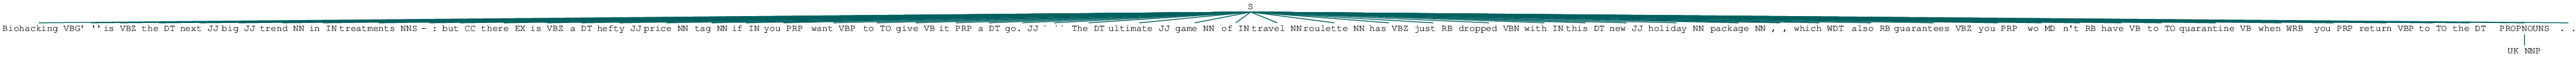

In [23]:
grammar1 = "NP: {<DT>?<JJ>*<NN>}"
grammar2 = r""" NP: {<DT|PP\$>?<JJ>*<NN>}
        {<NNP>+}
"""
grammar3 = 'VP: {<V.*> <TO> <V.*>}'

grammar4 = 'NOUNS: {<NN><NN>}'

grammar5 = 'PROPNOUNS: {<NNP>+}'

ch_tree = find_chunks(prep, grammar5)
ch_tree

In [24]:
ch_tree.draw()

In [25]:
  

grammar1 = "NP: {<DT>?<JJ>*<NN>}"
grammar2 = r""" NP: {<DT|PP\$>?<JJ>*<NN>}
        {<NNP>+}
"""
grammar3 = 'CHUNK: {<V.*> <TO> <V.*>}'

v_tree=find_chunks(prep, grammar3)


In [26]:
v_tree.draw()

## Named Entity Recognition

In [27]:
def preprocess_short(phrase): #without sentence tokenization
    tok = word_tokenize(phrase)
    tagged = nltk.pos_tag(tok)
    return(tagged)

In [28]:
phrase = "Mr. Smith made a deal on a beach of Switzerland. However he spent his holidays in Miami Beach, and met with WHO CEO."

prep_sentence = preprocess_short(phrase)
# print(prep_sentence)


# Named Entity Recognition

NER = nltk.ne_chunk(prep_sentence, binary= False)
print(NER) # GPE: geo-political entities such as city, state/province, and country.

(S
  (PERSON Mr./NNP)
  (PERSON Smith/NNP)
  made/VBD
  a/DT
  deal/NN
  on/IN
  a/DT
  beach/NN
  of/IN
  (GPE Switzerland/NNP)
  ./.
  However/RB
  he/PRP
  spent/VBD
  his/PRP$
  holidays/NNS
  in/IN
  (GPE Miami/NNP Beach/NNP)
  ,/,
  and/CC
  met/VBD
  with/IN
  (ORGANIZATION WHO/NNP)
  CEO/NNP
  ./.)


In [29]:
NER = nltk.ne_chunk(prep_sentence, binary=False)
print(NER) 

(S
  (PERSON Mr./NNP)
  (PERSON Smith/NNP)
  made/VBD
  a/DT
  deal/NN
  on/IN
  a/DT
  beach/NN
  of/IN
  (GPE Switzerland/NNP)
  ./.
  However/RB
  he/PRP
  spent/VBD
  his/PRP$
  holidays/NNS
  in/IN
  (GPE Miami/NNP Beach/NNP)
  ,/,
  and/CC
  met/VBD
  with/IN
  (ORGANIZATION WHO/NNP)
  CEO/NNP
  ./.)


## Using the conll2000 corpus

In [30]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 


print(train_data[0]) 
print(data[0])

# print(len(train_data), len(test_data))


(S
  (NP Confidence/NN)
  (PP in/IN)
  (NP the/DT pound/NN)
  (VP is/VBZ widely/RB expected/VBN to/TO take/VB)
  (NP another/DT sharp/JJ dive/NN)
  if/IN
  (NP trade/NN figures/NNS)
  (PP for/IN)
  (NP September/NNP)
  ,/,
  due/JJ
  (PP for/IN)
  (NP release/NN)
  (NP tomorrow/NN)
  ,/,
  (VP fail/VB to/TO show/VB)
  (NP a/DT substantial/JJ improvement/NN)
  (PP from/IN)
  (NP July/NNP and/CC August/NNP)
  (NP 's/POS near-record/JJ deficits/NNS)
  ./.)
(S
  (NP Confidence/NN)
  (PP in/IN)
  (NP the/DT pound/NN)
  (VP is/VBZ widely/RB expected/VBN to/TO take/VB)
  (NP another/DT sharp/JJ dive/NN)
  if/IN
  (NP trade/NN figures/NNS)
  (PP for/IN)
  (NP September/NNP)
  ,/,
  due/JJ
  (PP for/IN)
  (NP release/NN)
  (NP tomorrow/NN)
  ,/,
  (VP fail/VB to/TO show/VB)
  (NP a/DT substantial/JJ improvement/NN)
  (PP from/IN)
  (NP July/NNP and/CC August/NNP)
  (NP 's/POS near-record/JJ deficits/NNS)
  ./.)


In [31]:
train_data[0].draw()

### Chunking Utility function
#### The B- prefix before a tag indicates it is the beginning of a chunk, and I- prefix indicates that 
#### it is inside a chunk. The O tag indicates that the token does not belong to any chunk. 
#### The B- tag is always used when there are subsequent tags of the same type following it without the 
#### presence of O tags between them.

In [32]:
from nltk.chunk.util import tree2conlltags  

wtc = tree2conlltags(train_data[0])
wtc

[('Confidence', 'NN', 'B-NP'),
 ('in', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('pound', 'NN', 'I-NP'),
 ('is', 'VBZ', 'B-VP'),
 ('widely', 'RB', 'I-VP'),
 ('expected', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('take', 'VB', 'I-VP'),
 ('another', 'DT', 'B-NP'),
 ('sharp', 'JJ', 'I-NP'),
 ('dive', 'NN', 'I-NP'),
 ('if', 'IN', 'O'),
 ('trade', 'NN', 'B-NP'),
 ('figures', 'NNS', 'I-NP'),
 ('for', 'IN', 'B-PP'),
 ('September', 'NNP', 'B-NP'),
 (',', ',', 'O'),
 ('due', 'JJ', 'O'),
 ('for', 'IN', 'B-PP'),
 ('release', 'NN', 'B-NP'),
 ('tomorrow', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('fail', 'VB', 'B-VP'),
 ('to', 'TO', 'I-VP'),
 ('show', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('substantial', 'JJ', 'I-NP'),
 ('improvement', 'NN', 'I-NP'),
 ('from', 'IN', 'B-PP'),
 ('July', 'NNP', 'B-NP'),
 ('and', 'CC', 'I-NP'),
 ('August', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('near-record', 'JJ', 'I-NP'),
 ('deficits', 'NNS', 'I-NP'),
 ('.', '.', 'O')]

In [33]:
# extract POS and chunk tags from sentences with chunked annotations 

def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

In [34]:
# to train multiple taggers with unigram and bigram taggers 
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff 

In [35]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:] 


# print(train_data[0]) 

conll_tag_chunks(test_data)

[[('NNP', 'B-NP'),
  ('VBD', 'B-VP'),
  ('TO', 'I-VP'),
  ('VB', 'I-VP'),
  ('NN', 'B-NP'),
  ('IN', 'B-PP'),
  ('NNP', 'B-NP'),
  ('NNP', 'I-NP'),
  ('IN', 'B-PP'),
  ('NNP', 'B-NP'),
  ('IN', 'B-PP'),
  ('$', 'B-NP'),
  ('CD', 'I-NP'),
  ('CD', 'I-NP'),
  ('.', 'O')],
 [('DT', 'B-NP'),
  ('NN', 'I-NP'),
  ('MD', 'B-VP'),
  ('VB', 'I-VP'),
  ('DT', 'B-NP'),
  ('JJ', 'I-NP'),
  ('NN', 'I-NP'),
  ('TO', 'B-PP'),
  ('NNP', 'B-NP'),
  ('NNP', 'I-NP'),
  ('POS', 'B-NP'),
  ('NNP', 'I-NP'),
  ('NNP', 'I-NP'),
  ('NNP', 'I-NP'),
  ('.', 'O')],
 [('DT', 'B-NP'),
  ('NNP', 'I-NP'),
  ('VBZ', 'B-VP'),
  ('TO', 'I-VP'),
  ('VB', 'I-VP'),
  ('JJ', 'B-NP'),
  ('NN', 'I-NP'),
  ('IN', 'B-PP'),
  ('NNS', 'B-NP'),
  ('NNS', 'I-NP'),
  (',', 'O'),
  ('IN', 'B-PP'),
  ('WDT', 'B-NP'),
  ('NNS', 'B-NP'),
  ('VBP', 'B-VP'),
  ('CC', 'I-VP'),
  ('VB', 'I-VP'),
  ('DT', 'O'),
  ('IN', 'B-PP'),
  ('PRP$', 'B-NP'),
  ('JJ', 'I-NP'),
  ('NN', 'I-NP'),
  ('CC', 'B-PP'),
  ('IN', 'B-PP'),
  ('NNS', 'B-NP'),
  (

In [36]:
train_data

[Tree('S', [Tree('NP', [('Confidence', 'NN')]), Tree('PP', [('in', 'IN')]), Tree('NP', [('the', 'DT'), ('pound', 'NN')]), Tree('VP', [('is', 'VBZ'), ('widely', 'RB'), ('expected', 'VBN'), ('to', 'TO'), ('take', 'VB')]), Tree('NP', [('another', 'DT'), ('sharp', 'JJ'), ('dive', 'NN')]), ('if', 'IN'), Tree('NP', [('trade', 'NN'), ('figures', 'NNS')]), Tree('PP', [('for', 'IN')]), Tree('NP', [('September', 'NNP')]), (',', ','), ('due', 'JJ'), Tree('PP', [('for', 'IN')]), Tree('NP', [('release', 'NN')]), Tree('NP', [('tomorrow', 'NN')]), (',', ','), Tree('VP', [('fail', 'VB'), ('to', 'TO'), ('show', 'VB')]), Tree('NP', [('a', 'DT'), ('substantial', 'JJ'), ('improvement', 'NN')]), Tree('PP', [('from', 'IN')]), Tree('NP', [('July', 'NNP'), ('and', 'CC'), ('August', 'NNP')]), Tree('NP', [("'s", 'POS'), ('near-record', 'JJ'), ('deficits', 'NNS')]), ('.', '.')]), Tree('S', [('Chancellor', 'NNP'), Tree('PP', [('of', 'IN')]), Tree('NP', [('the', 'DT'), ('Exchequer', 'NNP')]), Tree('NP', [('Nigel',

# Another way to retrieve multiple text data from the internet 

In [37]:
urls = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/entertainment']

def build_dataset(seed_urls):
    news_data = []
    for url in urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{'news_headline': headline.find('span', 
                                                         attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', 
                                                       attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', 
                                               class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', 
                                               class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles)
        
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

news_df = build_dataset(urls)

news_df.head(100)

news_headline  \
0   India's most affordable 5G smartphone moto g 5...   
1   Flipkart partially spins off PhonePe, PhonePe ...   
2   42 food delivery riders arrive with same order...   
3   India orders Wikipedia to delete map that show...   
4   15-yr-old Indian-American inventor Gitanjali T...   
..                                                ...   
68  2020 helped me value the small things in life:...   
69  'Zero' didn't show the trauma & tragedy of a d...   
70  Got audition call for Tenet, thought it was a ...   
71  Actor Shiv Kumar Verma on ventilator, CINTAA s...   
72  Actors can't be on set and be paranoid about C...   

                                         news_article  news_category  
0   Motorola launched their latest 5G phone, moto ...     technology  
1   Walmart-owned Flipkart on Thursday announced a...     technology  
2   As many as 42 food delivery riders arrived wit...     technology  
3   The government has ordered Wikipedia to take d...     technology  
4   Indian-American inventor Gitanjali Rao has bee...     technology  
..                                                ...            ...  
68  Sonu Sood said the year 2020 helped him value ...  entertainment  
69  Actor Lilliput, who was recently seen in 'Mirz...  entertainment  
70  Actress Dimple Kapadia has said she couldn't b...  entertainment  
71  Actor Shiv Kumar Verma, who starred in 'Halla ...  entertainment  
72  Actress Dia Mirza, who's shooting for a series...  entertainment  

[73 rows x 3 columns]

In [38]:
news_df.news_category.value_counts()

sports           25
technology       25
entertainment    23
Name: news_category, dtype: int64

### Accessing dataframe values

In [60]:
print(news_df.values)

print(news_df.values[0:4]) # first 4 rows of the dataframe

[["India's most affordable 5G smartphone moto g 5G launched: Motorola"
  'Motorola launched their latest 5G phone, moto g 5G that offers India\'s first ultra-fast Qualcomm®️ Snapdragon™ 750G 5G processor with 6GB RAM, the company mentioned, adding that at ₹20,999, it\'s India\'s most affordable 5G smartphone. It comes with 6.7" HDR10 display, 48MP Triple Camera System, 5000mAh Battery, Stock Android™ Experience & more. Sale starts on December 7, exclusively on Flipkart.'
  'technology']
 ['Flipkart partially spins off PhonePe, PhonePe raises $700 million'
  "Walmart-owned Flipkart on Thursday announced a partial spin-off of PhonePe so it can access dedicated long-term capital over the next three to four years. PhonePe is raising $700 million funding from existing Flipkart investors led by Walmart, valuing PhonePe at $5.5 billion. Flipkart, which acquired PhonePe in 2016, will remain PhonePe's majority shareholder."
  'technology']
 ['42 food delivery riders arrive with same order at sa